# Imports

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from scipy.optimize import minimize
from mlxtend.plotting import plot_decision_regions
from google.colab import drive

from typing import Tuple

# Load data

In [6]:
drive.mount('/content/drive')
auto_csv_file_path = '/content/drive/My Drive/ML_24-25/Data/auto.csv'
indian_liver_patient_file_path = "/content/drive/My Drive/ML_24-25/Data/indian_liver_patient_dataset.csv"
bike_file_path = "/content/drive/My Drive/ML_24-25/Data/bike_sharing.csv"

digits_data = load_digits()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()
auto_data = pd.read_csv(auto_csv_file_path)


# columns = [
#     "age", "gender", "tb", "db",
#     "tp", "alb", "a/g_ratio",
#     "sgpt", "sgot", "alkphos",
#     "has_liver_disease"
# ]

columns = [
    "age", "gender", "tb", "db", "alkphos", "sgpt", "sgot",
    "tp", "alb", "a/g_ratio", "has_liver_disease"
]

liver_data = pd.read_csv(indian_liver_patient_file_path, header=None, names=columns)
bike_data = pd.read_csv(bike_file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1

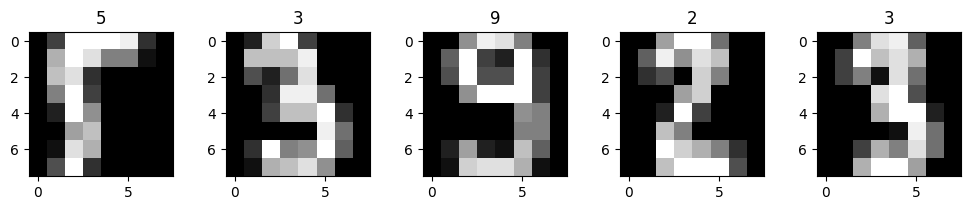

Dataset shape: (1797, 64)
Number of classes: 10

Training accuracy of logistic regression: 1.0
Validation accuracy of logistic regression: 0.9711111111111111

Training accuracy of non-linear support vector classifier: 0.994060876020787
Validation accuracy of non-linear support vector classifier: 0.9911111111111112


In [ ]:
X, y = digits_data.data, digits_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

random_indices = np.random.choice(len(X_train), 5, replace=False)
plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
  plt.subplot(1, 5, i + 1)
  plt.imshow(X_train[idx].reshape(8, 8), cmap='gray')
  plt.title(y_train[idx])
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")


log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
train_acc_log_reg = log_reg.score(X_train, y_train)
val_acc_log_reg = log_reg.score(X_test, y_test)
print(f"\nTraining accuracy of logistic regression: {train_acc_log_reg}")
print(f"Validation accuracy of logistic regression: {val_acc_log_reg}")


svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
train_acc_svc = svc.score(X_train, y_train)
val_acc_svc = svc.score(X_test, y_test)
print(f"\nTraining accuracy of non-linear support vector classifier: {train_acc_svc}")
print(f"Validation accuracy of non-linear support vector classifier: {val_acc_svc}")


#SVC is better than logic regression base on validation accuracy score
# Potential overfiting in log_reg?

# Task 2

In [ ]:
X = np.array([[11.45, 2.4 ], [13.62, 4.95], [13.88, 1.89], [12.42, 2.55], [12.81, 2.31], [12.58, 1.29], [13.83, 1.57], [13.07, 1.5 ], [12.7,  3.55], [13.77, 1.9 ], [12.84, 2.96], [12.37, 1.63], [13.51, 1.8 ], [13.87, 1.9 ], [12.08, 1.39], [13.58, 1.66], [13.08, 3.9 ], [11.79, 2.13], [12.45, 3.03], [13.68, 1.83], [13.52, 3.17], [13.5,  3.12], [12.87, 4.61], [14.02, 1.68], [12.29, 3.17], [12.08, 1.13], [12.7,  3.87], [11.03, 1.51], [13.32, 3.24], [14.13, 4.1 ], [13.49, 1.66], [11.84, 2.89], [13.05, 2.05], [12.72, 1.81], [12.82, 3.37], [13.4,  4.6 ], [14.22, 3.99], [13.72, 1.43], [12.93, 2.81], [11.64, 2.06], [12.29, 1.61], [11.65, 1.67], [13.28, 1.64], [12.93, 3.8 ], [13.86, 1.35], [11.82, 1.72], [12.37, 1.17], [12.42, 1.61], [13.9,  1.68], [14.16, 2.51]])
y = np.array([True, True, False, True, True, True, False, False, True, False, True, True, False, False, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, False, False, False, True, True, True, False, True])

In [ ]:
def make_meshgrid(x, y, h=.02, lims=None):
    """
    Create a mesh of points to plot in.

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, -1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,
                        extent=(np.min(xx), np.max(xx), np.min(yy),
                                np.max(yy)),
                        origin='lower',
                        vmin=0,
                        vmax=1,
                        **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X,
                    y,
                    clf,
                    ax=None,
                    ticks=False,
                    proba=False,
                    lims=None):  # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    cs = plot_contours(ax, clf, xx, yy, alpha=0.8, proba=proba)

    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y == labels[0]],
                   X1[y == labels[0]],
                   s=60,
                   c='b',
                   marker='o',
                   edgecolors='k')
        ax.scatter(X0[y == labels[1]],
                   X1[y == labels[1]],
                   s=60,
                   c='r',
                   marker='^',
                   edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())

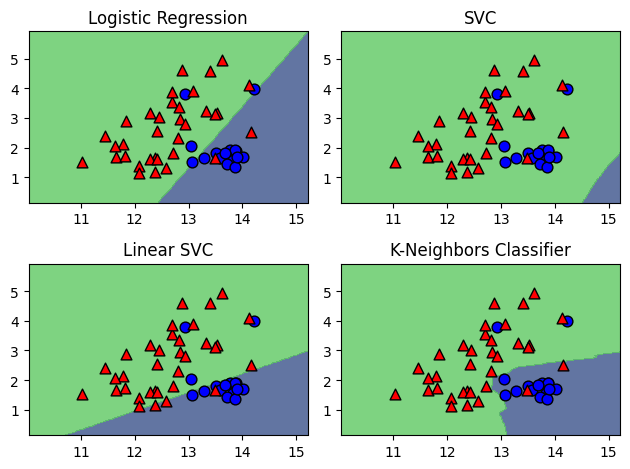

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
ax1 = plt.subplot(2, 2, 1)
plot_classifier(X, y, log_reg, ax=ax1)
ax1.set_title("Logistic Regression")


svc = SVC(kernel='rbf')
svc.fit(X, y)
ax2 = plt.subplot(2, 2, 2)
plot_classifier(X, y, svc, ax=ax2)
ax2.set_title("SVC")


linear_svc = LinearSVC()
linear_svc.fit(X, y)
ax3 = plt.subplot(2, 2, 3)
plot_classifier(X, y, linear_svc, ax=ax3)
ax3.set_title("Linear SVC")


knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)
ax4 = plt.subplot(2, 2, 4)
plot_classifier(X, y, knn_clf, ax=ax4)
ax4.set_title("K-Neighbors Classifier")



plt.tight_layout()
plt.show()


# Task 3

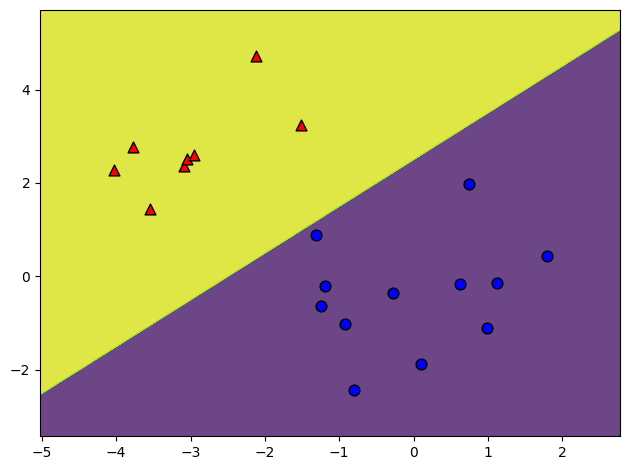

Number of errors: 0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


def make_meshgrid(x, y, h=.02, lims=None):
    """
    Create a mesh of points to plot in.

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, -1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,
                        extent=(np.min(xx), np.max(xx), np.min(yy),
                                np.max(yy)),
                        origin='lower',
                        vmin=0,
                        vmax=1,
                        **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X,
                    y,
                    clf,
                    ax=None,
                    ticks=False,
                    proba=False,
                    lims=None):  # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    cs = plot_contours(ax, clf, xx, yy, alpha=0.8, proba=proba)

    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y == labels[0]],
                   X1[y == labels[0]],
                   s=60,
                   c='b',
                   marker='o',
                   edgecolors='k')
        ax.scatter(X0[y == labels[1]],
                   X1[y == labels[1]],
                   s=60,
                   c='r',
                   marker='^',
                   edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())


def main():
    X = np.array([[1.7886284734303186, 0.43650985051198943],
                  [0.09649746807200862, -1.8634927033644908],
                  [-0.27738820251439905, -0.35475897926898675],
                  [-3.0827414814824596, 2.3729993231761526],
                  [-3.0438181689759283, 2.5227819696404974],
                  [-1.3138647533626822, 0.8846223804995846],
                  [-2.1186819577924703, 4.7095730636529485],
                  [-2.94996635782314, 2.595322585399109],
                  [-3.5453599476195303, 1.4535226844170317],
                  [0.9823674342581601, -1.1010676301114757],
                  [-1.1850465270201729, -0.20564989942254108],
                  [-1.5138516449254098, 3.2367162672269125],
                  [-4.023785139926468, 2.2870067998879504],
                  [0.6252449661628293, -0.1605133631869239],
                  [-3.76883635031923, 2.769969277722061],
                  [0.7450562664053708, 1.9761107831263025],
                  [-1.244123328955937, -0.6264169111883692],
                  [-0.8037660945765764, -2.4190831731786697],
                  [-0.9237920216957886, -1.0238757608428377],
                  [1.1239779589574683, -0.1319142328009009]])
    y = np.array([
        -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1
    ])

    model = linear_model.LogisticRegression()
    model.fit(X, y)

    model.coef_ = np.array([[-1, 1]])
    model.intercept_ = np.array([-2.5])

    plot_classifier(X, y, model)
    plt.tight_layout()
    plt.show()

    num_err = np.sum(y != model.predict(X))
    print("Number of errors:", num_err)


if __name__ == '__main__':
    main()

# Task 4

## Loads

In [ ]:
X = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98], [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.0, 15.2, 396.9, 13.27], [0.09378, 12.5, 7.87, 0.0, 0.524, 5.889, 39.0, 5.4509, 5.0, 311.0, 15.2, 390.5, 15.71], [0.62976, 0.0, 8.14, 0.0, 0.538, 5.949, 61.8, 4.7075, 4.0, 307.0, 21.0, 396.9, 8.26], [0.63796, 0.0, 8.14, 0.0, 0.538, 6.096, 84.5, 4.4619, 4.0, 307.0, 21.0, 380.02, 10.26], [0.62739, 0.0, 8.14, 0.0, 0.538, 5.834, 56.5, 4.4986, 4.0, 307.0, 21.0, 395.62, 8.47], [1.05393, 0.0, 8.14, 0.0, 0.538, 5.935, 29.3, 4.4986, 4.0, 307.0, 21.0, 386.85, 6.58], [0.7842, 0.0, 8.14, 0.0, 0.538, 5.99, 81.7, 4.2579, 4.0, 307.0, 21.0, 386.75, 14.67], [0.80271, 0.0, 8.14, 0.0, 0.538, 5.456, 36.6, 3.7965, 4.0, 307.0, 21.0, 288.99, 11.69], [0.7258, 0.0, 8.14, 0.0, 0.538, 5.727, 69.5, 3.7965, 4.0, 307.0, 21.0, 390.95, 11.28], [1.25179, 0.0, 8.14, 0.0, 0.538, 5.57, 98.1, 3.7979, 4.0, 307.0, 21.0, 376.57, 21.02], [0.85204, 0.0, 8.14, 0.0, 0.538, 5.965, 89.2, 4.0123, 4.0, 307.0, 21.0, 392.53, 13.83], [1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7, 3.9769, 4.0, 307.0, 21.0, 396.9, 18.72], [0.98843, 0.0, 8.14, 0.0, 0.538, 5.813, 100.0, 4.0952, 4.0, 307.0, 21.0, 394.54, 19.88], [0.75026, 0.0, 8.14, 0.0, 0.538, 5.924, 94.1, 4.3996, 4.0, 307.0, 21.0, 394.33, 16.3], [0.84054, 0.0, 8.14, 0.0, 0.538, 5.599, 85.7, 4.4546, 4.0, 307.0, 21.0, 303.42, 16.51], [0.67191, 0.0, 8.14, 0.0, 0.538, 5.813, 90.3, 4.682, 4.0, 307.0, 21.0, 376.88, 14.81], [0.95577, 0.0, 8.14, 0.0, 0.538, 6.047, 88.8, 4.4534, 4.0, 307.0, 21.0, 306.38, 17.28], [0.77299, 0.0, 8.14, 0.0, 0.538, 6.495, 94.4, 4.4547, 4.0, 307.0, 21.0, 387.94, 12.8], [1.00245, 0.0, 8.14, 0.0, 0.538, 6.674, 87.3, 4.239, 4.0, 307.0, 21.0, 380.23, 11.98], [1.13081, 0.0, 8.14, 0.0, 0.538, 5.713, 94.1, 4.233, 4.0, 307.0, 21.0, 360.17, 22.6], [1.35472, 0.0, 8.14, 0.0, 0.538, 6.072, 100.0, 4.175, 4.0, 307.0, 21.0, 376.73, 13.04], [1.38799, 0.0, 8.14, 0.0, 0.538, 5.95, 82.0, 3.99, 4.0, 307.0, 21.0, 232.6, 27.71], [1.15172, 0.0, 8.14, 0.0, 0.538, 5.701, 95.0, 3.7872, 4.0, 307.0, 21.0, 358.77, 18.35], [1.61282, 0.0, 8.14, 0.0, 0.538, 6.096, 96.9, 3.7598, 4.0, 307.0, 21.0, 248.31, 20.34], [0.06417, 0.0, 5.96, 0.0, 0.499, 5.933, 68.2, 3.3603, 5.0, 279.0, 19.2, 396.9, 9.68], [0.09744, 0.0, 5.96, 0.0, 0.499, 5.841, 61.4, 3.3779, 5.0, 279.0, 19.2, 377.56, 11.41], [0.08014, 0.0, 5.96, 0.0, 0.499, 5.85, 41.5, 3.9342, 5.0, 279.0, 19.2, 396.9, 8.77], [0.17505, 0.0, 5.96, 0.0, 0.499, 5.966, 30.2, 3.8473, 5.0, 279.0, 19.2, 393.43, 10.13], [0.02763, 75.0, 2.95, 0.0, 0.428, 6.595, 21.8, 5.4011, 3.0, 252.0, 18.3, 395.63, 4.32], [0.03359, 75.0, 2.95, 0.0, 0.428, 7.024, 15.8, 5.4011, 3.0, 252.0, 18.3, 395.62, 1.98], [0.12744, 0.0, 6.91, 0.0, 0.448, 6.77, 2.9, 5.7209, 3.0, 233.0, 17.9, 385.41, 4.84], [0.1415, 0.0, 6.91, 0.0, 0.448, 6.169, 6.6, 5.7209, 3.0, 233.0, 17.9, 383.37, 5.81], [0.15936, 0.0, 6.91, 0.0, 0.448, 6.211, 6.5, 5.7209, 3.0, 233.0, 17.9, 394.46, 7.44], [0.12269, 0.0, 6.91, 0.0, 0.448, 6.069, 40.0, 5.7209, 3.0, 233.0, 17.9, 389.39, 9.55], [0.17142, 0.0, 6.91, 0.0, 0.448, 5.682, 33.8, 5.1004, 3.0, 233.0, 17.9, 396.9, 10.21], [0.18836, 0.0, 6.91, 0.0, 0.448, 5.786, 33.3, 5.1004, 3.0, 233.0, 17.9, 396.9, 14.15], [0.22927, 0.0, 6.91, 0.0, 0.448, 6.03, 85.5, 5.6894, 3.0, 233.0, 17.9, 392.74, 18.8], [0.25387, 0.0, 6.91, 0.0, 0.448, 5.399, 95.3, 5.87, 3.0, 233.0, 17.9, 396.9, 30.81], [0.21977, 0.0, 6.91, 0.0, 0.448, 5.602, 62.0, 6.0877, 3.0, 233.0, 17.9, 396.9, 16.2], [0.08873, 21.0, 5.64, 0.0, 0.439, 5.963, 45.7, 6.8147, 4.0, 243.0, 16.8, 395.56, 13.45], [0.04337, 21.0, 5.64, 0.0, 0.439, 6.115, 63.0, 6.8147, 4.0, 243.0, 16.8, 393.97, 9.43], [0.0536, 21.0, 5.64, 0.0, 0.439, 6.511, 21.1, 6.8147, 4.0, 243.0, 16.8, 396.9, 5.28], [0.04981, 21.0, 5.64, 0.0, 0.439, 5.998, 21.4, 6.8147, 4.0, 243.0, 16.8, 396.9, 8.43], [0.0136, 75.0, 4.0, 0.0, 0.41, 5.888, 47.6, 7.3197, 3.0, 469.0, 21.1, 396.9, 14.8], [0.01311, 90.0, 1.22, 0.0, 0.403, 7.249, 21.9, 8.6966, 5.0, 226.0, 17.9, 395.93, 4.81], [0.02055, 85.0, 0.74, 0.0, 0.41, 6.383, 35.7, 9.1876, 2.0, 313.0, 17.3, 396.9, 5.77], [0.01432, 100.0, 1.32, 0.0, 0.411, 6.816, 40.5, 8.3248, 5.0, 256.0, 15.1, 392.9, 3.95], [0.15445, 25.0, 5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284.0, 19.7, 390.68, 6.86], [0.10328, 25.0, 5.13, 0.0, 0.453, 5.927, 47.2, 6.932, 8.0, 284.0, 19.7, 396.9, 9.22], [0.14932, 25.0, 5.13, 0.0, 0.453, 5.741, 66.2, 7.2254, 8.0, 284.0, 19.7, 395.11, 13.15], [0.17171, 25.0, 5.13, 0.0, 0.453, 5.966, 93.4, 6.8185, 8.0, 284.0, 19.7, 378.08, 14.44], [0.11027, 25.0, 5.13, 0.0, 0.453, 6.456, 67.8, 7.2255, 8.0, 284.0, 19.7, 396.9, 6.73], [0.1265, 25.0, 5.13, 0.0, 0.453, 6.762, 43.4, 7.9809, 8.0, 284.0, 19.7, 395.58, 9.5], [0.01951, 17.5, 1.38, 0.0, 0.4161, 7.104, 59.5, 9.2229, 3.0, 216.0, 18.6, 393.24, 8.05], [0.03584, 80.0, 3.37, 0.0, 0.398, 6.29, 17.8, 6.6115, 4.0, 337.0, 16.1, 396.9, 4.67], [0.04379, 80.0, 3.37, 0.0, 0.398, 5.787, 31.1, 6.6115, 4.0, 337.0, 16.1, 396.9, 10.24], [0.05789, 12.5, 6.07, 0.0, 0.409, 5.878, 21.4, 6.498, 4.0, 345.0, 18.9, 396.21, 8.1], [0.13554, 12.5, 6.07, 0.0, 0.409, 5.594, 36.8, 6.498, 4.0, 345.0, 18.9, 396.9, 13.09], [0.12816, 12.5, 6.07, 0.0, 0.409, 5.885, 33.0, 6.498, 4.0, 345.0, 18.9, 396.9, 8.79], [0.08826, 0.0, 10.81, 0.0, 0.413, 6.417, 6.6, 5.2873, 4.0, 305.0, 19.2, 383.73, 6.72], [0.15876, 0.0, 10.81, 0.0, 0.413, 5.961, 17.5, 5.2873, 4.0, 305.0, 19.2, 376.94, 9.88], [0.09164, 0.0, 10.81, 0.0, 0.413, 6.065, 7.8, 5.2873, 4.0, 305.0, 19.2, 390.91, 5.52], [0.19539, 0.0, 10.81, 0.0, 0.413, 6.245, 6.2, 5.2873, 4.0, 305.0, 19.2, 377.17, 7.54], [0.07896, 0.0, 12.83, 0.0, 0.437, 6.273, 6.0, 4.2515, 5.0, 398.0, 18.7, 394.92, 6.78], [0.09512, 0.0, 12.83, 0.0, 0.437, 6.286, 45.0, 4.5026, 5.0, 398.0, 18.7, 383.23, 8.94], [0.10153, 0.0, 12.83, 0.0, 0.437, 6.279, 74.5, 4.0522, 5.0, 398.0, 18.7, 373.66, 11.97], [0.08707, 0.0, 12.83, 0.0, 0.437, 6.14, 45.8, 4.0905, 5.0, 398.0, 18.7, 386.96, 10.27], [0.05646, 0.0, 12.83, 0.0, 0.437, 6.232, 53.7, 5.0141, 5.0, 398.0, 18.7, 386.4, 12.34], [0.08387, 0.0, 12.83, 0.0, 0.437, 5.874, 36.6, 4.5026, 5.0, 398.0, 18.7, 396.06, 9.1], [0.04113, 25.0, 4.86, 0.0, 0.426, 6.727, 33.5, 5.4007, 4.0, 281.0, 19.0, 396.9, 5.29], [0.04462, 25.0, 4.86, 0.0, 0.426, 6.619, 70.4, 5.4007, 4.0, 281.0, 19.0, 395.63, 7.22], [0.03659, 25.0, 4.86, 0.0, 0.426, 6.302, 32.2, 5.4007, 4.0, 281.0, 19.0, 396.9, 6.72], [0.03551, 25.0, 4.86, 0.0, 0.426, 6.167, 46.7, 5.4007, 4.0, 281.0, 19.0, 390.64, 7.51], [0.05059, 0.0, 4.49, 0.0, 0.449, 6.389, 48.0, 4.7794, 3.0, 247.0, 18.5, 396.9, 9.62], [0.05735, 0.0, 4.49, 0.0, 0.449, 6.63, 56.1, 4.4377, 3.0, 247.0, 18.5, 392.3, 6.53], [0.05188, 0.0, 4.49, 0.0, 0.449, 6.015, 45.1, 4.4272, 3.0, 247.0, 18.5, 395.99, 12.86], [0.07151, 0.0, 4.49, 0.0, 0.449, 6.121, 56.8, 3.7476, 3.0, 247.0, 18.5, 395.15, 8.44], [0.0566, 0.0, 3.41, 0.0, 0.489, 7.007, 86.3, 3.4217, 2.0, 270.0, 17.8, 396.9, 5.5], [0.05302, 0.0, 3.41, 0.0, 0.489, 7.079, 63.1, 3.4145, 2.0, 270.0, 17.8, 396.06, 5.7], [0.04684, 0.0, 3.41, 0.0, 0.489, 6.417, 66.1, 3.0923, 2.0, 270.0, 17.8, 392.18, 8.81], [0.03932, 0.0, 3.41, 0.0, 0.489, 6.405, 73.9, 3.0921, 2.0, 270.0, 17.8, 393.55, 8.2], [0.04203, 28.0, 15.04, 0.0, 0.464, 6.442, 53.6, 3.6659, 4.0, 270.0, 18.2, 395.01, 8.16], [0.02875, 28.0, 15.04, 0.0, 0.464, 6.211, 28.9, 3.6659, 4.0, 270.0, 18.2, 396.33, 6.21], [0.04294, 28.0, 15.04, 0.0, 0.464, 6.249, 77.3, 3.615, 4.0, 270.0, 18.2, 396.9, 10.59], [0.12204, 0.0, 2.89, 0.0, 0.445, 6.625, 57.8, 3.4952, 2.0, 276.0, 18.0, 357.98, 6.65], [0.11504, 0.0, 2.89, 0.0, 0.445, 6.163, 69.6, 3.4952, 2.0, 276.0, 18.0, 391.83, 11.34], [0.12083, 0.0, 2.89, 0.0, 0.445, 8.069, 76.0, 3.4952, 2.0, 276.0, 18.0, 396.9, 4.21], [0.08187, 0.0, 2.89, 0.0, 0.445, 7.82, 36.9, 3.4952, 2.0, 276.0, 18.0, 393.53, 3.57], [0.0686, 0.0, 2.89, 0.0, 0.445, 7.416, 62.5, 3.4952, 2.0, 276.0, 18.0, 396.9, 6.19], [0.14866, 0.0, 8.56, 0.0, 0.52, 6.727, 79.9, 2.7778, 5.0, 384.0, 20.9, 394.76, 9.42], [0.11432, 0.0, 8.56, 0.0, 0.52, 6.781, 71.3, 2.8561, 5.0, 384.0, 20.9, 395.58, 7.67], [0.22876, 0.0, 8.56, 0.0, 0.52, 6.405, 85.4, 2.7147, 5.0, 384.0, 20.9, 70.8, 10.63], [0.21161, 0.0, 8.56, 0.0, 0.52, 6.137, 87.4, 2.7147, 5.0, 384.0, 20.9, 394.47, 13.44], [0.1396, 0.0, 8.56, 0.0, 0.52, 6.167, 90.0, 2.421, 5.0, 384.0, 20.9, 392.69, 12.33], [0.13262, 0.0, 8.56, 0.0, 0.52, 5.851, 96.7, 2.1069, 5.0, 384.0, 20.9, 394.05, 16.47], [0.1712, 0.0, 8.56, 0.0, 0.52, 5.836, 91.9, 2.211, 5.0, 384.0, 20.9, 395.67, 18.66], [0.13117, 0.0, 8.56, 0.0, 0.52, 6.127, 85.2, 2.1224, 5.0, 384.0, 20.9, 387.69, 14.09], [0.12802, 0.0, 8.56, 0.0, 0.52, 6.474, 97.1, 2.4329, 5.0, 384.0, 20.9, 395.24, 12.27], [0.26363, 0.0, 8.56, 0.0, 0.52, 6.229, 91.2, 2.5451, 5.0, 384.0, 20.9, 391.23, 15.55], [0.10793, 0.0, 8.56, 0.0, 0.52, 6.195, 54.4, 2.7778, 5.0, 384.0, 20.9, 393.49, 13.0], [0.10084, 0.0, 10.01, 0.0, 0.547, 6.715, 81.6, 2.6775, 6.0, 432.0, 17.8, 395.59, 10.16], [0.12329, 0.0, 10.01, 0.0, 0.547, 5.913, 92.9, 2.3534, 6.0, 432.0, 17.8, 394.95, 16.21], [0.22212, 0.0, 10.01, 0.0, 0.547, 6.092, 95.4, 2.548, 6.0, 432.0, 17.8, 396.9, 17.09], [0.14231, 0.0, 10.01, 0.0, 0.547, 6.254, 84.2, 2.2565, 6.0, 432.0, 17.8, 388.74, 10.45], [0.17134, 0.0, 10.01, 0.0, 0.547, 5.928, 88.2, 2.4631, 6.0, 432.0, 17.8, 344.91, 15.76], [0.13158, 0.0, 10.01, 0.0, 0.547, 6.176, 72.5, 2.7301, 6.0, 432.0, 17.8, 393.3, 12.04], [0.15098, 0.0, 10.01, 0.0, 0.547, 6.021, 82.6, 2.7474, 6.0, 432.0, 17.8, 394.51, 10.3], [0.13058, 0.0, 10.01, 0.0, 0.547, 5.872, 73.1, 2.4775, 6.0, 432.0, 17.8, 338.63, 15.37], [0.14476, 0.0, 10.01, 0.0, 0.547, 5.731, 65.2, 2.7592, 6.0, 432.0, 17.8, 391.5, 13.61], [0.06899, 0.0, 25.65, 0.0, 0.581, 5.87, 69.7, 2.2577, 2.0, 188.0, 19.1, 389.15, 14.37], [0.07165, 0.0, 25.65, 0.0, 0.581, 6.004, 84.1, 2.1974, 2.0, 188.0, 19.1, 377.67, 14.27], [0.09299, 0.0, 25.65, 0.0, 0.581, 5.961, 92.9, 2.0869, 2.0, 188.0, 19.1, 378.09, 17.93], [0.15038, 0.0, 25.65, 0.0, 0.581, 5.856, 97.0, 1.9444, 2.0, 188.0, 19.1, 370.31, 25.41], [0.09849, 0.0, 25.65, 0.0, 0.581, 5.879, 95.8, 2.0063, 2.0, 188.0, 19.1, 379.38, 17.58], [0.16902, 0.0, 25.65, 0.0, 0.581, 5.986, 88.4, 1.9929, 2.0, 188.0, 19.1, 385.02, 14.81], [0.38735, 0.0, 25.65, 0.0, 0.581, 5.613, 95.6, 1.7572, 2.0, 188.0, 19.1, 359.29, 27.26], [0.25915, 0.0, 21.89, 0.0, 0.624, 5.693, 96.0, 1.7883, 4.0, 437.0, 21.2, 392.11, 17.19], [0.32543, 0.0, 21.89, 0.0, 0.624, 6.431, 98.8, 1.8125, 4.0, 437.0, 21.2, 396.9, 15.39], [0.88125, 0.0, 21.89, 0.0, 0.624, 5.637, 94.7, 1.9799, 4.0, 437.0, 21.2, 396.9, 18.34], [0.34006, 0.0, 21.89, 0.0, 0.624, 6.458, 98.9, 2.1185, 4.0, 437.0, 21.2, 395.04, 12.6], [1.19294, 0.0, 21.89, 0.0, 0.624, 6.326, 97.7, 2.271, 4.0, 437.0, 21.2, 396.9, 12.26], [0.59005, 0.0, 21.89, 0.0, 0.624, 6.372, 97.9, 2.3274, 4.0, 437.0, 21.2, 385.76, 11.12], [0.32982, 0.0, 21.89, 0.0, 0.624, 5.822, 95.4, 2.4699, 4.0, 437.0, 21.2, 388.69, 15.03], [0.97617, 0.0, 21.89, 0.0, 0.624, 5.757, 98.4, 2.346, 4.0, 437.0, 21.2, 262.76, 17.31], [0.55778, 0.0, 21.89, 0.0, 0.624, 6.335, 98.2, 2.1107, 4.0, 437.0, 21.2, 394.67, 16.96], [0.32264, 0.0, 21.89, 0.0, 0.624, 5.942, 93.5, 1.9669, 4.0, 437.0, 21.2, 378.25, 16.9], [0.35233, 0.0, 21.89, 0.0, 0.624, 6.454, 98.4, 1.8498, 4.0, 437.0, 21.2, 394.08, 14.59], [0.2498, 0.0, 21.89, 0.0, 0.624, 5.857, 98.2, 1.6686, 4.0, 437.0, 21.2, 392.04, 21.32], [0.54452, 0.0, 21.89, 0.0, 0.624, 6.151, 97.9, 1.6687, 4.0, 437.0, 21.2, 396.9, 18.46], [0.2909, 0.0, 21.89, 0.0, 0.624, 6.174, 93.6, 1.6119, 4.0, 437.0, 21.2, 388.08, 24.16], [1.62864, 0.0, 21.89, 0.0, 0.624, 5.019, 100.0, 1.4394, 4.0, 437.0, 21.2, 396.9, 34.41], [3.32105, 0.0, 19.58, 1.0, 0.871, 5.403, 100.0, 1.3216, 5.0, 403.0, 14.7, 396.9, 26.82], [4.0974, 0.0, 19.58, 0.0, 0.871, 5.468, 100.0, 1.4118, 5.0, 403.0, 14.7, 396.9, 26.42], [2.77974, 0.0, 19.58, 0.0, 0.871, 4.903, 97.8, 1.3459, 5.0, 403.0, 14.7, 396.9, 29.29], [2.37934, 0.0, 19.58, 0.0, 0.871, 6.13, 100.0, 1.4191, 5.0, 403.0, 14.7, 172.91, 27.8], [2.15505, 0.0, 19.58, 0.0, 0.871, 5.628, 100.0, 1.5166, 5.0, 403.0, 14.7, 169.27, 16.65], [2.36862, 0.0, 19.58, 0.0, 0.871, 4.926, 95.7, 1.4608, 5.0, 403.0, 14.7, 391.71, 29.53], [2.33099, 0.0, 19.58, 0.0, 0.871, 5.186, 93.8, 1.5296, 5.0, 403.0, 14.7, 356.99, 28.32], [2.73397, 0.0, 19.58, 0.0, 0.871, 5.597, 94.9, 1.5257, 5.0, 403.0, 14.7, 351.85, 21.45], [1.6566, 0.0, 19.58, 0.0, 0.871, 6.122, 97.3, 1.618, 5.0, 403.0, 14.7, 372.8, 14.1], [1.49632, 0.0, 19.58, 0.0, 0.871, 5.404, 100.0, 1.5916, 5.0, 403.0, 14.7, 341.6, 13.28], [1.12658, 0.0, 19.58, 1.0, 0.871, 5.012, 88.0, 1.6102, 5.0, 403.0, 14.7, 343.28, 12.12], [2.14918, 0.0, 19.58, 0.0, 0.871, 5.709, 98.5, 1.6232, 5.0, 403.0, 14.7, 261.95, 15.79], [1.41385, 0.0, 19.58, 1.0, 0.871, 6.129, 96.0, 1.7494, 5.0, 403.0, 14.7, 321.02, 15.12], [3.53501, 0.0, 19.58, 1.0, 0.871, 6.152, 82.6, 1.7455, 5.0, 403.0, 14.7, 88.01, 15.02], [2.44668, 0.0, 19.58, 0.0, 0.871, 5.272, 94.0, 1.7364, 5.0, 403.0, 14.7, 88.63, 16.14], [1.22358, 0.0, 19.58, 0.0, 0.605, 6.943, 97.4, 1.8773, 5.0, 403.0, 14.7, 363.43, 4.59], [1.34284, 0.0, 19.58, 0.0, 0.605, 6.066, 100.0, 1.7573, 5.0, 403.0, 14.7, 353.89, 6.43], [1.42502, 0.0, 19.58, 0.0, 0.871, 6.51, 100.0, 1.7659, 5.0, 403.0, 14.7, 364.31, 7.39], [1.27346, 0.0, 19.58, 1.0, 0.605, 6.25, 92.6, 1.7984, 5.0, 403.0, 14.7, 338.92, 5.5], [1.46336, 0.0, 19.58, 0.0, 0.605, 7.489, 90.8, 1.9709, 5.0, 403.0, 14.7, 374.43, 1.73], [1.83377, 0.0, 19.58, 1.0, 0.605, 7.802, 98.2, 2.0407, 5.0, 403.0, 14.7, 389.61, 1.92], [1.51902, 0.0, 19.58, 1.0, 0.605, 8.375, 93.9, 2.162, 5.0, 403.0, 14.7, 388.45, 3.32], [2.24236, 0.0, 19.58, 0.0, 0.605, 5.854, 91.8, 2.422, 5.0, 403.0, 14.7, 395.11, 11.64], [2.924, 0.0, 19.58, 0.0, 0.605, 6.101, 93.0, 2.2834, 5.0, 403.0, 14.7, 240.16, 9.81], [2.01019, 0.0, 19.58, 0.0, 0.605, 7.929, 96.2, 2.0459, 5.0, 403.0, 14.7, 369.3, 3.7], [1.80028, 0.0, 19.58, 0.0, 0.605, 5.877, 79.2, 2.4259, 5.0, 403.0, 14.7, 227.61, 12.14], [2.3004, 0.0, 19.58, 0.0, 0.605, 6.319, 96.1, 2.1, 5.0, 403.0, 14.7, 297.09, 11.1], [2.44953, 0.0, 19.58, 0.0, 0.605, 6.402, 95.2, 2.2625, 5.0, 403.0, 14.7, 330.04, 11.32], [1.20742, 0.0, 19.58, 0.0, 0.605, 5.875, 94.6, 2.4259, 5.0, 403.0, 14.7, 292.29, 14.43], [2.3139, 0.0, 19.58, 0.0, 0.605, 5.88, 97.3, 2.3887, 5.0, 403.0, 14.7, 348.13, 12.03], [0.13914, 0.0, 4.05, 0.0, 0.51, 5.572, 88.5, 2.5961, 5.0, 296.0, 16.6, 396.9, 14.69], [0.09178, 0.0, 4.05, 0.0, 0.51, 6.416, 84.1, 2.6463, 5.0, 296.0, 16.6, 395.5, 9.04], [0.08447, 0.0, 4.05, 0.0, 0.51, 5.859, 68.7, 2.7019, 5.0, 296.0, 16.6, 393.23, 9.64], [0.06664, 0.0, 4.05, 0.0, 0.51, 6.546, 33.1, 3.1323, 5.0, 296.0, 16.6, 390.96, 5.33], [0.07022, 0.0, 4.05, 0.0, 0.51, 6.02, 47.2, 3.5549, 5.0, 296.0, 16.6, 393.23, 10.11], [0.05425, 0.0, 4.05, 0.0, 0.51, 6.315, 73.4, 3.3175, 5.0, 296.0, 16.6, 395.6, 6.29], [0.06642, 0.0, 4.05, 0.0, 0.51, 6.86, 74.4, 2.9153, 5.0, 296.0, 16.6, 391.27, 6.92], [0.0578, 0.0, 2.46, 0.0, 0.488, 6.98, 58.4, 2.829, 3.0, 193.0, 17.8, 396.9, 5.04], [0.06588, 0.0, 2.46, 0.0, 0.488, 7.765, 83.3, 2.741, 3.0, 193.0, 17.8, 395.56, 7.56], [0.06888, 0.0, 2.46, 0.0, 0.488, 6.144, 62.2, 2.5979, 3.0, 193.0, 17.8, 396.9, 9.45], [0.09103, 0.0, 2.46, 0.0, 0.488, 7.155, 92.2, 2.7006, 3.0, 193.0, 17.8, 394.12, 4.82], [0.10008, 0.0, 2.46, 0.0, 0.488, 6.563, 95.6, 2.847, 3.0, 193.0, 17.8, 396.9, 5.68], [0.08308, 0.0, 2.46, 0.0, 0.488, 5.604, 89.8, 2.9879, 3.0, 193.0, 17.8, 391.0, 13.98], [0.06047, 0.0, 2.46, 0.0, 0.488, 6.153, 68.8, 3.2797, 3.0, 193.0, 17.8, 387.11, 13.15], [0.05602, 0.0, 2.46, 0.0, 0.488, 7.831, 53.6, 3.1992, 3.0, 193.0, 17.8, 392.63, 4.45], [0.07875, 45.0, 3.44, 0.0, 0.437, 6.782, 41.1, 3.7886, 5.0, 398.0, 15.2, 393.87, 6.68], [0.12579, 45.0, 3.44, 0.0, 0.437, 6.556, 29.1, 4.5667, 5.0, 398.0, 15.2, 382.84, 4.56], [0.0837, 45.0, 3.44, 0.0, 0.437, 7.185, 38.9, 4.5667, 5.0, 398.0, 15.2, 396.9, 5.39], [0.09068, 45.0, 3.44, 0.0, 0.437, 6.951, 21.5, 6.4798, 5.0, 398.0, 15.2, 377.68, 5.1], [0.06911, 45.0, 3.44, 0.0, 0.437, 6.739, 30.8, 6.4798, 5.0, 398.0, 15.2, 389.71, 4.69], [0.08664, 45.0, 3.44, 0.0, 0.437, 7.178, 26.3, 6.4798, 5.0, 398.0, 15.2, 390.49, 2.87], [0.02187, 60.0, 2.93, 0.0, 0.401, 6.8, 9.9, 6.2196, 1.0, 265.0, 15.6, 393.37, 5.03], [0.01439, 60.0, 2.93, 0.0, 0.401, 6.604, 18.8, 6.2196, 1.0, 265.0, 15.6, 376.7, 4.38], [0.01381, 80.0, 0.46, 0.0, 0.422, 7.875, 32.0, 5.6484, 4.0, 255.0, 14.4, 394.23, 2.97], [0.04011, 80.0, 1.52, 0.0, 0.404, 7.287, 34.1, 7.309, 2.0, 329.0, 12.6, 396.9, 4.08], [0.04666, 80.0, 1.52, 0.0, 0.404, 7.107, 36.6, 7.309, 2.0, 329.0, 12.6, 354.31, 8.61], [0.03768, 80.0, 1.52, 0.0, 0.404, 7.274, 38.3, 7.309, 2.0, 329.0, 12.6, 392.2, 6.62], [0.0315, 95.0, 1.47, 0.0, 0.403, 6.975, 15.3, 7.6534, 3.0, 402.0, 17.0, 396.9, 4.56], [0.01778, 95.0, 1.47, 0.0, 0.403, 7.135, 13.9, 7.6534, 3.0, 402.0, 17.0, 384.3, 4.45], [0.03445, 82.5, 2.03, 0.0, 0.415, 6.162, 38.4, 6.27, 2.0, 348.0, 14.7, 393.77, 7.43], [0.02177, 82.5, 2.03, 0.0, 0.415, 7.61, 15.7, 6.27, 2.0, 348.0, 14.7, 395.38, 3.11], [0.0351, 95.0, 2.68, 0.0, 0.4161, 7.853, 33.2, 5.118, 4.0, 224.0, 14.7, 392.78, 3.81], [0.02009, 95.0, 2.68, 0.0, 0.4161, 8.034, 31.9, 5.118, 4.0, 224.0, 14.7, 390.55, 2.88], [0.13642, 0.0, 10.59, 0.0, 0.489, 5.891, 22.3, 3.9454, 4.0, 277.0, 18.6, 396.9, 10.87], [0.22969, 0.0, 10.59, 0.0, 0.489, 6.326, 52.5, 4.3549, 4.0, 277.0, 18.6, 394.87, 10.97], [0.25199, 0.0, 10.59, 0.0, 0.489, 5.783, 72.7, 4.3549, 4.0, 277.0, 18.6, 389.43, 18.06], [0.13587, 0.0, 10.59, 1.0, 0.489, 6.064, 59.1, 4.2392, 4.0, 277.0, 18.6, 381.32, 14.66], [0.43571, 0.0, 10.59, 1.0, 0.489, 5.344, 100.0, 3.875, 4.0, 277.0, 18.6, 396.9, 23.09], [0.17446, 0.0, 10.59, 1.0, 0.489, 5.96, 92.1, 3.8771, 4.0, 277.0, 18.6, 393.25, 17.27], [0.37578, 0.0, 10.59, 1.0, 0.489, 5.404, 88.6, 3.665, 4.0, 277.0, 18.6, 395.24, 23.98], [0.21719, 0.0, 10.59, 1.0, 0.489, 5.807, 53.8, 3.6526, 4.0, 277.0, 18.6, 390.94, 16.03], [0.14052, 0.0, 10.59, 0.0, 0.489, 6.375, 32.3, 3.9454, 4.0, 277.0, 18.6, 385.81, 9.38], [0.28955, 0.0, 10.59, 0.0, 0.489, 5.412, 9.8, 3.5875, 4.0, 277.0, 18.6, 348.93, 29.55], [0.19802, 0.0, 10.59, 0.0, 0.489, 6.182, 42.4, 3.9454, 4.0, 277.0, 18.6, 393.63, 9.47], [0.0456, 0.0, 13.89, 1.0, 0.55, 5.888, 56.0, 3.1121, 5.0, 276.0, 16.4, 392.8, 13.51], [0.07013, 0.0, 13.89, 0.0, 0.55, 6.642, 85.1, 3.4211, 5.0, 276.0, 16.4, 392.78, 9.69], [0.11069, 0.0, 13.89, 1.0, 0.55, 5.951, 93.8, 2.8893, 5.0, 276.0, 16.4, 396.9, 17.92], [0.11425, 0.0, 13.89, 1.0, 0.55, 6.373, 92.4, 3.3633, 5.0, 276.0, 16.4, 393.74, 10.5], [0.35809, 0.0, 6.2, 1.0, 0.507, 6.951, 88.5, 2.8617, 8.0, 307.0, 17.4, 391.7, 9.71], [0.40771, 0.0, 6.2, 1.0, 0.507, 6.164, 91.3, 3.048, 8.0, 307.0, 17.4, 395.24, 21.46], [0.62356, 0.0, 6.2, 1.0, 0.507, 6.879, 77.7, 3.2721, 8.0, 307.0, 17.4, 390.39, 9.93], [0.6147, 0.0, 6.2, 0.0, 0.507, 6.618, 80.8, 3.2721, 8.0, 307.0, 17.4, 396.9, 7.6], [0.31533, 0.0, 6.2, 0.0, 0.504, 8.266, 78.3, 2.8944, 8.0, 307.0, 17.4, 385.05, 4.14], [0.52693, 0.0, 6.2, 0.0, 0.504, 8.725, 83.0, 2.8944, 8.0, 307.0, 17.4, 382.0, 4.63], [0.38214, 0.0, 6.2, 0.0, 0.504, 8.04, 86.5, 3.2157, 8.0, 307.0, 17.4, 387.38, 3.13], [0.41238, 0.0, 6.2, 0.0, 0.504, 7.163, 79.9, 3.2157, 8.0, 307.0, 17.4, 372.08, 6.36], [0.29819, 0.0, 6.2, 0.0, 0.504, 7.686, 17.0, 3.3751, 8.0, 307.0, 17.4, 377.51, 3.92], [0.44178, 0.0, 6.2, 0.0, 0.504, 6.552, 21.4, 3.3751, 8.0, 307.0, 17.4, 380.34, 3.76], [0.537, 0.0, 6.2, 0.0, 0.504, 5.981, 68.1, 3.6715, 8.0, 307.0, 17.4, 378.35, 11.65], [0.46296, 0.0, 6.2, 0.0, 0.504, 7.412, 76.9, 3.6715, 8.0, 307.0, 17.4, 376.14, 5.25], [0.57529, 0.0, 6.2, 0.0, 0.507, 8.337, 73.3, 3.8384, 8.0, 307.0, 17.4, 385.91, 2.47], [0.33147, 0.0, 6.2, 0.0, 0.507, 8.247, 70.4, 3.6519, 8.0, 307.0, 17.4, 378.95, 3.95], [0.44791, 0.0, 6.2, 1.0, 0.507, 6.726, 66.5, 3.6519, 8.0, 307.0, 17.4, 360.2, 8.05], [0.33045, 0.0, 6.2, 0.0, 0.507, 6.086, 61.5, 3.6519, 8.0, 307.0, 17.4, 376.75, 10.88], [0.52058, 0.0, 6.2, 1.0, 0.507, 6.631, 76.5, 4.148, 8.0, 307.0, 17.4, 388.45, 9.54], [0.51183, 0.0, 6.2, 0.0, 0.507, 7.358, 71.6, 4.148, 8.0, 307.0, 17.4, 390.07, 4.73], [0.08244, 30.0, 4.93, 0.0, 0.428, 6.481, 18.5, 6.1899, 6.0, 300.0, 16.6, 379.41, 6.36], [0.09252, 30.0, 4.93, 0.0, 0.428, 6.606, 42.2, 6.1899, 6.0, 300.0, 16.6, 383.78, 7.37], [0.11329, 30.0, 4.93, 0.0, 0.428, 6.897, 54.3, 6.3361, 6.0, 300.0, 16.6, 391.25, 11.38], [0.10612, 30.0, 4.93, 0.0, 0.428, 6.095, 65.1, 6.3361, 6.0, 300.0, 16.6, 394.62, 12.4], [0.1029, 30.0, 4.93, 0.0, 0.428, 6.358, 52.9, 7.0355, 6.0, 300.0, 16.6, 372.75, 11.22], [0.12757, 30.0, 4.93, 0.0, 0.428, 6.393, 7.8, 7.0355, 6.0, 300.0, 16.6, 374.71, 5.19], [0.20608, 22.0, 5.86, 0.0, 0.431, 5.593, 76.5, 7.9549, 7.0, 330.0, 19.1, 372.49, 12.5], [0.19133, 22.0, 5.86, 0.0, 0.431, 5.605, 70.2, 7.9549, 7.0, 330.0, 19.1, 389.13, 18.46], [0.33983, 22.0, 5.86, 0.0, 0.431, 6.108, 34.9, 8.0555, 7.0, 330.0, 19.1, 390.18, 9.16], [0.19657, 22.0, 5.86, 0.0, 0.431, 6.226, 79.2, 8.0555, 7.0, 330.0, 19.1, 376.14, 10.15], [0.16439, 22.0, 5.86, 0.0, 0.431, 6.433, 49.1, 7.8265, 7.0, 330.0, 19.1, 374.71, 9.52], [0.19073, 22.0, 5.86, 0.0, 0.431, 6.718, 17.5, 7.8265, 7.0, 330.0, 19.1, 393.74, 6.56], [0.1403, 22.0, 5.86, 0.0, 0.431, 6.487, 13.0, 7.3967, 7.0, 330.0, 19.1, 396.28, 5.9], [0.21409, 22.0, 5.86, 0.0, 0.431, 6.438, 8.9, 7.3967, 7.0, 330.0, 19.1, 377.07, 3.59], [0.08221, 22.0, 5.86, 0.0, 0.431, 6.957, 6.8, 8.9067, 7.0, 330.0, 19.1, 386.09, 3.53], [0.36894, 22.0, 5.86, 0.0, 0.431, 8.259, 8.4, 8.9067, 7.0, 330.0, 19.1, 396.9, 3.54], [0.04819, 80.0, 3.64, 0.0, 0.392, 6.108, 32.0, 9.2203, 1.0, 315.0, 16.4, 392.89, 6.57], [0.03548, 80.0, 3.64, 0.0, 0.392, 5.876, 19.1, 9.2203, 1.0, 315.0, 16.4, 395.18, 9.25], [0.01538, 90.0, 3.75, 0.0, 0.394, 7.454, 34.2, 6.3361, 3.0, 244.0, 15.9, 386.34, 3.11], [0.61154, 20.0, 3.97, 0.0, 0.647, 8.704, 86.9, 1.801, 5.0, 264.0, 13.0, 389.7, 5.12], [0.66351, 20.0, 3.97, 0.0, 0.647, 7.333, 100.0, 1.8946, 5.0, 264.0, 13.0, 383.29, 7.79], [0.65665, 20.0, 3.97, 0.0, 0.647, 6.842, 100.0, 2.0107, 5.0, 264.0, 13.0, 391.93, 6.9], [0.54011, 20.0, 3.97, 0.0, 0.647, 7.203, 81.8, 2.1121, 5.0, 264.0, 13.0, 392.8, 9.59], [0.53412, 20.0, 3.97, 0.0, 0.647, 7.52, 89.4, 2.1398, 5.0, 264.0, 13.0, 388.37, 7.26], [0.52014, 20.0, 3.97, 0.0, 0.647, 8.398, 91.5, 2.2885, 5.0, 264.0, 13.0, 386.86, 5.91], [0.82526, 20.0, 3.97, 0.0, 0.647, 7.327, 94.5, 2.0788, 5.0, 264.0, 13.0, 393.42, 11.25], [0.55007, 20.0, 3.97, 0.0, 0.647, 7.206, 91.6, 1.9301, 5.0, 264.0, 13.0, 387.89, 8.1], [0.76162, 20.0, 3.97, 0.0, 0.647, 5.56, 62.8, 1.9865, 5.0, 264.0, 13.0, 392.4, 10.45], [0.7857, 20.0, 3.97, 0.0, 0.647, 7.014, 84.6, 2.1329, 5.0, 264.0, 13.0, 384.07, 14.79], [0.57834, 20.0, 3.97, 0.0, 0.575, 8.297, 67.0, 2.4216, 5.0, 264.0, 13.0, 384.54, 7.44], [0.5405, 20.0, 3.97, 0.0, 0.575, 7.47, 52.6, 2.872, 5.0, 264.0, 13.0, 390.3, 3.16], [0.09065, 20.0, 6.96, 1.0, 0.464, 5.92, 61.5, 3.9175, 3.0, 223.0, 18.6, 391.34, 13.65], [0.29916, 20.0, 6.96, 0.0, 0.464, 5.856, 42.1, 4.429, 3.0, 223.0, 18.6, 388.65, 13.0], [0.16211, 20.0, 6.96, 0.0, 0.464, 6.24, 16.3, 4.429, 3.0, 223.0, 18.6, 396.9, 6.59], [0.1146, 20.0, 6.96, 0.0, 0.464, 6.538, 58.7, 3.9175, 3.0, 223.0, 18.6, 394.96, 7.73], [0.22188, 20.0, 6.96, 1.0, 0.464, 7.691, 51.8, 4.3665, 3.0, 223.0, 18.6, 390.77, 6.58], [0.05644, 40.0, 6.41, 1.0, 0.447, 6.758, 32.9, 4.0776, 4.0, 254.0, 17.6, 396.9, 3.53], [0.09604, 40.0, 6.41, 0.0, 0.447, 6.854, 42.8, 4.2673, 4.0, 254.0, 17.6, 396.9, 2.98], [0.10469, 40.0, 6.41, 1.0, 0.447, 7.267, 49.0, 4.7872, 4.0, 254.0, 17.6, 389.25, 6.05], [0.06127, 40.0, 6.41, 1.0, 0.447, 6.826, 27.6, 4.8628, 4.0, 254.0, 17.6, 393.45, 4.16], [0.07978, 40.0, 6.41, 0.0, 0.447, 6.482, 32.1, 4.1403, 4.0, 254.0, 17.6, 396.9, 7.19], [0.21038, 20.0, 3.33, 0.0, 0.4429, 6.812, 32.2, 4.1007, 5.0, 216.0, 14.9, 396.9, 4.85], [0.03578, 20.0, 3.33, 0.0, 0.4429, 7.82, 64.5, 4.6947, 5.0, 216.0, 14.9, 387.31, 3.76], [0.03705, 20.0, 3.33, 0.0, 0.4429, 6.968, 37.2, 5.2447, 5.0, 216.0, 14.9, 392.23, 4.59], [0.06129, 20.0, 3.33, 1.0, 0.4429, 7.645, 49.7, 5.2119, 5.0, 216.0, 14.9, 377.07, 3.01], [0.01501, 90.0, 1.21, 1.0, 0.401, 7.923, 24.8, 5.885, 1.0, 198.0, 13.6, 395.52, 3.16], [0.00906, 90.0, 2.97, 0.0, 0.4, 7.088, 20.8, 7.3073, 1.0, 285.0, 15.3, 394.72, 7.85], [0.01096, 55.0, 2.25, 0.0, 0.389, 6.453, 31.9, 7.3073, 1.0, 300.0, 15.3, 394.72, 8.23], [0.01965, 80.0, 1.76, 0.0, 0.385, 6.23, 31.5, 9.0892, 1.0, 241.0, 18.2, 341.6, 12.93], [0.03871, 52.5, 5.32, 0.0, 0.405, 6.209, 31.3, 7.3172, 6.0, 293.0, 16.6, 396.9, 7.14], [0.0459, 52.5, 5.32, 0.0, 0.405, 6.315, 45.6, 7.3172, 6.0, 293.0, 16.6, 396.9, 7.6], [0.04297, 52.5, 5.32, 0.0, 0.405, 6.565, 22.9, 7.3172, 6.0, 293.0, 16.6, 371.72, 9.51], [0.03502, 80.0, 4.95, 0.0, 0.411, 6.861, 27.9, 5.1167, 4.0, 245.0, 19.2, 396.9, 3.33], [0.07886, 80.0, 4.95, 0.0, 0.411, 7.148, 27.7, 5.1167, 4.0, 245.0, 19.2, 396.9, 3.56], [0.03615, 80.0, 4.95, 0.0, 0.411, 6.63, 23.4, 5.1167, 4.0, 245.0, 19.2, 396.9, 4.7], [0.08265, 0.0, 13.92, 0.0, 0.437, 6.127, 18.4, 5.5027, 4.0, 289.0, 16.0, 396.9, 8.58], [0.08199, 0.0, 13.92, 0.0, 0.437, 6.009, 42.3, 5.5027, 4.0, 289.0, 16.0, 396.9, 10.4], [0.12932, 0.0, 13.92, 0.0, 0.437, 6.678, 31.1, 5.9604, 4.0, 289.0, 16.0, 396.9, 6.27], [0.05372, 0.0, 13.92, 0.0, 0.437, 6.549, 51.0, 5.9604, 4.0, 289.0, 16.0, 392.85, 7.39], [0.14103, 0.0, 13.92, 0.0, 0.437, 5.79, 58.0, 6.32, 4.0, 289.0, 16.0, 396.9, 15.84], [0.06466, 70.0, 2.24, 0.0, 0.4, 6.345, 20.1, 7.8278, 5.0, 358.0, 14.8, 368.24, 4.97], [0.05561, 70.0, 2.24, 0.0, 0.4, 7.041, 10.0, 7.8278, 5.0, 358.0, 14.8, 371.58, 4.74], [0.04417, 70.0, 2.24, 0.0, 0.4, 6.871, 47.4, 7.8278, 5.0, 358.0, 14.8, 390.86, 6.07], [0.03537, 34.0, 6.09, 0.0, 0.433, 6.59, 40.4, 5.4917, 7.0, 329.0, 16.1, 395.75, 9.5], [0.09266, 34.0, 6.09, 0.0, 0.433, 6.495, 18.4, 5.4917, 7.0, 329.0, 16.1, 383.61, 8.67], [0.1, 34.0, 6.09, 0.0, 0.433, 6.982, 17.7, 5.4917, 7.0, 329.0, 16.1, 390.43, 4.86], [0.05515, 33.0, 2.18, 0.0, 0.472, 7.236, 41.1, 4.022, 7.0, 222.0, 18.4, 393.68, 6.93], [0.05479, 33.0, 2.18, 0.0, 0.472, 6.616, 58.1, 3.37, 7.0, 222.0, 18.4, 393.36, 8.93], [0.07503, 33.0, 2.18, 0.0, 0.472, 7.42, 71.9, 3.0992, 7.0, 222.0, 18.4, 396.9, 6.47], [0.04932, 33.0, 2.18, 0.0, 0.472, 6.849, 70.3, 3.1827, 7.0, 222.0, 18.4, 396.9, 7.53], [0.49298, 0.0, 9.9, 0.0, 0.544, 6.635, 82.5, 3.3175, 4.0, 304.0, 18.4, 396.9, 4.54], [0.3494, 0.0, 9.9, 0.0, 0.544, 5.972, 76.7, 3.1025, 4.0, 304.0, 18.4, 396.24, 9.97], [2.63548, 0.0, 9.9, 0.0, 0.544, 4.973, 37.8, 2.5194, 4.0, 304.0, 18.4, 350.45, 12.64], [0.79041, 0.0, 9.9, 0.0, 0.544, 6.122, 52.8, 2.6403, 4.0, 304.0, 18.4, 396.9, 5.98], [0.26169, 0.0, 9.9, 0.0, 0.544, 6.023, 90.4, 2.834, 4.0, 304.0, 18.4, 396.3, 11.72], [0.26938, 0.0, 9.9, 0.0, 0.544, 6.266, 82.8, 3.2628, 4.0, 304.0, 18.4, 393.39, 7.9], [0.3692, 0.0, 9.9, 0.0, 0.544, 6.567, 87.3, 3.6023, 4.0, 304.0, 18.4, 395.69, 9.28], [0.25356, 0.0, 9.9, 0.0, 0.544, 5.705, 77.7, 3.945, 4.0, 304.0, 18.4, 396.42, 11.5], [0.31827, 0.0, 9.9, 0.0, 0.544, 5.914, 83.2, 3.9986, 4.0, 304.0, 18.4, 390.7, 18.33], [0.24522, 0.0, 9.9, 0.0, 0.544, 5.782, 71.7, 4.0317, 4.0, 304.0, 18.4, 396.9, 15.94], [0.40202, 0.0, 9.9, 0.0, 0.544, 6.382, 67.2, 3.5325, 4.0, 304.0, 18.4, 395.21, 10.36], [0.47547, 0.0, 9.9, 0.0, 0.544, 6.113, 58.8, 4.0019, 4.0, 304.0, 18.4, 396.23, 12.73], [0.1676, 0.0, 7.38, 0.0, 0.493, 6.426, 52.3, 4.5404, 5.0, 287.0, 19.6, 396.9, 7.2], [0.18159, 0.0, 7.38, 0.0, 0.493, 6.376, 54.3, 4.5404, 5.0, 287.0, 19.6, 396.9, 6.87], [0.35114, 0.0, 7.38, 0.0, 0.493, 6.041, 49.9, 4.7211, 5.0, 287.0, 19.6, 396.9, 7.7], [0.28392, 0.0, 7.38, 0.0, 0.493, 5.708, 74.3, 4.7211, 5.0, 287.0, 19.6, 391.13, 11.74], [0.34109, 0.0, 7.38, 0.0, 0.493, 6.415, 40.1, 4.7211, 5.0, 287.0, 19.6, 396.9, 6.12], [0.19186, 0.0, 7.38, 0.0, 0.493, 6.431, 14.7, 5.4159, 5.0, 287.0, 19.6, 393.68, 5.08], [0.30347, 0.0, 7.38, 0.0, 0.493, 6.312, 28.9, 5.4159, 5.0, 287.0, 19.6, 396.9, 6.15], [0.24103, 0.0, 7.38, 0.0, 0.493, 6.083, 43.7, 5.4159, 5.0, 287.0, 19.6, 396.9, 12.79], [0.06617, 0.0, 3.24, 0.0, 0.46, 5.868, 25.8, 5.2146, 4.0, 430.0, 16.9, 382.44, 9.97], [0.06724, 0.0, 3.24, 0.0, 0.46, 6.333, 17.2, 5.2146, 4.0, 430.0, 16.9, 375.21, 7.34], [0.04544, 0.0, 3.24, 0.0, 0.46, 6.144, 32.2, 5.8736, 4.0, 430.0, 16.9, 368.57, 9.09], [0.05023, 35.0, 6.06, 0.0, 0.4379, 5.706, 28.4, 6.6407, 1.0, 304.0, 16.9, 394.02, 12.43], [0.03466, 35.0, 6.06, 0.0, 0.4379, 6.031, 23.3, 6.6407, 1.0, 304.0, 16.9, 362.25, 7.83], [0.05083, 0.0, 5.19, 0.0, 0.515, 6.316, 38.1, 6.4584, 5.0, 224.0, 20.2, 389.71, 5.68], [0.03738, 0.0, 5.19, 0.0, 0.515, 6.31, 38.5, 6.4584, 5.0, 224.0, 20.2, 389.4, 6.75], [0.03961, 0.0, 5.19, 0.0, 0.515, 6.037, 34.5, 5.9853, 5.0, 224.0, 20.2, 396.9, 8.01], [0.03427, 0.0, 5.19, 0.0, 0.515, 5.869, 46.3, 5.2311, 5.0, 224.0, 20.2, 396.9, 9.8], [0.03041, 0.0, 5.19, 0.0, 0.515, 5.895, 59.6, 5.615, 5.0, 224.0, 20.2, 394.81, 10.56], [0.03306, 0.0, 5.19, 0.0, 0.515, 6.059, 37.3, 4.8122, 5.0, 224.0, 20.2, 396.14, 8.51], [0.05497, 0.0, 5.19, 0.0, 0.515, 5.985, 45.4, 4.8122, 5.0, 224.0, 20.2, 396.9, 9.74], [0.06151, 0.0, 5.19, 0.0, 0.515, 5.968, 58.5, 4.8122, 5.0, 224.0, 20.2, 396.9, 9.29], [0.01301, 35.0, 1.52, 0.0, 0.442, 7.241, 49.3, 7.0379, 1.0, 284.0, 15.5, 394.74, 5.49], [0.02498, 0.0, 1.89, 0.0, 0.518, 6.54, 59.7, 6.2669, 1.0, 422.0, 15.9, 389.96, 8.65], [0.02543, 55.0, 3.78, 0.0, 0.484, 6.696, 56.4, 5.7321, 5.0, 370.0, 17.6, 396.9, 7.18], [0.03049, 55.0, 3.78, 0.0, 0.484, 6.874, 28.1, 6.4654, 5.0, 370.0, 17.6, 387.97, 4.61], [0.03113, 0.0, 4.39, 0.0, 0.442, 6.014, 48.5, 8.0136, 3.0, 352.0, 18.8, 385.64, 10.53], [0.06162, 0.0, 4.39, 0.0, 0.442, 5.898, 52.3, 8.0136, 3.0, 352.0, 18.8, 364.61, 12.67], [0.0187, 85.0, 4.15, 0.0, 0.429, 6.516, 27.7, 8.5353, 4.0, 351.0, 17.9, 392.43, 6.36], [0.01501, 80.0, 2.01, 0.0, 0.435, 6.635, 29.7, 8.344, 4.0, 280.0, 17.0, 390.94, 5.99], [0.02899, 40.0, 1.25, 0.0, 0.429, 6.939, 34.5, 8.7921, 1.0, 335.0, 19.7, 389.85, 5.89], [0.06211, 40.0, 1.25, 0.0, 0.429, 6.49, 44.4, 8.7921, 1.0, 335.0, 19.7, 396.9, 5.98], [0.0795, 60.0, 1.69, 0.0, 0.411, 6.579, 35.9, 10.7103, 4.0, 411.0, 18.3, 370.78, 5.49], [0.07244, 60.0, 1.69, 0.0, 0.411, 5.884, 18.5, 10.7103, 4.0, 411.0, 18.3, 392.33, 7.79], [0.01709, 90.0, 2.02, 0.0, 0.41, 6.728, 36.1, 12.1265, 5.0, 187.0, 17.0, 384.46, 4.5], [0.04301, 80.0, 1.91, 0.0, 0.413, 5.663, 21.9, 10.5857, 4.0, 334.0, 22.0, 382.8, 8.05], [0.10659, 80.0, 1.91, 0.0, 0.413, 5.936, 19.5, 10.5857, 4.0, 334.0, 22.0, 376.04, 5.57], [8.98296, 0.0, 18.1, 1.0, 0.77, 6.212, 97.4, 2.1222, 24.0, 666.0, 20.2, 377.73, 17.6], [3.8497, 0.0, 18.1, 1.0, 0.77, 6.395, 91.0, 2.5052, 24.0, 666.0, 20.2, 391.34, 13.27], [5.20177, 0.0, 18.1, 1.0, 0.77, 6.127, 83.4, 2.7227, 24.0, 666.0, 20.2, 395.43, 11.48], [4.26131, 0.0, 18.1, 0.0, 0.77, 6.112, 81.3, 2.5091, 24.0, 666.0, 20.2, 390.74, 12.67], [4.54192, 0.0, 18.1, 0.0, 0.77, 6.398, 88.0, 2.5182, 24.0, 666.0, 20.2, 374.56, 7.79], [3.83684, 0.0, 18.1, 0.0, 0.77, 6.251, 91.1, 2.2955, 24.0, 666.0, 20.2, 350.65, 14.19], [3.67822, 0.0, 18.1, 0.0, 0.77, 5.362, 96.2, 2.1036, 24.0, 666.0, 20.2, 380.79, 10.19], [4.22239, 0.0, 18.1, 1.0, 0.77, 5.803, 89.0, 1.9047, 24.0, 666.0, 20.2, 353.04, 14.64], [3.47428, 0.0, 18.1, 1.0, 0.718, 8.78, 82.9, 1.9047, 24.0, 666.0, 20.2, 354.55, 5.29], [4.55587, 0.0, 18.1, 0.0, 0.718, 3.561, 87.9, 1.6132, 24.0, 666.0, 20.2, 354.7, 7.12], [3.69695, 0.0, 18.1, 0.0, 0.718, 4.963, 91.4, 1.7523, 24.0, 666.0, 20.2, 316.03, 14.0], [13.5222, 0.0, 18.1, 0.0, 0.631, 3.863, 100.0, 1.5106, 24.0, 666.0, 20.2, 131.42, 13.33], [4.89822, 0.0, 18.1, 0.0, 0.631, 4.97, 100.0, 1.3325, 24.0, 666.0, 20.2, 375.52, 3.26], [5.66998, 0.0, 18.1, 1.0, 0.631, 6.683, 96.8, 1.3567, 24.0, 666.0, 20.2, 375.33, 3.73], [6.53876, 0.0, 18.1, 1.0, 0.631, 7.016, 97.5, 1.2024, 24.0, 666.0, 20.2, 392.05, 2.96], [9.2323, 0.0, 18.1, 0.0, 0.631, 6.216, 100.0, 1.1691, 24.0, 666.0, 20.2, 366.15, 9.53], [8.26725, 0.0, 18.1, 1.0, 0.668, 5.875, 89.6, 1.1296, 24.0, 666.0, 20.2, 347.88, 8.88], [11.1081, 0.0, 18.1, 0.0, 0.668, 4.906, 100.0, 1.1742, 24.0, 666.0, 20.2, 396.9, 34.77], [18.4982, 0.0, 18.1, 0.0, 0.668, 4.138, 100.0, 1.137, 24.0, 666.0, 20.2, 396.9, 37.97], [19.6091, 0.0, 18.1, 0.0, 0.671, 7.313, 97.9, 1.3163, 24.0, 666.0, 20.2, 396.9, 13.44], [15.288, 0.0, 18.1, 0.0, 0.671, 6.649, 93.3, 1.3449, 24.0, 666.0, 20.2, 363.02, 23.24], [9.82349, 0.0, 18.1, 0.0, 0.671, 6.794, 98.8, 1.358, 24.0, 666.0, 20.2, 396.9, 21.24], [23.6482, 0.0, 18.1, 0.0, 0.671, 6.38, 96.2, 1.3861, 24.0, 666.0, 20.2, 396.9, 23.69], [17.8667, 0.0, 18.1, 0.0, 0.671, 6.223, 100.0, 1.3861, 24.0, 666.0, 20.2, 393.74, 21.78], [88.9762, 0.0, 18.1, 0.0, 0.671, 6.968, 91.9, 1.4165, 24.0, 666.0, 20.2, 396.9, 17.21], [15.8744, 0.0, 18.1, 0.0, 0.671, 6.545, 99.1, 1.5192, 24.0, 666.0, 20.2, 396.9, 21.08], [9.18702, 0.0, 18.1, 0.0, 0.7, 5.536, 100.0, 1.5804, 24.0, 666.0, 20.2, 396.9, 23.6], [7.99248, 0.0, 18.1, 0.0, 0.7, 5.52, 100.0, 1.5331, 24.0, 666.0, 20.2, 396.9, 24.56], [20.0849, 0.0, 18.1, 0.0, 0.7, 4.368, 91.2, 1.4395, 24.0, 666.0, 20.2, 285.83, 30.63], [16.8118, 0.0, 18.1, 0.0, 0.7, 5.277, 98.1, 1.4261, 24.0, 666.0, 20.2, 396.9, 30.81], [24.3938, 0.0, 18.1, 0.0, 0.7, 4.652, 100.0, 1.4672, 24.0, 666.0, 20.2, 396.9, 28.28], [22.5971, 0.0, 18.1, 0.0, 0.7, 5.0, 89.5, 1.5184, 24.0, 666.0, 20.2, 396.9, 31.99], [14.3337, 0.0, 18.1, 0.0, 0.7, 4.88, 100.0, 1.5895, 24.0, 666.0, 20.2, 372.92, 30.62], [8.15174, 0.0, 18.1, 0.0, 0.7, 5.39, 98.9, 1.7281, 24.0, 666.0, 20.2, 396.9, 20.85], [6.96215, 0.0, 18.1, 0.0, 0.7, 5.713, 97.0, 1.9265, 24.0, 666.0, 20.2, 394.43, 17.11], [5.29305, 0.0, 18.1, 0.0, 0.7, 6.051, 82.5, 2.1678, 24.0, 666.0, 20.2, 378.38, 18.76], [11.5779, 0.0, 18.1, 0.0, 0.7, 5.036, 97.0, 1.77, 24.0, 666.0, 20.2, 396.9, 25.68], [8.64476, 0.0, 18.1, 0.0, 0.693, 6.193, 92.6, 1.7912, 24.0, 666.0, 20.2, 396.9, 15.17], [13.3598, 0.0, 18.1, 0.0, 0.693, 5.887, 94.7, 1.7821, 24.0, 666.0, 20.2, 396.9, 16.35], [8.71675, 0.0, 18.1, 0.0, 0.693, 6.471, 98.8, 1.7257, 24.0, 666.0, 20.2, 391.98, 17.12], [5.87205, 0.0, 18.1, 0.0, 0.693, 6.405, 96.0, 1.6768, 24.0, 666.0, 20.2, 396.9, 19.37], [7.67202, 0.0, 18.1, 0.0, 0.693, 5.747, 98.9, 1.6334, 24.0, 666.0, 20.2, 393.1, 19.92], [38.3518, 0.0, 18.1, 0.0, 0.693, 5.453, 100.0, 1.4896, 24.0, 666.0, 20.2, 396.9, 30.59], [9.91655, 0.0, 18.1, 0.0, 0.693, 5.852, 77.8, 1.5004, 24.0, 666.0, 20.2, 338.16, 29.97], [25.0461, 0.0, 18.1, 0.0, 0.693, 5.987, 100.0, 1.5888, 24.0, 666.0, 20.2, 396.9, 26.77], [14.2362, 0.0, 18.1, 0.0, 0.693, 6.343, 100.0, 1.5741, 24.0, 666.0, 20.2, 396.9, 20.32], [9.59571, 0.0, 18.1, 0.0, 0.693, 6.404, 100.0, 1.639, 24.0, 666.0, 20.2, 376.11, 20.31], [24.8017, 0.0, 18.1, 0.0, 0.693, 5.349, 96.0, 1.7028, 24.0, 666.0, 20.2, 396.9, 19.77], [41.5292, 0.0, 18.1, 0.0, 0.693, 5.531, 85.4, 1.6074, 24.0, 666.0, 20.2, 329.46, 27.38], [67.9208, 0.0, 18.1, 0.0, 0.693, 5.683, 100.0, 1.4254, 24.0, 666.0, 20.2, 384.97, 22.98], [20.7162, 0.0, 18.1, 0.0, 0.659, 4.138, 100.0, 1.1781, 24.0, 666.0, 20.2, 370.22, 23.34], [11.9511, 0.0, 18.1, 0.0, 0.659, 5.608, 100.0, 1.2852, 24.0, 666.0, 20.2, 332.09, 12.13], [7.40389, 0.0, 18.1, 0.0, 0.597, 5.617, 97.9, 1.4547, 24.0, 666.0, 20.2, 314.64, 26.4], [14.4383, 0.0, 18.1, 0.0, 0.597, 6.852, 100.0, 1.4655, 24.0, 666.0, 20.2, 179.36, 19.78], [51.1358, 0.0, 18.1, 0.0, 0.597, 5.757, 100.0, 1.413, 24.0, 666.0, 20.2, 2.6, 10.11], [14.0507, 0.0, 18.1, 0.0, 0.597, 6.657, 100.0, 1.5275, 24.0, 666.0, 20.2, 35.05, 21.22], [18.811, 0.0, 18.1, 0.0, 0.597, 4.628, 100.0, 1.5539, 24.0, 666.0, 20.2, 28.79, 34.37], [28.6558, 0.0, 18.1, 0.0, 0.597, 5.155, 100.0, 1.5894, 24.0, 666.0, 20.2, 210.97, 20.08], [45.7461, 0.0, 18.1, 0.0, 0.693, 4.519, 100.0, 1.6582, 24.0, 666.0, 20.2, 88.27, 36.98], [18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0, 1.8347, 24.0, 666.0, 20.2, 27.25, 29.05], [10.8342, 0.0, 18.1, 0.0, 0.679, 6.782, 90.8, 1.8195, 24.0, 666.0, 20.2, 21.57, 25.79], [25.9406, 0.0, 18.1, 0.0, 0.679, 5.304, 89.1, 1.6475, 24.0, 666.0, 20.2, 127.36, 26.64], [73.5341, 0.0, 18.1, 0.0, 0.679, 5.957, 100.0, 1.8026, 24.0, 666.0, 20.2, 16.45, 20.62], [11.8123, 0.0, 18.1, 0.0, 0.718, 6.824, 76.5, 1.794, 24.0, 666.0, 20.2, 48.45, 22.74], [11.0874, 0.0, 18.1, 0.0, 0.718, 6.411, 100.0, 1.8589, 24.0, 666.0, 20.2, 318.75, 15.02], [7.02259, 0.0, 18.1, 0.0, 0.718, 6.006, 95.3, 1.8746, 24.0, 666.0, 20.2, 319.98, 15.7], [12.0482, 0.0, 18.1, 0.0, 0.614, 5.648, 87.6, 1.9512, 24.0, 666.0, 20.2, 291.55, 14.1], [7.05042, 0.0, 18.1, 0.0, 0.614, 6.103, 85.1, 2.0218, 24.0, 666.0, 20.2, 2.52, 23.29], [8.79212, 0.0, 18.1, 0.0, 0.584, 5.565, 70.6, 2.0635, 24.0, 666.0, 20.2, 3.65, 17.16], [15.8603, 0.0, 18.1, 0.0, 0.679, 5.896, 95.4, 1.9096, 24.0, 666.0, 20.2, 7.68, 24.39], [12.2472, 0.0, 18.1, 0.0, 0.584, 5.837, 59.7, 1.9976, 24.0, 666.0, 20.2, 24.65, 15.69], [37.6619, 0.0, 18.1, 0.0, 0.679, 6.202, 78.7, 1.8629, 24.0, 666.0, 20.2, 18.82, 14.52], [7.36711, 0.0, 18.1, 0.0, 0.679, 6.193, 78.1, 1.9356, 24.0, 666.0, 20.2, 96.73, 21.52], [9.33889, 0.0, 18.1, 0.0, 0.679, 6.38, 95.6, 1.9682, 24.0, 666.0, 20.2, 60.72, 24.08], [8.49213, 0.0, 18.1, 0.0, 0.584, 6.348, 86.1, 2.0527, 24.0, 666.0, 20.2, 83.45, 17.64], [10.0623, 0.0, 18.1, 0.0, 0.584, 6.833, 94.3, 2.0882, 24.0, 666.0, 20.2, 81.33, 19.69], [6.44405, 0.0, 18.1, 0.0, 0.584, 6.425, 74.8, 2.2004, 24.0, 666.0, 20.2, 97.95, 12.03], [5.58107, 0.0, 18.1, 0.0, 0.713, 6.436, 87.9, 2.3158, 24.0, 666.0, 20.2, 100.19, 16.22], [13.9134, 0.0, 18.1, 0.0, 0.713, 6.208, 95.0, 2.2222, 24.0, 666.0, 20.2, 100.63, 15.17], [11.1604, 0.0, 18.1, 0.0, 0.74, 6.629, 94.6, 2.1247, 24.0, 666.0, 20.2, 109.85, 23.27], [14.4208, 0.0, 18.1, 0.0, 0.74, 6.461, 93.3, 2.0026, 24.0, 666.0, 20.2, 27.49, 18.05], [15.1772, 0.0, 18.1, 0.0, 0.74, 6.152, 100.0, 1.9142, 24.0, 666.0, 20.2, 9.32, 26.45], [13.6781, 0.0, 18.1, 0.0, 0.74, 5.935, 87.9, 1.8206, 24.0, 666.0, 20.2, 68.95, 34.02], [9.39063, 0.0, 18.1, 0.0, 0.74, 5.627, 93.9, 1.8172, 24.0, 666.0, 20.2, 396.9, 22.88], [22.0511, 0.0, 18.1, 0.0, 0.74, 5.818, 92.4, 1.8662, 24.0, 666.0, 20.2, 391.45, 22.11], [9.72418, 0.0, 18.1, 0.0, 0.74, 6.406, 97.2, 2.0651, 24.0, 666.0, 20.2, 385.96, 19.52], [5.66637, 0.0, 18.1, 0.0, 0.74, 6.219, 100.0, 2.0048, 24.0, 666.0, 20.2, 395.69, 16.59], [9.96654, 0.0, 18.1, 0.0, 0.74, 6.485, 100.0, 1.9784, 24.0, 666.0, 20.2, 386.73, 18.85], [12.8023, 0.0, 18.1, 0.0, 0.74, 5.854, 96.6, 1.8956, 24.0, 666.0, 20.2, 240.52, 23.79], [10.6718, 0.0, 18.1, 0.0, 0.74, 6.459, 94.8, 1.9879, 24.0, 666.0, 20.2, 43.06, 23.98], [6.28807, 0.0, 18.1, 0.0, 0.74, 6.341, 96.4, 2.072, 24.0, 666.0, 20.2, 318.01, 17.79], [9.92485, 0.0, 18.1, 0.0, 0.74, 6.251, 96.6, 2.198, 24.0, 666.0, 20.2, 388.52, 16.44], [9.32909, 0.0, 18.1, 0.0, 0.713, 6.185, 98.7, 2.2616, 24.0, 666.0, 20.2, 396.9, 18.13], [7.52601, 0.0, 18.1, 0.0, 0.713, 6.417, 98.3, 2.185, 24.0, 666.0, 20.2, 304.21, 19.31], [6.71772, 0.0, 18.1, 0.0, 0.713, 6.749, 92.6, 2.3236, 24.0, 666.0, 20.2, 0.32, 17.44], [5.44114, 0.0, 18.1, 0.0, 0.713, 6.655, 98.2, 2.3552, 24.0, 666.0, 20.2, 355.29, 17.73], [5.09017, 0.0, 18.1, 0.0, 0.713, 6.297, 91.8, 2.3682, 24.0, 666.0, 20.2, 385.09, 17.27], [8.24809, 0.0, 18.1, 0.0, 0.713, 7.393, 99.3, 2.4527, 24.0, 666.0, 20.2, 375.87, 16.74], [9.51363, 0.0, 18.1, 0.0, 0.713, 6.728, 94.1, 2.4961, 24.0, 666.0, 20.2, 6.68, 18.71], [4.75237, 0.0, 18.1, 0.0, 0.713, 6.525, 86.5, 2.4358, 24.0, 666.0, 20.2, 50.92, 18.13], [4.66883, 0.0, 18.1, 0.0, 0.713, 5.976, 87.9, 2.5806, 24.0, 666.0, 20.2, 10.48, 19.01], [8.20058, 0.0, 18.1, 0.0, 0.713, 5.936, 80.3, 2.7792, 24.0, 666.0, 20.2, 3.5, 16.94], [7.75223, 0.0, 18.1, 0.0, 0.713, 6.301, 83.7, 2.7831, 24.0, 666.0, 20.2, 272.21, 16.23], [6.80117, 0.0, 18.1, 0.0, 0.713, 6.081, 84.4, 2.7175, 24.0, 666.0, 20.2, 396.9, 14.7], [4.81213, 0.0, 18.1, 0.0, 0.713, 6.701, 90.0, 2.5975, 24.0, 666.0, 20.2, 255.23, 16.42], [3.69311, 0.0, 18.1, 0.0, 0.713, 6.376, 88.4, 2.5671, 24.0, 666.0, 20.2, 391.43, 14.65], [6.65492, 0.0, 18.1, 0.0, 0.713, 6.317, 83.0, 2.7344, 24.0, 666.0, 20.2, 396.9, 13.99], [5.82115, 0.0, 18.1, 0.0, 0.713, 6.513, 89.9, 2.8016, 24.0, 666.0, 20.2, 393.82, 10.29], [7.83932, 0.0, 18.1, 0.0, 0.655, 6.209, 65.4, 2.9634, 24.0, 666.0, 20.2, 396.9, 13.22], [3.1636, 0.0, 18.1, 0.0, 0.655, 5.759, 48.2, 3.0665, 24.0, 666.0, 20.2, 334.4, 14.13], [3.77498, 0.0, 18.1, 0.0, 0.655, 5.952, 84.7, 2.8715, 24.0, 666.0, 20.2, 22.01, 17.15], [4.42228, 0.0, 18.1, 0.0, 0.584, 6.003, 94.5, 2.5403, 24.0, 666.0, 20.2, 331.29, 21.32], [15.5757, 0.0, 18.1, 0.0, 0.58, 5.926, 71.0, 2.9084, 24.0, 666.0, 20.2, 368.74, 18.13], [13.0751, 0.0, 18.1, 0.0, 0.58, 5.713, 56.7, 2.8237, 24.0, 666.0, 20.2, 396.9, 14.76], [4.34879, 0.0, 18.1, 0.0, 0.58, 6.167, 84.0, 3.0334, 24.0, 666.0, 20.2, 396.9, 16.29], [4.03841, 0.0, 18.1, 0.0, 0.532, 6.229, 90.7, 3.0993, 24.0, 666.0, 20.2, 395.33, 12.87], [3.56868, 0.0, 18.1, 0.0, 0.58, 6.437, 75.0, 2.8965, 24.0, 666.0, 20.2, 393.37, 14.36], [4.64689, 0.0, 18.1, 0.0, 0.614, 6.98, 67.6, 2.5329, 24.0, 666.0, 20.2, 374.68, 11.66], [8.05579, 0.0, 18.1, 0.0, 0.584, 5.427, 95.4, 2.4298, 24.0, 666.0, 20.2, 352.58, 18.14], [6.39312, 0.0, 18.1, 0.0, 0.584, 6.162, 97.4, 2.206, 24.0, 666.0, 20.2, 302.76, 24.1], [4.87141, 0.0, 18.1, 0.0, 0.614, 6.484, 93.6, 2.3053, 24.0, 666.0, 20.2, 396.21, 18.68], [15.0234, 0.0, 18.1, 0.0, 0.614, 5.304, 97.3, 2.1007, 24.0, 666.0, 20.2, 349.48, 24.91], [10.233, 0.0, 18.1, 0.0, 0.614, 6.185, 96.7, 2.1705, 24.0, 666.0, 20.2, 379.7, 18.03], [14.3337, 0.0, 18.1, 0.0, 0.614, 6.229, 88.0, 1.9512, 24.0, 666.0, 20.2, 383.32, 13.11], [5.82401, 0.0, 18.1, 0.0, 0.532, 6.242, 64.7, 3.4242, 24.0, 666.0, 20.2, 396.9, 10.74], [5.70818, 0.0, 18.1, 0.0, 0.532, 6.75, 74.9, 3.3317, 24.0, 666.0, 20.2, 393.07, 7.74], [5.73116, 0.0, 18.1, 0.0, 0.532, 7.061, 77.0, 3.4106, 24.0, 666.0, 20.2, 395.28, 7.01], [2.81838, 0.0, 18.1, 0.0, 0.532, 5.762, 40.3, 4.0983, 24.0, 666.0, 20.2, 392.92, 10.42], [2.37857, 0.0, 18.1, 0.0, 0.583, 5.871, 41.9, 3.724, 24.0, 666.0, 20.2, 370.73, 13.34], [3.67367, 0.0, 18.1, 0.0, 0.583, 6.312, 51.9, 3.9917, 24.0, 666.0, 20.2, 388.62, 10.58], [5.69175, 0.0, 18.1, 0.0, 0.583, 6.114, 79.8, 3.5459, 24.0, 666.0, 20.2, 392.68, 14.98], [4.83567, 0.0, 18.1, 0.0, 0.583, 5.905, 53.2, 3.1523, 24.0, 666.0, 20.2, 388.22, 11.45], [0.15086, 0.0, 27.74, 0.0, 0.609, 5.454, 92.7, 1.8209, 4.0, 711.0, 20.1, 395.09, 18.06], [0.18337, 0.0, 27.74, 0.0, 0.609, 5.414, 98.3, 1.7554, 4.0, 711.0, 20.1, 344.05, 23.97], [0.20746, 0.0, 27.74, 0.0, 0.609, 5.093, 98.0, 1.8226, 4.0, 711.0, 20.1, 318.43, 29.68], [0.10574, 0.0, 27.74, 0.0, 0.609, 5.983, 98.8, 1.8681, 4.0, 711.0, 20.1, 390.11, 18.07], [0.11132, 0.0, 27.74, 0.0, 0.609, 5.983, 83.5, 2.1099, 4.0, 711.0, 20.1, 396.9, 13.35], [0.17331, 0.0, 9.69, 0.0, 0.585, 5.707, 54.0, 2.3817, 6.0, 391.0, 19.2, 396.9, 12.01], [0.27957, 0.0, 9.69, 0.0, 0.585, 5.926, 42.6, 2.3817, 6.0, 391.0, 19.2, 396.9, 13.59], [0.17899, 0.0, 9.69, 0.0, 0.585, 5.67, 28.8, 2.7986, 6.0, 391.0, 19.2, 393.29, 17.6], [0.2896, 0.0, 9.69, 0.0, 0.585, 5.39, 72.9, 2.7986, 6.0, 391.0, 19.2, 396.9, 21.14], [0.26838, 0.0, 9.69, 0.0, 0.585, 5.794, 70.6, 2.8927, 6.0, 391.0, 19.2, 396.9, 14.1], [0.23912, 0.0, 9.69, 0.0, 0.585, 6.019, 65.3, 2.4091, 6.0, 391.0, 19.2, 396.9, 12.92], [0.17783, 0.0, 9.69, 0.0, 0.585, 5.569, 73.5, 2.3999, 6.0, 391.0, 19.2, 395.77, 15.1], [0.22438, 0.0, 9.69, 0.0, 0.585, 6.027, 79.7, 2.4982, 6.0, 391.0, 19.2, 396.9, 14.33], [0.06263, 0.0, 11.93, 0.0, 0.573, 6.593, 69.1, 2.4786, 1.0, 273.0, 21.0, 391.99, 9.67], [0.04527, 0.0, 11.93, 0.0, 0.573, 6.12, 76.7, 2.2875, 1.0, 273.0, 21.0, 396.9, 9.08], [0.06076, 0.0, 11.93, 0.0, 0.573, 6.976, 91.0, 2.1675, 1.0, 273.0, 21.0, 396.9, 5.64], [0.10959, 0.0, 11.93, 0.0, 0.573, 6.794, 89.3, 2.3889, 1.0, 273.0, 21.0, 393.45, 6.48], [0.04741, 0.0, 11.93, 0.0, 0.573, 6.03, 80.8, 2.505, 1.0, 273.0, 21.0, 396.9, 7.88]])
y = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20.0, 16.6, 14.4, 19.4, 19.7, 20.5, 25.0, 23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16.0, 22.2, 25.0, 33.0, 23.5, 19.4, 22.0, 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20.0, 20.8, 21.2, 20.3, 28.0, 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 22.0, 22.9, 25.0, 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22.0, 20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18.0, 14.3, 19.2, 19.6, 23.0, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14.0, 14.4, 13.4, 15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4, 17.0, 15.6, 13.1, 41.3, 24.3, 23.3, 27.0, 50.0, 50.0, 50.0, 22.7, 25.0, 50.0, 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50.0, 32.0, 29.8, 34.9, 37.0, 30.5, 36.4, 31.1, 29.1, 50.0, 33.3, 30.3, 34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50.0, 22.6, 24.4, 22.5, 24.4, 20.0, 21.7, 19.3, 22.4, 28.1, 23.7, 25.0, 23.3, 28.7, 21.5, 23.0, 26.7, 21.7, 27.5, 30.1, 44.8, 50.0, 37.6, 31.6, 46.7, 31.5, 24.3, 31.7, 41.7, 48.3, 29.0, 24.0, 25.1, 31.5, 23.7, 23.3, 22.0, 20.1, 22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6, 42.8, 21.9, 20.9, 44.0, 50.0, 36.0, 30.1, 33.8, 43.1, 48.8, 31.0, 36.5, 22.8, 30.7, 50.0, 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4, 32.0, 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46.0, 50.0, 32.2, 22.0, 20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1, 20.3, 22.5, 29.0, 24.8, 22.0, 26.4, 33.1, 36.1, 28.4, 33.4, 28.2, 22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1, 21.0, 23.8, 23.1, 20.4, 18.5, 25.0, 24.6, 23.0, 22.2, 19.3, 22.6, 19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19.0, 18.7, 32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1, 18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25.0, 19.9, 20.8, 16.8, 21.9, 27.5, 21.9, 23.1, 50.0, 50.0, 50.0, 50.0, 50.0, 13.8, 13.8, 15.0, 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5.0, 6.3, 5.6, 7.2, 12.1, 8.3, 8.5, 5.0, 11.9, 27.9, 17.2, 27.5, 15.0, 17.2, 17.9, 16.3, 7.0, 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 20.8, 13.4, 11.7, 8.3, 10.2, 10.9, 11.0, 9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13.0, 13.4, 15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20.0, 16.4, 17.7, 19.5, 20.2, 21.4, 19.9, 19.0, 19.1, 19.1, 20.1, 19.9, 19.6, 23.2, 29.8, 13.8, 13.3, 16.7, 12.0, 14.6, 21.4, 23.0, 23.7, 25.0, 21.8, 20.6, 21.2, 19.1, 20.6, 15.2, 7.0, 8.1, 13.6, 20.1, 21.8, 24.5, 23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22.0, 11.9])

## Code

In [ ]:

def my_loss(w):
  y_pred = X @ w
  return np.mean((y - y_pred) ** 2)




linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X, y)
result = minimize(my_loss,  X[0])




print("Manually obtained coefficients:", result.x)
print("Automatically obtained coefficients:", linear_model.coef_)


Manually obtained coefficients: [-9.28967073e-02  4.87152774e-02 -4.05707545e-03  2.85399161e+00
 -2.86833444e+00  5.92815125e+00 -7.26942430e-03 -9.68511935e-01
  1.71156439e-01 -9.39665459e-03 -3.92187470e-01  1.49054654e-02
 -4.16304412e-01]
Automatically obtained coefficients: [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


# Task 5

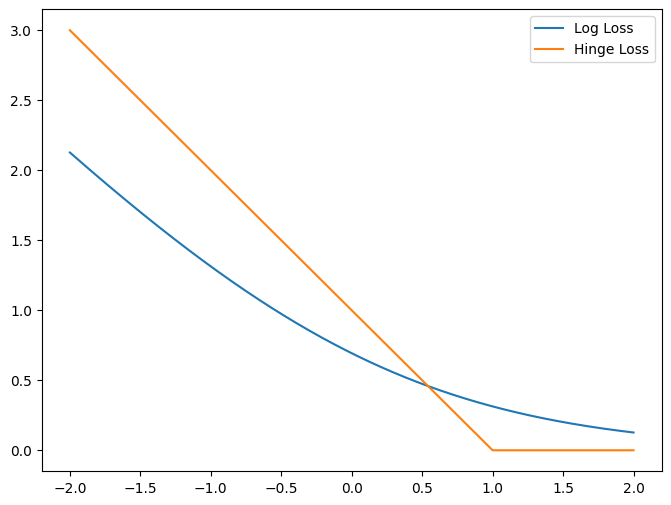

In [ ]:
def log_loss(raw_model_output):
  return np.log(1 + np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
  return np.maximum(0, 1 - raw_model_output)

x = np.linspace(-2, 2, 1000)

plt.figure(figsize=(8, 6))
plt.plot(x, log_loss(x), label="Log Loss")
plt.plot(x, hinge_loss(x), label="Hinge Loss")
plt.legend()
plt.show()


# Task 6

## Loads

In [ ]:
X = np.array([[1.09706398146998, -2.0733350146975926, 1.2699336881399381, 0.9843749048031144, 1.5684663292434287, 3.283514670986826, 2.652873983743168, 2.5324752164032454, 2.2175150059646405, 2.255746885296269], [1.829820607546445, -0.35363240824381115, 1.6859547105508972, 1.9087082542365938, -0.826962446850843, -0.4870716725758942, -0.023845855198769264, 0.5481441558908369, 0.0013923632994608738, -0.8686524574634664], [1.5798881149312172, 0.45618695176419444, 1.5665031298586414, 1.5588836327586924, 0.9422104400684558, 1.05292554434161, 1.3634784515699176, 2.037230755700812, 0.939684816618985, -0.3980079103689868], [-0.7689092872596205, 0.25373211176219285, -0.5926871666544731, -0.7644637923250287, 3.2835534802794326, 3.4029089912745474, 1.9158971800569968, 1.4517073568494965, 2.867382930831859, 4.9109192850190375], [1.7502966326234175, -1.1518164326195177, 1.776573151076056, 1.826229278440991, 0.28037182991763204, 0.5393404523102987, 1.3710114342311053, 1.42849277275407, -0.009560466894930265, -0.562449981040552], [-0.47637466522134225, -0.8353353034209868, -0.3871480674633165, -0.5056504544836544, 2.2374214835894217, 1.2443354863901803, 0.8663015959315467, 0.824655646449696, 1.005401797785333, 1.8900050384577884], [1.1709076724699343, 0.16064942670380172, 1.1381250473760698, 1.0952949067351319, -0.12313622594851482, 0.08829524233446057, 0.30007239923229057, 0.6469351082080412, -0.06432461786688697, -0.7623321531499545], [-0.11851677806771972, 0.35845013245288304, -0.07286683964196805, -0.21896491102859386, 1.6040490502192795, 1.1401023496310578, 0.061025749450609096, 0.2819502582632788, 1.403354628181551, 1.6603531811406034], [-0.3201668573368245, 0.5888297779724023, -0.18408038028648188, -0.38420727288116363, 2.201838762613571, 1.6840098087195685, 1.2190962838971586, 1.1506915830787983, 1.965599911493639, 1.5724617295747656], [-0.47353452325980516, 1.1054386800464744, -0.32948178712912396, -0.5090633776200244, 1.5826994176337685, 2.5633584533783456, 1.738872087519092, 0.9417603262199591, 0.7972980240918982, 2.783095594691288], [0.5375560150472538, 0.9192733099296915, 0.44201066334189176, 0.40645325371116653, -1.017685831281403, -0.7135418515343507, -0.700684347306461, -0.4046855513147831, -1.0354755617695854, -0.8261243357380614], [0.4693926079703733, -0.32570760272629345, 0.4790818435567293, 0.3586723298019898, 0.05264241567218777, 0.47111512643160064, 0.13484897953024616, 0.4421308885217221, 0.1109206652433743, -0.28034677359536736], [1.4322007329313096, 1.2822957816574185, 1.6653596104315427, 1.3313554236673744, 0.07399204825769783, 2.680857625724992, 1.4777286885979273, 1.6219476402159578, 2.1371942512057704, 2.155096997212811], [0.4892736017011302, 1.0844950759083365, 0.48320086358060055, 0.36350730424518046, -0.8789132194755847, -0.07847777648013507, 0.1328401841539294, 0.12176962800483535, 0.12917538223402653, -1.3350441923854053], [-0.11283649414464647, 0.7726680809627252, 0.06717984116964146, -0.21782726998313734, 1.191289486899411, 2.3681582154476253, 1.5568250065403952, 0.8081474977596148, 0.939684816618985, 1.9878197184262187], [0.11721500473982452, 1.9199121743073995, 0.19610516791680035, 0.011122990415001428, 1.248221840460772, 1.0453449525773104, 0.9428869196536189, 0.6376492745698705, 1.794005571781509, 1.1301692636305567], [0.15697699220133823, 0.1955554336006982, 0.11413666944176949, 0.08421642758558748, 0.1643721595363582, -0.612909495863271, -0.18643273096939825, 0.09468594656017093, -0.8237208446780198, -0.5071634227975256], [0.5687975766241571, 0.32354412555598655, 0.6644377446309189, 0.40929735632480796, 1.4688347105110469, 1.8545731234163136, 1.0470931798000451, 1.3898017992616922, 1.2865244394413775, 1.5256807956768208], [1.6139698184696565, 0.6656229931455748, 1.5665031298586414, 1.7209974817362566, 0.13875260043374574, -0.031099077953261278, 0.7420073820219539, 1.1880928574547631, -0.8383246182705409, -1.254240761107136], [-0.16679919141384383, -1.147162298366598, -0.1857279882960305, -0.25195650134683506, 0.1017465706188615, -0.436850252137408, -0.2782095697248652, -0.02860928896887249, 0.26791123136298334, -0.7283096557696301], [-0.297445721644531, -0.8330082362945267, -0.2611060547328675, -0.38363845235843524, 0.7927630119698824, 0.4294218717279516, -0.5413617640223466, -0.45962673367395945, 0.5672885900096801, 0.7530865843319685], [-1.3130804870900492, -1.593959186646877, -1.3028062187698124, -1.0835721055756025, 0.4298192580162054, -0.7470859700913772, -0.7437478981862491, -0.7263365109480827, 0.012345193493852012, 0.8863413657382362], [0.3444263616627594, -1.170432969631196, 0.4337726232941499, 0.14081406959705278, 0.7785299235795426, 2.068724840757783, 1.492794653920302, 1.2546413318616527, 2.5899112325739453, 1.0663770810424487], [1.9973889832771092, 0.8727319674004959, 1.8630725715773442, 2.130548258100629, -0.14804413063161057, -0.040574817658636034, 0.26240748592635355, 0.9647169704921028, -0.15559820282014816, -1.4201004358362141], [0.7164849586240646, 0.48643882440817143, 0.7426991250844658, 0.7102034128480763, 1.1201240449477095, 0.7838145367089671, 0.7997602490910576, 1.1034885954180975, 0.6695150051573325, 0.07121903266797792], [0.8556519147393626, -0.6724406045688021, 0.9898403265167185, 0.7332406440185723, 1.5826994176337685, 2.335940700449351, 1.6836302146703839, 2.351917340105483, 4.484750856203646, 1.6064842269550899], [0.12857557258597152, 0.5213448313050687, 0.22411450407912203, -0.028694446175979226, 0.6433155838713089, 1.5627203404907715, 0.6742105380712667, 1.0036658838077632, 1.6078074584768567, 0.913275842830992], [1.2731527830852547, 0.22348023911821585, 1.2411005479728419, 1.2488764478717715, -0.13950427759740672, 0.04281169174866178, 0.7558178502341308, 0.7323131897145547, -0.4184661274855406, -0.8232891276230346], [0.3330657938166129, 1.3916679366010283, 0.42965360327027924, 0.22044894277901408, 0.8425788213360739, 1.2386500425669549, 0.998128792502327, 0.9954118094627227, 0.41759991068633123, 0.3689158847458118], [0.9777780190854399, -0.9865946666408726, 0.9486501262780097, 0.8538305948369708, 0.1501390711460185, 0.21527015438648217, 0.1249305523596827, 0.7895758304832736, -0.2651265047640616, -0.1853673017419629], [1.2788330670083279, 1.3544348625776716, 1.3523140886173557, 1.2318118321899227, 0.7144810258230105, 1.5987281513711957, 1.7966249545881956, 1.94695181755193, 1.3558923640058553, -0.11732230698131613], [-0.6496233248750798, -0.13721516548305113, -0.5782705965709247, -0.6094601998815683, 1.0347255146056673, 0.8956282652323895, 0.41432263626030025, 0.07482458016741708, 1.786703684985248, 2.153679393155298], [0.8215702112009221, 1.091476277287716, 0.8580316857528503, 0.6951296689957762, 1.6609814037806403, 0.8577253064108904, 1.9196636713875905, 1.8411964900060982, 1.5932036848843345, 0.1449344436586804], [1.460602152546676, 1.6709159917762024, 1.4800037093573533, 1.442275425599392, -0.1672587999585704, 1.280343297270604, 0.9654858676371811, 0.6967174941015671, 0.1510810426228088, -0.02659564730045244], [0.5687975766241571, -0.32803466985275365, 0.6191285243683394, 0.4331878182793966, 0.543683965138927, 0.9771196266986123, 0.5850702432472155, 0.7377299260034876, 0.6804678353517236, 0.33347578330797445], [0.7420462362778947, 0.5353072340638271, 0.7468181451083364, 0.6103754111092604, -0.018523026279513754, 0.5545016358388982, 0.5775372605860282, 0.29046227243160183, 0.30807160874241785, -0.8842461020961147], [0.03485088785526094, 0.5655591067078041, 0.06841554717680277, -0.06225485701694851, 0.13305936507760985, 0.10345642586306007, 0.5411278443902886, 0.18212754665294453, 0.26791123136298334, -0.2193897991222873], [-0.3116464314522146, -0.20237304502392456, -0.3855004594537679, -0.37283086242659774, -0.4647303473166827, -1.2637032988284087, -0.7932144843280466, -0.5078614806277902, -1.2581831090555424, -0.5908020621908217], [0.24502139300897557, 1.3753784667158098, 0.147088829632737, 0.12488709496066044, -0.1772219618318087, -1.005015604871678, -0.8138046369352924, -0.5140520363865707, -0.9003906560387588, -1.0997219188381655], [-0.18384004318306357, 0.35612306532642374, -0.14700920007164375, -0.27214962990368924, 0.3728869044548436, 0.4009946526118273, 0.21972058417962467, 0.14111511475102417, -0.33449442932854045, 0.19738579378667892], [-0.19520061102921055, 0.5329801669373669, -0.23845144460157722, -0.2613420399718518, -1.0489986257401513, -0.8344522901749325, -0.7244132426892014, -0.737943802995796, -0.10083405184819144, -0.9820607820645451], [-0.9023959594518448, 0.47945762302879263, -0.8266475040103387, -0.8071253315296508, 1.8744777296357449, 0.3308741787920543, 0.19586613908586448, 0.20044127410600315, 0.3044206653442878, 0.8367252237252636], [1.4037993133159423, 1.284622848783878, 1.496479789452837, 1.2773174740081863, -0.39498821420401464, 2.1729579775169054, 1.5304595672262393, 1.307518995634569, 1.8195621755684224, 0.08964788541565404], [-0.24064288241379753, 0.23046144049759548, -0.19149461632944975, -0.31196706649466993, 0.5508005093340974, 0.7440164299463933, 0.12141516045112853, 0.32657384769115444, 0.5928451937965925, 0.7119760666640774], [-0.2718844439907009, 0.5865027108459422, -0.2697559967829961, -0.35093127230155824, 0.055489033350255706, 0.006803880868237754, -0.07795778064829915, 0.09288036779719329, -0.23956990097714823, -0.14567438813158579], [1.2845133509314013, -0.3931925493936271, 1.3070048683547761, 1.1976826008262251, 0.9635600726539658, 1.2178034152151307, 1.3634784515699176, 1.3407932328380139, 0.34823198612185335, -0.32712770749331216], [-1.6845710556590472, -0.5700496510045712, -1.6582776468298692, -1.2883474937577886, -0.7372939899916993, -0.8511295920563922, -0.9154999028613228, -1.1091965906463237, -0.15559820282014816, 0.31646453461781326], [-0.2718844439907009, -0.14652343398889006, -0.24668948464931909, -0.3421145541992696, 1.3834361801690045, 0.35551110202602854, 0.42436661314188345, 0.6314587188110904, 1.1550904771086807, 0.7048880463765088], [-0.5899803436828092, -1.0843314859521835, -0.5737396745446668, -0.5847165071428875, 0.4796350673823959, -0.25434750541189033, -0.2872491489182901, -0.5527430098789483, -0.4987868822444096, -0.3356333318383938], [-0.18099990122152693, 0.7005290000424721, -0.2083825984273202, -0.2670302451991347, -0.6291225182251126, -0.5185311283977383, -0.5183861669057249, -0.3889512220945496, -0.009560466894930265, -0.7963546505302779], [-0.6723444605673733, 0.5376343011902873, -0.7104911393371802, -0.6455803030748152, -0.7109627764695691, -1.0362855458994147, -0.9068369728009572, -0.9742166811225821, -1.15595669390789, -0.5553619607529843], [-0.1383977717984766, -0.6864030073275604, -0.19602553835570768, -0.23631393697180691, -1.388457783849767, -0.8291458759399227, -0.8817270305969991, -0.8173892685668115, -1.6743906564424127, -0.4632176970146077], [-0.6212219052597131, -0.24426025330020146, -0.6697128411008587, -0.6179925077224927, -0.9785448382079666, -1.0770312266325262, -0.8672888138297232, -0.913858762474473, 0.2058451935947655, -0.24065385998498928], [1.162387246585324, -0.13721516548305113, 1.166958187543166, 1.0753861884396416, 1.3122707382173031, 0.8368786790590657, 1.1098680353099406, 1.4723425427120977, 1.023656514775985, 0.04286695151770925], [0.2762629545858789, 0.6353711205015978, 0.21793597404331605, 0.1647045315516411, -0.41277957469194004, -0.6354617563620628, -0.45536021197378995, -0.4018482132586754, -0.7141925427341064, -0.8445531884857366], [-0.7405078676442538, -0.12557982985075203, -0.7673336156665982, -0.699333842472639, -0.07972530635797698, -0.9402015452869147, -0.7337039213046659, -0.674232666645014, 0.39569425029754896, -0.5284274836602286], [1.4435613007774561, -0.1674670381270281, 1.381147228784452, 1.4138343994629772, 0.6361990396761397, 0.4237364279047268, 0.5461498328310804, 1.0580911865203746, 0.3847414201031578, -0.45187686455449927], [0.16549741808594862, 0.5353072340638271, 0.1475007316351237, 0.005719195449082689, 1.2339887520704311, 0.609460926130072, 0.5084849195251432, 0.8334256004413014, 0.786345193897506, 0.677953569283753], [-0.30596614752914086, 0.004735929230995684, -0.3855004594537679, -0.36316091354021646, -1.1215873765308864, -1.2593444585639364, -1.106184803958181, -1.1543360597207644, 0.026948967086374207, -1.1039747310107053], [-1.564717064882199, -1.7452185498667632, -1.549947420202065, -1.2240707746894912, 0.08253190129190166, -0.9782940189025211, -0.8561148895489618, -1.0606523159045538, -0.4695793350593662, 1.2861057099570412], [-1.1239270324517059, -1.026154807790689, -1.1293954757648486, -0.9754962062572263, 1.212639119484921, -0.44973725813671767, -0.9787769572152973, -0.9290772120481415, 3.4004206669589037, 0.9643095889014774], [-1.5703973488052723, 0.3933561393497803, -1.5367665561256785, -1.2317498517463232, 1.9883424367584666, -0.2787949138517572, -0.7382237109013784, -1.0229931017053062, 0.05980745766954762, 0.6765359652262402], [0.03485088785526094, 0.6656229931455748, 0.18333620584280053, -0.026134753823701642, 0.6077328628954582, 1.8280410522412647, 1.5656134863117808, 0.9701337067810358, 0.5015716088433313, 1.434954135995957], [-1.4070891860169132, -1.2635156546895874, -1.3497630470419404, -1.1205454395529415, -1.3628382247471544, -0.31897205020254604, -0.36308117437424375, -0.6995107693267009, 1.9327414209104659, 0.9685624010740183], [-0.41105140010599844, 1.058897337517279, -0.3822052434346712, -0.44336460724490623, 1.127240589142879, 0.4142606881993521, 0.3013278963424885, 0.5110008213381545, 0.34093009932559226, 0.4397960876214864], [0.18537841181670497, 1.082168008781877, 0.2237026020767353, 0.03814196524459544, 1.4830677989013865, 0.8255077914126161, 0.4758419946599977, 1.0671190803352624, 0.5161753824358535, 0.53052274730235], [-1.324157040740042, 0.40033734072915994, -1.3122799648247154, -1.096370567336989, 0.5721501419196084, -0.5043175188396763, -0.842178871625765, -0.8738780898656828, -0.3454472595229316, 0.8778357413931546], [-0.8001508488365239, -0.05809488318341843, -0.8307665240342099, -0.7417109714158969, -1.0653666773890422, -1.0865069663379008, -0.6492089657883467, -0.686613778162575, -1.07928688254715, -0.8686524574634664], [-1.4479872302630414, -0.45602336180804204, -1.366651029139811, -1.150124106734813, 0.7287141142133512, 0.7004280273016695, 2.8148331109586984, -0.13333285722157467, 1.093024439340464, 2.5038275953611304], [-0.3826499804906317, -0.6514970004306639, -0.4365763077497666, -0.43341024809716105, 0.13875260043374574, -0.985495581078606, -0.6562397496054551, -0.5230799302014588, -0.8091170710854976, -0.8884989142686555], [1.3668774678159659, 0.47014935452295287, 1.302885848330905, 1.3512641419628648, -0.4462273324092396, -0.02730878207111127, 0.241064035052989, 0.7890599508367084, -0.8383246182705409, -1.1606788933112455], [-1.4880332319207088, -1.0820044188257238, -1.366651029139811, -1.1686107737234823, 0.10459318829692944, 0.9240554843485137, -0.03439203092443178, -0.5210164116151986, 0.3299772691312011, 3.8278697850787315], [0.8726927665085823, 1.2171379021165443, 0.9156979660870428, 0.7807371576663847, 0.764296835189202, 1.4907047187299234, 1.0094282664941079, 0.7872543720737308, 0.4212508540844623, 0.2937828696975963], [-0.09295550041388961, -0.8143916992828488, -0.06339309358706487, -0.2013314748240166, 0.30883800669831246, 0.4483733511387011, -0.13696614482760072, 0.045677380136492605, -0.5462491464201062, 0.405773590241162], [-0.5161366526828555, -0.6445157990512844, -0.526370944270152, -0.5232838906882318, -0.3302276620279668, -0.6832194844771514, -0.6915192184020162, -0.6757803055847093, -0.33449442932854045, -0.5185042552576341], [0.5517567248549374, 0.08385621153062837, 0.4996769436760837, 0.46305089572263214, -0.3330742797060347, -0.3809433878756971, 0.11162228299158482, 0.45038496286676266, -0.049720844274365794, -1.2599111773371898], [-0.16963933337538045, -1.943019255615845, -0.16719239818861142, -0.27214962990368924, 2.3299365581266334, 0.006803880868237754, -0.2514674812776499, 0.4292338973575962, 2.159099911594554, 0.5120938945546739], [1.1141048332392007, -0.7306172827302967, 1.1628391675192955, 0.9985954178713218, 0.7215975700181808, 2.089571468109608, 0.9993842896125248, 1.5239305073686011, 1.2427131186638118, 0.5574572243951058], [1.7190550710465142, 1.0891492101612559, 2.1308088731289514, 1.6783359425316344, 2.2943538371507826, 4.568424975035642, 3.5982633077221924, 2.8755351813689933, 3.9955244408541675, 2.6399175848824257], [-0.3599288447983382, -0.30010986433523595, -0.3616101433153168, -0.4226026581653234, 0.21205300564399845, -0.16830778888708758, -0.6266100178047844, -0.664688893183561, -0.34179631612480055, -0.40084311848401366], [-0.7603888613750106, 0.3910290722233202, -0.7479742215544051, -0.72066461207495, 0.9849097052394769, -0.20317851100286682, -0.5384741206688913, -0.6858399586927274, 0.1109206652433743, 1.0281017714895855], [-0.2236020306445773, -0.7981022293976303, -0.22568248252757797, -0.38363845235843524, 0.8141126445553934, 0.9316360761128132, 0.3528032778606028, 0.5404059611923615, 0.476015005056419, 0.8820885535656954], [3.1504866196610024, 1.307893520048476, 3.275896439765056, 3.4786528969666883, 0.7073644816278412, 3.0731532495275067, 3.0772320069900605, 3.4971701554798615, 0.06345840106767868, 0.7119760666640774], [1.4123197392005529, 1.6290287834999264, 1.5294319496438034, 1.3569523471901477, 1.7890791992937027, 1.4167939490280006, 1.3170250584925953, 2.527316419937595, -0.6484755615677585, 1.3385570600850396], [-0.6041810534904928, -0.8469706390532855, -0.6186369928048594, -0.6017811228247364, 0.06189392312590833, -0.6195425136570331, -0.5937159935175993, -0.7812776933072589, 0.9761942506002894, -0.4419536361519057], [1.2305506536622048, -0.1791023737593272, 1.199910347734133, 1.1948384982125837, 0.16935374047297735, 0.018174768514687516, 0.5612157981534553, 1.0067611616871535, 1.169694250701203, -0.36540301704617634], [0.10017415297060478, 0.5050553614198502, 0.0939534713248024, -0.01902449728959795, -0.1366576599193388, -0.09231235644998209, 0.3967456767175294, 0.01188726328648283, 0.9615904770077672, -0.9125981832463843], [1.3895986035082588, 1.2334273720017628, 1.236981527948971, 1.1976826008262251, -0.4319942440188999, 0.3081324034991547, 0.7281969138097771, 0.8716006942871143, 0.5161753824358535, -0.9225214116489788], [-0.5019359428751724, 0.5841756437194828, -0.5020687261293136, -0.5369355832337107, -0.6148894298347718, -0.18744878309194452, -0.3596913321767094, -0.29583494588956083, 0.4322036842788534, 0.17612173292397693], [0.14561642435519176, -0.9423803912381368, 0.1565625756876396, -0.008501317619124687, 1.1984060310945805, 0.5601870796621229, 0.13635557606248358, 0.5602673275851152, 1.1112791563311162, 0.09390069758819483], [0.139936140432118, 1.100784545793555, 0.10713433540118894, 0.02221499060820344, -0.47113523709233535, -0.34645169534813297, -0.7254176403773597, -0.49909152663618467, -0.46227744826310513, -0.5865492500182818], [0.35294678754736925, 0.8075740878596225, 0.3390351627451198, 0.2085037118017201, -0.3103013382814902, -0.014042746483586766, 0.29379491368130106, 0.6683441135404901, -0.3454472595229316, -0.2590827127326644], [-0.24348302437533414, -1.0540796133082067, -0.2977653329453184, -0.2934803995060003, -1.6233037422903815, -1.0194187292238477, -0.705455236325213, -0.5787949320304826, -1.5539095243041081, -1.3633962735356748], [-0.19236046906767393, -0.23029785054144222, -0.22115156050132004, -0.28381045061961935, 0.4155861696258647, -0.4300277195495382, -0.6159382923681023, -0.5447468753571904, -0.6338717879752364, -0.8076954829903863], [0.26490238673973243, 0.12574341980690446, 0.34315418276899046, 0.14422699273342268, 0.5365674209437576, 0.9657487390521622, 1.0194722433756915, 1.011919958152804, 0.1583829294190699, 0.006009246022357024], [1.741776206738808, 0.8704049002740366, 1.6653596104315427, 1.7323738921908225, -0.39712317746256587, 0.5109132331941744, 0.7244304224791831, 0.9778719014795115, 1.0346093449703762, -0.8941693304987092], [-0.5530584981828326, -0.3373429383585926, -0.5840372246043439, -0.5795971224383328, 0.5792666861147778, -0.6400101114206428, -0.8022540635214715, -0.503218563808705, 0.32267538233494003, 0.5035882702095944], [-1.2327044695785607, 0.1513411581979628, -1.2298995643472979, -1.024983591734588, 0.4298192580162054, -0.9727980898734039, -1.0291349463053354, -1.0570927463432551, -1.6853434866368038, 0.8650773048755341], [-0.7177867319519603, -1.5008765015884855, -0.7261434154278894, -0.6890950730635296, -0.4647303473166827, -0.551317187778335, -0.5880662565217087, -0.39772117608615515, -0.6995887691415842, 0.42845525516137895], [0.08313330120138454, 0.11178101704814603, 0.10342721737970559, -0.03523588218735449, 0.08253190129190166, 0.18494778732928288, 0.06378784309304464, 0.24429104406403115, 0.24600557097420103, 0.15627527611878786], [-0.14691819768308695, 1.3241829899336948, -0.1614257701551922, -0.2053132184831146, -0.10534486546058945, -0.3644556007883449, -0.032006586415055806, -0.10392771736736761, -0.7397491465210196, -0.5794612297307141], [-2.0296483039857542, -1.3635795411273581, -1.9845040327204428, -1.4544430863944506, 1.4688347105110469, -0.5431680516317128, -1.1148728439607505, -1.2618195840825894, 0.4322036842788534, 2.1806138702480538], [-0.5530584981828326, 0.28631105153263, -0.6075156387404083, -0.5579819425746577, -1.155035134248186, -1.2121552748311701, -0.8156878826005892, -0.805266096872533, -0.2651265047640616, -0.8544764168883311], [-1.2074272061208846, 0.025679533369133725, -1.1541095959080736, -1.0141760018027504, 0.29460491830797275, -0.13969105497685588, -0.34223992234495854, -0.4805198593598433, 0.48696783525081017, 0.05987820020787045], [-1.0330424896825319, 8.179497807621167e-05, -1.0115915030821414, -0.9066689230071024, 0.25119399871743486, -0.35175810958314285, -0.7388514594564772, -0.9520338563202856, 1.480024439542291, 0.2852772453525167], [-0.28892529575992115, -0.8679142431914236, -0.19602553835570768, -0.35462860569929205, 3.09140678700984, 1.3675201025600516, 1.485261671259115, 1.2146606592528626, 0.4139489672882012, 2.001995759001354], [-0.7064261641058133, -0.22331664916206342, -0.6919555492297611, -0.6893794833248938, 1.269571473046282, -0.05005055736401079, -0.22723638705083027, -0.36289929994301534, -0.03876801407997364, 0.3405638035955411], [-0.5019359428751724, -0.17444823950640773, -0.5337851803131193, -0.5352291216655259, -0.8248274835922917, -0.6858726915946564, -0.7830449577354437, -0.7663171835568728, -0.765305750307932, -0.3030284385155833], [2.3126447410076807, 0.08851034578354867, 2.5056396953012023, 2.429179032532984, 2.5790156049575885, 3.268353487458226, 4.238566833923125, 3.440423394357707, 2.7176942515085107, 1.0763003094450432], [-0.791630422951914, 0.4585140188906546, -0.8027571878718877, -0.7348851251431574, -0.6241409372884934, -0.7313562421804551, -0.4704261772961648, -0.7719918596690883, -1.1851642410929335, 0.3533222401131635], [-1.2355446115400979, -0.5351436441076747, -1.2138353862542015, -1.0372132329732462, 0.522334332553417, -0.38473368375784683, -0.5707403964009776, -0.803202578286273, -0.8310227314742799, 1.1131580149403955], [-0.42525210991368156, 0.3421606625676653, -0.40444795156357366, -0.4962649158586377, 0.21134135122448172, 0.3138178473223795, 0.2222315784000204, 0.29123609190144945, -0.27973027835658376, 1.120246035227962], [0.03769102981679756, 0.08385621153062837, 0.2414143881793798, -0.07107157511923715, -1.2802863120831813, 2.2544493389831284, 2.655384977963564, 0.7495951578744832, -0.3929095236986272, 2.111151271429892], [-1.0273622057594587, 0.20951783635945742, -0.9609275567885296, -0.9120727179730214, 1.127240589142879, 0.4919617537834249, -0.30181291539658595, -0.4704602062518252, 0.40299613709381005, 2.129580124177568], [-1.5340435316976027, -0.8050834307770095, -1.4881621198440018, -1.2058685179621857, 1.3265038266076439, -0.4232051869616684, -0.5961014380269752, -0.7655433640870254, -0.5937114105958018, 1.918357119608057], [-0.6240620472212497, 0.5213448313050687, -0.6359368769051172, -0.6151484051088513, 0.09391837200417441, -0.48991439448750657, -0.697043405686887, -0.7438764189312939, -0.451324618068714, -0.12157511915385594], [-1.4704243517591815, -0.821372900662228, -1.3687105391517465, -1.1651978505871128, -0.12384788036803256, 0.37825287731892776, 0.04809412921557079, -0.6664944719465385, -1.849635939552674, 1.2520832125767167], [0.2109396894705351, -0.609609792154387, 0.274778450372734, 0.07852822235830452, 1.411902356949685, 1.1476829413953573, 1.0069172722737123, 1.0397774590673157, 1.260967835654464, 0.6921296098588884], [0.4693926079703733, 0.842480094756519, 0.5655812640580181, 0.3632228939838163, 1.3620865475834945, 1.3428831793260774, 1.563102492091385, 1.1831920008123955, 1.0382602883685073, 1.4902406942389834], [1.0857034136238335, 0.16763062808318135, 0.9156979660870428, 0.9303369551439263, -0.8782015650560678, -0.7034975674466535, -0.199238801493417, 0.1816116670063795, 1.1587414205068118, -1.778754262387127], [-0.7717494292211571, -1.9709440611333622, -0.7673336156665982, -0.7155452273703954, -0.18718512370504697, -0.7105096148286306, -0.6739422588592455, -0.5852434276125456, -0.527994429429454, -0.23640104781244947], [1.2873534928929384, -0.5048917714636969, 1.212267407805746, 1.2005267034398666, 0.6433155838713089, 0.10724672174521008, 0.7143864455975999, 0.9732289846604262, 0.5636376466115491, -0.0946406420611002], [2.8749928493919445, 0.21184490348591675, 3.057588378499899, 3.145892891170636, 3.440117452573176, 3.455973133624646, 4.243588822363916, 3.927929660361666, 3.079137647923426, 0.8466484521278581], [0.10585443689367803, -1.9546545912481437, 0.09518917733196372, -0.04035526689190902, 0.9777931610443065, 0.10535157380413508, -0.00476229912376116, 0.2285567148437976, 0.16203387281719994, 0.17328652480894907], [-0.21508160475996743, -0.6747676716952613, -0.24174666062067443, -0.2883610148014458, -1.7941008029744652, -0.5892201465998341, -0.09892458238860409, -0.5395880788915399, -1.4224755619714124, -0.647506224491362], [-0.07875479060620649, -0.48394816732555884, -0.14536159206209573, -0.18824860280126574, -0.6056379223810513, -0.8145532367936456, -0.9365922543126476, -0.9675102457172366, -0.7214944295303675, -0.5525267526379575], [-0.14691819768308695, 1.256698043266361, -0.1733709282244174, -0.23403865488089357, -0.26902538194950354, -0.4874507021641093, -0.4513426212211566, -0.4660752292560224, -0.18480575000519153, -0.21230177883471962], [1.3839183195851856, -0.08834675582739542, 1.2946478082831636, 1.3740169628719965, -1.0098576326667148, -0.45599124634226496, 0.049098526903729074, 0.1896078015281375, 0.49061877864894016, -1.7518197852943715], [0.2762629545858789, -0.6747676716952613, 0.31349723859712014, 0.05577540144917272, 1.3265038266076439, 1.4471163160851996, 0.31388286744446764, 0.9394388678104163, 0.6914206655461148, 0.26543078854732766], [1.6082895345465833, 1.3567619297041318, 1.582979209954125, 1.5275985040086362, 0.36577036025967424, 1.0339740649308609, 2.080367301492923, 1.7019089854335385, 1.4252602885703343, -0.23640104781244947], [-0.550218356221296, -1.3961584808977954, -0.5309018662964099, -0.566229840154218, 0.7287141142133512, -0.17531983626906508, -0.7564284189992481, -0.5184370133823735, 0.24965651437233108, 0.2711012047773814], [0.3785080652011999, 0.04429607038081244, 0.400820463103183, 0.26737663590409844, 0.9137442632877754, 0.340349918497429, 0.7256859195893812, 0.8241397668031308, 0.43585462767698346, -0.6857815340442261], [0.5773180025087675, 0.5236718984315281, 0.5861763641773725, 0.4405824850748642, 0.3159545508934828, 0.45595394290300056, 0.19461064197566652, 0.18599664400218222, 1.2719206658488553, -0.5511091485804445], [0.44951161423961694, -1.2472261848043689, 0.4131775231747955, 0.3037811493587095, -0.12384788036803256, -0.18422703159211729, -0.2190756558345439, 0.26853738745258793, 0.01599613689198307, -0.7892666302427102], [1.2277105117006677, 0.6097733821105403, 1.1628391675192955, 1.1948384982125837, -0.14662082179257707, -0.13741687744756603, 0.33271532409743626, 0.5042943859328091, -0.4367208444761928, -0.7835962140126564], [-0.38549012245216835, 0.7400891411922881, -0.4221597376662187, -0.4226026581653234, -0.4134912291114568, -0.8856212845839562, -0.5234081553465165, -0.5643503019266616, -0.8273717880761499, -0.30444604257309626], [-0.6865451703750564, -0.609609792154387, -0.7104911393371802, -0.6578099443134734, 0.6219659512857989, -0.8223233433520529, -0.6638982819776623, -0.5911760435480434, -1.7255038640162395, -0.47455852947471516], [-0.7660691452980839, -0.90747438434124, -0.7788668717334366, -0.7254995865181405, 0.0021149518864795693, -0.6718485968307016, -0.6750722062584237, -0.5202425921453511, -0.2833812217547138, -0.5879668540757947], [0.23366082516282857, -0.4001737507730067, 0.201047991945445, 0.0660141708582821, 1.4474850779255357, 0.4957520496655749, 0.8173372086338284, 0.9626534519058428, 0.5307791560283757, -0.09038782988855941], [-0.8086712747211342, -1.3728878096331971, -0.7813382837477593, -0.7681611257227626, 1.4261354453400257, 0.1754720476239084, -0.5329499333840205, -0.024740191619634616, -0.14829631602388704, -0.29452281417050175], [-1.2466211651900907, -1.7033313415904867, -1.2657350385549746, -1.0420482074164368, -0.2747186173056394, -1.2000263280082903, -1.1148728439607505, -1.2618195840825894, 0.33362821252933117, 0.2016386059592197], [0.5631172927010839, -0.2884745287029369, 0.5408671439147925, 0.44968361343851704, 0.060470614286874856, 0.17736719556498312, 0.0711952760432122, 0.271116785685413, 0.18028858980785217, -0.045024500048127566], [-0.7660691452980839, -0.4606774960609615, -0.7541527515902117, -0.7306189712226953, 0.9137442632877754, -0.17967867653353733, -0.8598813808795556, -0.7817935729538239, -0.608315184188323, 0.4001031740111083], [-0.3485682769521912, -0.7841398266388714, -0.33895553318402716, -0.4058224527448386, -0.6824965996888886, -0.17531983626906508, -0.5004325582298949, -0.4653014097861748, -0.12273971223697372, -0.06345335279580269], [-0.9591987986825783, -1.005211203652551, -0.9765798328792387, -0.8520621528251862, -1.3115991065419297, -1.003499486518818, -0.8322604444552015, -1.0586919732476068, -1.5064472601284127, -0.8388827722556829], [-0.6325824731058596, -1.0796773516992642, -0.5708563605279574, -0.6316442002679719, 1.3407369149979835, 0.4786957181959001, -0.649083416077327, -0.4872262947651888, 0.6695150051573325, 2.210383555455837], [-0.6609838927212263, -0.6305533962925259, -0.5346089843178938, -0.6339194823588851, 0.906627719092605, 1.2443354863901803, 0.967996861857577, 0.6508042055572789, 3.1631093460804247, 1.5469448565395227], [0.23366082516282857, -0.12092569559783255, 0.24182629018176707, 0.09843694065379485, -1.06607833180856, 0.23422163379723168, 0.021352040768355285, -0.34303793355026146, -0.24687178777340932, 0.30228849404267794], [0.08881358512445778, -0.9563427939968956, 0.0824202152579639, -0.04206172846009397, 0.23767256474661091, -0.042469965599711036, -0.04933244653578683, 0.16510351831629833, -0.31989065573601827, -0.2817643776528803], [-0.10999635218310985, -0.321053468473374, -0.15854245613848225, -0.19877178247173932, -1.2041392891948606, -0.7690696862078468, -0.7531641265127335, -0.9190175589401235, -1.23627744866676, -0.9919840104671396], [-0.3201668573368245, 0.34681479682058475, -0.34842927923892975, -0.3853449139266202, 1.2197556636800915, -0.5391882409554554, -0.7211489502026869, -0.5795687515003302, 2.659279157138424, -0.2732587533077997], [-1.678038729147513, 0.32819825980890605, -1.5940209344574834, -1.2826592885305057, -0.16441218228050247, 0.4957520496655749, 0.5436388386106845, -0.702606047206091, 1.4982791565329432, 2.808612467726531], [-1.2486092645631663, -0.9191097199735391, -1.1611119299486543, -1.0087722068368314, 0.7714133793843723, 1.05292554434161, 4.042709284732251, 0.7648136074481519, 2.6884867043234686, 4.2758326672529945], [-0.8455931202211108, -1.4450268905534507, -0.8690734102562088, -0.7764090233023231, 0.08395521013093613, -1.0084268711656128, -0.8660333167195252, -0.8011390597000128, 0.06710934446580873, -0.24774188027255695], [-0.2775647279137741, -0.9191097199735391, -0.27428691880925404, -0.3298849129606114, -0.17935692509035892, -0.3669192931117424, 0.05186062054616444, -0.36341517958958036, 0.03790179728076534, -0.10314626640618081], [-0.5331775044520758, -0.3140722670939944, -0.5642659284897641, -0.5534313783928313, -0.6988646513377796, -0.7116467035932758, -0.6271122166488635, -0.6605618560110407, 0.5782414202040713, -0.07337658119839723], [1.0090195806623432, 0.337506528314745, 1.047506606850911, 0.8782898773142875, 1.0774247797766885, 1.178005308452557, 1.2140742954563668, 1.4568661533151466, 0.5818923636022013, -0.16126803276423404], [0.7704476558932619, 0.03964193612789297, 0.676794804702532, 0.6408073090752243, -1.5592548445338505, -0.6085506555987984, -0.4682918322088284, -0.5470683337667329, 0.11822255203963539, -1.4342764764113496], [-0.5871402017212726, -1.5241471728530833, -0.6231679148311174, -0.5867073789724365, -0.23130769771510157, -0.9841689775198535, -0.8672888138297232, -0.7554837109790071, -0.8091170710854976, -0.5284274836602286], [-0.9165966692595279, -1.4729516960709679, -0.9588680467765942, -0.8193549727683093, -1.5094390351676599, -1.2728000089455684, -1.076077983255635, -1.0918888285040669, -1.3494566940088035, -0.7609145490924406], [-0.6751846025289099, 0.20719076923299728, -0.6536486630077623, -0.668617534245311, 0.8923946307022643, 0.18494778732928288, -0.2557361714523227, -0.29764052465253843, 0.6622131183610714, 0.24558433174213862], [1.437881016854383, -0.779485692385952, 1.4140993889754188, 1.4280549125311846, -0.6703984745570992, 0.2683342967365807, 0.38293520850535256, 1.2316846875895089, -0.2578246179678005, -1.5646960497025904], [1.55148669531585, -0.2652038574383395, 1.5953362700257372, 1.5901687615087488, 1.1130075007525393, 1.1799004563936317, 2.0339139084156006, 2.0552865433305874, 0.786345193897506, -0.28034677359536736], [-0.5076162267982456, 0.6819124630307934, -0.4991854121126043, -0.5414861474155371, 0.3444207276741632, -0.05384085324616054, -0.44067089578447444, -0.5339134027793245, -0.9515038636125854, 0.6822063814562939], [2.596658937161349, 0.6400252547545173, 2.476806555134105, 2.9325851951475252, -0.8518703515339376, 0.1925283790935829, 0.5474053299412782, 1.2407125814043967, -0.03876801407997364, -1.0302593200200039], [0.23934110908590234, 0.10945394992168671, 0.1454412216231884, 0.10042781248334401, -0.8646801310852449, -0.9631328353739217, -0.870427556605218, -0.7616742667377876, -1.082937825945281, -1.4371116845263765], [-0.9449980888748947, -2.229248512170398, -0.9555728307574975, -0.8455207168138108, -0.029909496991786508, -0.8903591544366435, -0.7971065253696602, -0.8238377641488744, -1.5721642412947605, 0.1704513166939232], [0.7534068041240422, -0.11394449421845293, 0.7138659849173695, 0.6581563350184371, -0.5487055688196895, -0.23729117394221583, -0.057493177752073195, 0.4343926938232467, 0.2971187785480267, -1.0571937971127605], [0.9493765994700727, 1.254370976139901, 0.9939593465405892, 0.9377316219393943, 0.6077328628954582, 1.0605061361059098, 1.5957454169565306, 1.42849277275407, -0.9989661277882811, 0.12083517468095055], [0.23934110908590234, -0.5444519126135137, 0.17509816579505866, 0.08819817124468547, 0.15583230650215438, -0.48309186189963677, -0.788192495887255, -0.28654911225139, -0.11543782544071364, -0.8927517264411953], [-0.5132965107213189, -1.6055945222791757, -0.5403756123513132, -0.5426237884609937, 0.4582854347968858, -0.6544132357728123, -0.6143061461248449, -0.3074422379372741, 0.5380810428246358, -0.46038248889958083], [-0.19804075299074717, 0.0792020772777089, -0.2524561126827383, -0.2545161936991123, -0.41847281004807596, -0.7857469880893062, -0.3794026368068166, -0.37502247163729363, -0.7799095239004542, -0.8629820412334117], [0.3785080652011999, -1.721947878602165, 0.4337726232941499, 0.23324740454040072, 2.0879740554908492, 0.9695390349343123, 1.4362972839613963, 1.5677802773266294, 0.5636376466115491, 1.118828431170449], [-0.8654741139518677, -1.0657149489405053, -0.896258942413757, -0.8025747673478246, 0.3017214625031421, -0.889032550877891, -0.818198876820985, -0.5955610205438463, -0.8967397126406287, 0.5517868081650521], [-0.9847600763364084, -0.9633239953762749, -1.008296287063045, -0.8682735377229426, -0.6006563414444321, -1.1621233691867914, -1.1148728439607505, -1.2618195840825894, 0.4249017974825923, -0.4320304077493112], [-1.549664312486055, -1.1262186942284602, -1.5466522041829684, -1.2163916976326592, -0.35442391229154474, -1.1670507538335861, -1.1148728439607505, -1.2618195840825894, -0.32719254253227936, 0.6297550313282934], [-1.1994748086285818, -0.2861474615764775, -1.1273359657529134, -1.0025151810868203, 0.04481421705750068, 0.4749054223137501, 0.526061879067914, -0.30331520076475377, -0.5206925426331929, 2.6030598793870734], [0.6625222613548682, 0.19090129934777872, 0.7138659849173695, 0.5062812554499824, 0.13875260043374574, 0.971434182875387, 1.1362334746240965, 1.0250748891402122, -0.06432461786688697, 0.06129580426538339], [-0.31732671537528784, 0.6819124630307934, -0.4102145795969929, -0.36543619563112983, -2.4089702214371664, -1.6101363424569095, -1.0948476650530938, -1.214049128810667, -1.5210510337209338, -1.4824750143668082], [-0.3741295546060213, -1.44968102480637, -0.4398715237688632, -0.4154924016312197, -0.6383740256788341, -1.2621871804755485, -0.9994549946202568, -0.9187596191168409, -1.2618340524536724, -0.2080489666621788], [3.718515011968339, 0.6004651136047013, 3.7125125622953687, 4.536659069241317, 0.927977351678115, 1.649897145780219, 2.4896593594174408, 3.5822902971630914, -0.042418957478104695, -0.7226392395395763], [1.9775079895463523, 1.6941866630408007, 2.0896186728902424, 1.8660467150319717, 1.2624549288511115, 3.389642955687023, 2.0075484691014442, 2.596960172223875, 2.129892364409509, 1.585220166092388], [0.44667147227807985, 0.23744264187697428, 0.3802253629838286, 0.3177172521655527, -0.027774533733235306, -0.3098753400853864, -0.2871235992072704, 0.07663015893039472, -0.7068906559378453, -1.0359297362500586], [-0.7717494292211571, -1.01684653928485, -0.7595074776212436, -0.7192425607681293, -0.4106446114333888, -0.4319228674906132, -0.33885008014742424, -0.6528236613125652, -2.3534661284946754, -0.08897022583104548], [0.32738550989353915, 0.7261267384335296, 0.2863117064395725, 0.15844750580163006, -0.4120679202724233, 0.016279620573612513, -0.4400431472293755, -0.42016194071173424, -0.30893782554162713, 0.05279017992030378], [-1.149488310105536, -0.9726322638821142, -1.1619357339534284, -0.959569231620834, -0.2626204921738499, -1.087644055102546, -1.0948225551108899, -1.199810850565472, -0.39656046709675724, -0.3285453115508261], [1.187948524239154, -0.1651399710005688, 1.096934847137361, 1.0981390093487735, -0.7458338430259032, -0.37260473693496715, -0.08925725464008029, 0.2378425484819682, -0.6959378257434541, -1.211712639381731], [-0.6865451703750564, -0.48860230157847834, -0.7121387473467282, -0.6671954829384903, 0.09818829852127584, -0.8136056628231081, -0.6366539946863677, -0.4263524964705146, -1.07928688254715, -0.2619179208476923], [-0.6581437507596897, -0.4420609590492828, -0.6878365292058904, -0.6427362004611737, 0.30883800669831246, -0.9233347286113476, -0.819454373931183, -0.8612390385248394, -0.34179631612480055, -0.708463198964442], [-0.5189767946443922, -0.7887939608917909, -0.5411994163560871, -0.5437614295064503, -1.1073542881405467, -0.6028652117755737, -0.632259754800675, -0.8351871163733051, -0.527994429429454, -1.1422500405635705], [0.026330461970651073, 0.8913485044121746, 0.09889629535344764, -0.12795362739206664, 0.7927630119698824, 2.595575968376619, 1.3722669313413032, 0.44522616640111257, 2.089731987030075, 1.7893551503743303], [-0.38549012245216835, 0.49342002578755106, -0.4098026775946062, -0.4194741452903179, -0.6312574814836638, -0.7264288575336604, -0.7241621432671619, -0.5230799302014588, -0.4294189576799317, 0.010262058194897816], [-1.2517334207208564, -0.24891438755312095, -1.2867420406767163, -1.0431858484618932, -1.9115237821947724, -1.5331933360492664, -1.1148728439607505, -1.2618195840825894, -0.5791076370032796, 0.23707870739705703], [-0.5076162267982456, 1.7616716097081342, -0.44563815180228245, -0.5047972236995621, 0.500984699967907, 0.5867191508371724, 0.24734152060397854, -0.08509811026774379, 0.479665948454549, 0.931704695578668], [0.20809954750899848, 0.9122921085503126, 0.34727320279286167, 0.046958683346884085, 0.5721501419196084, 1.774976909891166, 1.0157057520450974, 1.0281701670196024, -0.27242839156032267, 0.5560396203375929], [-0.3457281349906546, -0.6887300744540206, -0.3887956754728645, -0.3938772217675446, -1.2062742524534118, -0.9604796282564166, -0.6286188131811011, -0.6486966241400449, 0.06345840106767868, -0.8686524574634664], [-0.10147592629849998, 0.698201932916012, -0.05515505353932358, -0.18767978227853763, 1.6823310363661503, 0.4237364279047268, 0.6239906536633508, 0.4214957026591208, 0.08171311805833091, 0.8466484521278581], [1.1226252591238102, 0.5934839122253218, 1.047506606850911, 1.0497892649168683, -1.6119172715781098, -0.33962916276026317, 0.26994046858754084, 0.2285567148437976, -0.15194725942201812, -1.3322089842703775], [1.4350408748928458, 0.7447432754452075, 1.4635276292618695, 1.4024579890084112, -0.7920913802945089, 0.7288552464177939, 0.28375093679971786, 0.48494889918662026, -0.16290008961640925, -1.0642818174003281], [0.09165372708599441, 0.21649903773883622, 0.1038391193820923, -0.03466706166462607, 0.16793043163394386, 0.3081324034991547, 0.36661374607277963, 0.28066055914686616, 0.5052225522414624, 0.26401318448981276], [-0.538857788375149, 0.06291260739249033, -0.5531445744253124, -0.5514405065632823, -0.03560273234792239, -0.44480987348992285, -0.5891962039208869, -0.20246072986128927, 0.6110999107872447, -0.37816145356379777], [0.9692575932008295, 0.007062996357455833, 0.9527691463018804, 0.8438762356892257, -0.47540516360943774, 0.29297121997055525, 0.1858221622042811, 0.6696338126569029, -1.1157963165284546, -1.1181507715858405], [2.6023392210844225, 1.7174573343053987, 2.7568999167573254, 2.9297410925338836, 1.2624549288511115, 1.9720722957629608, 3.3082434752664756, 2.9168055530941968, 1.4179584017740732, -0.07195897714088428], [-0.09011535845235298, 1.0379537333791409, -0.016848167317324133, -0.16236726901712856, 2.5576659723720785, 1.3732055463832769, 0.8411916537275884, 1.1050362343577924, 1.6041565150787256, 1.6178250594151975], [-0.4706943812982685, -0.1604858367476485, -0.44810956381660505, -0.4919987619381755, 0.23411429264902625, 0.027650508220062275, -0.109847407247326, -0.2762315193200894, 0.4139489672882012, 0.132176007141058], [0.2819432385089522, -0.6072827250279278, 0.2805450784061532, 0.1755121214834789, -0.5408773702050024, -0.16034816753457273, -0.16697252576133076, -0.20968304491319983, -0.7945132974929764, -0.4164367631166629], [-1.2074272061208846, -0.4699857645668004, -1.1965355021539437, -1.0224238993823107, 0.8923946307022643, -0.6068450224518311, -0.8944075514099981, -0.7583210490351149, 0.4468074578713746, 0.007426850079871933], [0.818730069239386, 0.22580730624467601, 0.7303420650128533, 0.7093501820639836, -0.6148894298347718, -0.5931999572760915, -0.24230235237320505, 0.1284760634101809, 0.7826942504993759, -1.4980686589994565], [-0.28892529575992115, 0.7563786110775066, -0.20385167640106228, -0.35690388779020543, 0.27325528572246166, 0.8330883831769156, -0.021962609533472437, 0.05418939430481579, 0.14012821242841766, 1.4604710090311999], [0.3245453679320025, -1.484587031703267, 0.2554190562605409, 0.20082463474488796, -1.0347655373498106, -0.796738846147541, -0.37513394663214367, -0.4475035619796811, -1.6524849960536305, -1.0685346295728688], [1.832660749507981, 0.6632959260191155, 1.7600970709805723, 1.8063205601455008, -0.388583324428362, 0.5772434111317977, 0.9441424167638169, 1.204343066321562, -0.17020197641267035, -1.780171866444641], [-0.6496233248750798, -0.0813655544480158, -0.6779508811486, -0.6452958928134509, -0.544435642302588, -0.6697639340955193, -0.7797806652489291, -0.9025094102500423, -1.0172208447789333, -0.3157868750332047], [3.971287646545104, -0.1907377093916263, 3.9761298438231054, 5.244840620038045, 1.269571473046282, 0.8956282652323895, 2.9039734057827498, 2.8523205972735672, -0.5973623539939319, -1.069952233630382], [0.9351758896623901, 1.4591528832683618, 0.9280550261586553, 0.8336374662801163, 0.3017214625031421, 0.19442352703465765, 0.9968732953921289, 0.4398094301121796, -1.838683109358283, -0.5865492500182818], [0.0178100360860407, 1.0519161361378992, 0.03711099499538447, -0.12567834530115327, -0.12313622594851482, 0.4976471976066496, 0.2850064339099158, 0.4049875539690396, 1.5457414207086388, 0.217232250591868], [-0.07591464864466987, -0.5491060468664332, -0.041562287460549754, -0.21612080841495238, 0.4440523464065451, 0.8975234131734642, 0.1281948448461972, 0.18315930594607455, 1.0747697223498118, 0.9019350103708844], [-0.6354226150673962, -0.21866251490914312, -0.6033966187165376, -0.6333506618361567, -0.19430166790021636, 0.20958471056325742, -0.28172496163341937, -0.45137265932891896, 0.5672885900096801, 0.04853736774776298], [-1.115406606567096, -0.4211173549111447, -1.1088003756454943, -0.9490460519503605, -1.1258573030479888, -0.857952124644262, -0.389948812532479, -0.985566033347013, 0.556335759815288, 0.04995497180527592], [1.6111296765081204, 0.5283260326844476, 1.5541460697870284, 1.6356744033270123, -0.18006857950987665, 0.4976471976066496, 0.4821194802109873, 0.9799354200657716, 1.0309584015722462, -0.9905664064096267], [1.5344458435466302, 3.067156267652074, 1.4841227293812238, 1.6157656850315218, -0.8653917855047616, 0.16410115997745864, 0.32267134721585305, 0.4501270230434803, -1.4005699015826292, -1.3704842938232427], [-0.13555762983693997, -1.4264103535417723, -0.16842810419577275, -0.24456183455136715, 0.007096532823098715, -0.3265526419668458, -0.6267355675158043, -0.6007198170094966, -1.6488340526554994, 0.09106548947316698], [-0.16111890749077007, -1.2542073861837482, -0.1391830620262892, -0.26617701441504243, 0.6219659512857989, 0.2816003323241055, -0.12805211534519556, -0.11372943065210325, 0.549033873019028, 0.032943723115114724], [-1.1210868904901692, -0.40948201927884564, -1.1059170616287843, -0.9720832831208565, 0.6931313932375005, -0.3661612339353124, -0.8929009548777604, -0.7678648224965681, 0.3591848163162445, 0.890594177910777], [0.46087218208576347, 0.22348023911821585, 0.4378916433180205, 0.30264350831325265, 0.4369358022113748, 0.30434210761700475, 0.32518234143624875, 0.4049875539690396, 0.45045840126950565, 0.032943723115114724], [-0.24348302437533414, -0.528162442728295, -0.3055914709906729, -0.30855414335830034, -0.8476004250168363, -1.0309791316644048, -0.6686691709964143, -0.628319378100726, -1.152305750509759, -0.8587292290608719], [0.06041216550909105, -1.354271272621519, 0.02228252290944933, -0.03893321558508828, 0.19212668189752188, -0.532555223161693, -0.39622629808346854, -0.07452257751316055, 0.9615904770077672, -1.1791077460589208], [-1.0472431994902156, -0.8911849144560213, -1.044131761270721, -0.9251555899957721, 0.6361990396761397, -0.5139827733391585, -1.0314701709303036, -0.9481647589710478, -0.08623027825567027, 0.2413315195695978], [0.2478615349705122, -0.8795495788237226, 0.22576211208867064, 0.08421642758558748, -0.9002628520610947, 0.09966612998091033, -0.29817197377701204, -0.2868070520746726, 0.2533074577704611, -0.5284274836602286], [-0.42809225187521865, 1.0891492101612559, -0.43740011175454113, -0.4507592740403741, -1.2333171203950577, -0.5505591286019051, -0.4321335154351287, -0.7366541038793833, -1.086588769343411, -0.36965582921871715], [-0.3684492706829481, 0.707510201421851, -0.27634642882118937, -0.43141937626761206, 0.8852780865070939, 1.4319551325566, 1.013194757824702, 0.5079055434587644, 1.1368357601180286, 1.3810851818104437], [0.8300906370855325, -0.04878661467757949, 0.8827458058960759, 0.682900027757118, 1.2624549288511115, 1.0017565499325864, 1.2831266365172518, 1.549724489696853, 1.166043307303073, 0.06413101238041125], [-0.7973107068749872, 1.8128670864902492, -0.8324141320437579, -0.7371604072340706, -1.9592046283024127, -1.2547961035053565, -0.9098501658654323, -1.1812133893068024, 0.20949613699289657, -0.9239390157064928], [-0.825712126490354, 3.378983262597686, -0.8723686262753054, -0.7624729204954797, -1.320850613995651, -1.3000901392970476, -1.0525123024972205, -1.0958611017826174, 0.12187349543776543, -0.6404182042037943], [1.8127797557772252, 1.9827429867218136, 1.7477400109089603, 1.8887995359411036, -0.3394791694816873, 0.05797287527726129, 0.836169665286797, 0.8893985420936079, -1.3275510336200202, -0.9749727617769783], [-1.295187592732368, -0.7864668937653312, -1.3081609448008447, -1.067360720677846, -0.8340789910460122, -1.2028690499199026, -0.9074647213560562, -0.8318338986706323, -0.9515038636125854, 0.17470412886646397], [-0.027632235298546276, 0.45618695176419444, -0.08975482173983852, -0.14644029438073625, -0.40281641281870173, -0.6612357683606821, -0.9313191664498165, -0.7727656791389358, -1.07563593914902, -0.6304949758011997], [2.5796180853921293, 1.7872693480991917, 2.5344728354682977, 2.8870795533292615, -0.090400122650733, 1.2102228234508308, 1.333346520925168, 1.928896029922154, 0.35553387291811345, 0.04144934746019434], [1.8042593298926148, 0.5050553614198502, 1.6694786304554134, 1.8518262019637644, -0.9116493227733674, -0.39534651222786665, 0.020347643080197, 0.29149403172473204, -1.2581831090555424, -1.5632784456450775], [0.026330461970651073, 1.9920512552276535, 0.023930130918997355, -0.08813619080108599, -1.0055877061496135, -0.008357302660361754, 0.26994046858754084, -0.1248208430532515, -1.7145510338218473, -0.21371938289223355], [0.9465364575085365, 4.651888980771188, 0.8827458058960759, 0.7557090546663399, 0.12523116646292276, 0.48248601407805014, 0.6641665611896835, 1.0108881988596736, -0.009560466894930265, -0.44478884426693255], [-0.1383977717984766, -0.8586059746855846, -0.18902320431512715, -0.22635957782406177, -0.15160240272919623, -0.720932928504543, -0.5241614536126352, -0.2994461034155159, -0.3454472595229316, -0.8785756858660609], [-0.48489509110595214, -0.9889217337673327, -0.550261260408603, -0.5073569160518394, -1.2169490687461668, -1.3343923170305043, -0.9826689982569109, -0.9760222598855598, -0.9697585806032377, -0.7453209044597923], [-0.8029909907980605, -0.25589558893249975, -0.7430313975257599, -0.7550782537000119, -0.03133280583081999, 0.5336550084870739, 0.8286366826256094, -0.525659328434284, 0.8849206656470283, 1.9693908656785428], [-0.10715621022157323, 1.0426078676320605, -0.1412425720382245, -0.18455126940353195, -1.133685501662676, -0.6873888099475163, -0.5251658513007936, -0.657208638308368, -0.14099442922762595, -1.2060422231516774], [1.4975239980466526, 0.9797770552176462, 1.5294319496438034, 1.4223667073039017, 0.4511688906017155, 0.975224478757537, 1.4576407348347609, 1.0302336856058623, 0.6074489673891147, -0.39659030631147385], [-1.0358826316440686, 0.13272462118628406, -1.0400127412468505, -0.9021183588252762, 0.7571802909940316, -0.8458231778213823, -0.5083421900241416, -0.4699443266052601, -0.27242839156032267, 0.2271554789944625], [-0.263364018106091, -0.43275269054344384, -0.3228913550909307, -0.32220583590377927, -1.7229353610227636, -1.1200510848949274, -0.570489296978938, -0.9767960793554072, -1.1851642410929335, -0.9140157873038983], [-0.3514084189137278, -1.2053389765280929, -0.2891153908951892, -0.4058224527448386, -0.6234292828689767, 0.5734531152496477, 0.6101801854511736, -0.23521908741816902, -0.7872114106967153, 0.1832097532115436], [-0.987600218297945, 1.3800326009687292, -0.9868773829389159, -0.8756682045184104, 0.014924731437785804, -0.606465992863616, -0.8161900814446683, -0.8452467694813234, 0.3117225521405489, 0.06980142861046498], [-0.7405078676442538, -1.0145194721583903, -0.7455028095400824, -0.707012919529471, 0.35153727186933353, -0.497684501045914, -0.5714936946670963, -0.5063138416880951, 0.2606093445667222, -0.1584328246492072], [1.9349058601233025, 0.9937394579764046, 1.93309591198315, 2.01678415355497, 0.30883800669831246, 1.0661915799291346, 2.2900353188959732, 2.117192100918392, 1.4362131187647253, -0.5411859201778499], [-0.746188151567327, -0.19539184364454576, -0.7698050276809207, -0.7038844066544654, -0.20711144745152257, -0.8420328819392323, -0.7836727062905426, -0.7281420897110603, 0.08171311805833091, -0.4901521741073644], [1.5912486827773635, 0.12341635268044512, 1.5953362700257372, 1.5674159405996169, 0.7002479374326708, 1.5267125296103476, 1.9196636713875905, 1.2505142946891326, -0.28703216515284385, 0.5914797217754302], [0.9010941861239495, -0.5142000399695367, 0.8662697258005921, 0.7773242345300152, 0.3159545508934828, -0.004567006778212008, 0.4745864975497996, 0.8927517597962804, 0.005043306697590916, -0.9452030765691948], [1.511724707854336, 0.009390063483915157, 1.4223374290231607, 1.4621841438948824, 0.5081012441630763, 0.2740197405598057, 0.6164576710021631, 0.9541414377375198, -0.1300415990332348, -0.8970045386137361], [-0.047513229029302634, -0.5211812413489154, -0.02220289334835609, -0.1492843969943777, 0.9422104400684558, 0.4464782031976264, 0.1141332772119807, 0.09133272885749825, 0.3518829295199834, -0.21230177883471962], [1.5401261274697033, 2.2061414308619534, 1.7147878507179928, 1.5702600432132583, -0.2676020731104691, 1.932274189000387, 1.1249340006323156, 1.6890119942694126, 0.2971187785480267, -0.06770616496834349], [0.3387460777396861, -0.4699857645668004, 0.46260576346124616, 0.16612658285846182, 2.643064502714121, 2.3511018839779507, 1.9585840818037257, 1.94179302108628, 2.1408451946039015, 1.8659057694800587], [0.4353109044319333, 0.9099650414238525, 0.7509371651322077, 0.33734156019967876, 1.0347255146056673, 3.924074675070159, 2.872585978027802, 2.2900117825176785, 2.494986704222554, 2.5860486306969124], [0.39838905893195625, 3.320806584436191, 0.48320086358060055, 0.25600022544953255, 0.7073644816278412, 1.1287314619846078, 1.0835025959957847, 0.9046169916672763, 1.020005571377855, 0.5248523310722963], [1.7559769165464907, 1.8082129522373298, 1.6859547105508972, 1.800632354918218, 0.25902219733212195, 0.08450494645231056, 0.7922272664298703, 1.1455327866131477, 0.008694250095721971, -1.003324842927248], [0.9152948959316332, 0.8773861016534154, 0.7838893253231746, 0.7912603373368583, -0.6931714159816437, -0.7853679585010913, -0.7519086294025354, -0.5300443054300867, -0.9040415994368888, -1.3789899181683232], [0.8982540441624125, 0.6609688588926553, 0.9239360061347847, 0.8330686457573878, -0.45334387660440995, 0.4351073155511763, 0.10258270379815991, 0.6745346692992706, 1.0820716091460718, -1.1564260811387048], [0.4211101946242497, 0.02102539911621425, 0.33079712269737793, 0.29496443125642086, -1.27815134882463, -0.9131009297295429, -0.5864341102784514, -0.5274649071972616, -0.9661076372051066, -1.1861957663464884], [0.8698526245470463, 0.647006456133897, 0.8086034454663996, 0.777608644791379, 0.06402888638445954, -0.27273044044031736, 0.02273308758957297, 0.4217536424824032, 0.20219425019663548, -0.9919840104671396], [1.875262878931032, 2.753002205580003, 1.8012872712192811, 2.173209797305251, -0.11886629943141341, 0.1887380832114329, 0.6013917056797882, 0.9683281280180581, -0.15559820282014816, -0.8587292290608719], [-1.0018009281056286, -0.07903848732155648, -0.9345658286357559, -0.8773746660865954, 0.0369860184428126, 0.19631867497573263, -0.31298683967734736, -0.5803425709701777, 0.40299613709381005, 0.2994532859276501], [-0.1525984816061602, 0.5934839122253218, -0.198085048367643, -0.2670302451991347, -1.1955994361606557, -0.41221332890343376, -0.6036344206881628, -0.7093124826114365, -0.6448246181696274, -0.5964724784208754], [-0.3570887028368016, -0.7166548799715374, -0.3949742055086711, -0.4058224527448386, -0.15017909389016176, -0.7988235088827235, -0.6252289709835668, -0.8452467694813234, 0.7242791561292892, -0.7240568435970903], [-0.9705593665287248, 0.256059178888653, -0.92550398458324, -0.8816408200070576, 0.8425788213360739, 0.46542968260837536, -0.054228885265558684, -0.5223061107316112, -0.5243434860313229, 0.8253843912651561], [0.04621145570140743, -0.5747037852574907, -0.06874781961809741, -0.06339249806240503, -2.2822957347631374, -1.4704639391996859, -1.023849303471402, -1.1006071945310159, -1.1084944297321944, -1.2811752381998918], [-0.8058311327595976, -1.45433515905929, -0.8130547379315649, -0.75905999735911, 0.14088756369229694, -0.5355874598674131, -0.7049530374811338, -0.5511953709392532, -0.15559820282014816, -0.013837210782830062], [2.1649573590077735, 0.39568320647623967, 2.279093593988304, 2.377985185487437, -0.1672587999585704, 1.7389690990107418, 1.6409433129236553, 1.5445656932312026, -0.3308434859304094, -0.12157511915385594], [-1.2454851084054757, -0.8423165048003661, -1.2550255864929103, -1.0380664637573387, -0.42630100866276305, -1.0887811438671908, -0.9763915127059213, -0.898898252724087, 0.9834961373965505, 0.045702159632735134], [1.0800231297007603, 1.2078296336107053, 0.9568881663257516, 0.9784022893144673, -0.5558221130148598, -0.6456955552438676, -0.3993650408589633, -0.03815306243032552, -0.9989661277882811, -1.0912162944930839], [-0.6354226150673962, -0.4490421604286624, -0.649529642983891, -0.6236807129497757, 1.8602446412454041, -0.611014347922196, -0.3704886073244114, 0.6479668675011712, 0.7425338731199415, -0.5737908135006604], [-0.7944705649134506, -1.1937036408957937, -0.8311784260365966, -0.7346007148817932, -0.18291519718794458, -1.2436147306530143, -1.0962036019321075, -1.1758482409825262, 0.5198263258339836, -0.6503414326063888], [1.3299556223159883, 0.16064942670380172, 1.1916723076863918, 1.2716292687809034, -0.5074296124877028, -0.8623109649087343, -0.10796416158202918, 0.24532280335716136, -0.9551548070107154, -1.8198647800550192], [-0.1525984816061602, -0.3373429383585926, -0.23598003258725517, -0.2348918856649862, -1.2012926715167926, -1.2095020677136652, -0.8641500710542284, -0.9424900828588324, -0.8711831088537154, -1.0770402539179496], [-0.07875479060620649, -0.9563427939968956, -0.12270698193080601, -0.19194593619899986, -0.08541854171411385, -0.5204262763388132, -0.5525356883031078, -0.3046048998811664, 1.089373495942333, -0.604978102765957], [1.4293605909697726, 1.7011678644201802, 1.4099803689515482, 1.3740169628719965, 0.40135308123552405, 0.7762339449446676, 1.2969371047294287, 1.2309108681196612, 0.3299772691312011, -0.08471741365850567], [-0.6780247444904466, -1.2262825806662307, -0.7302624354517606, -0.647286764643, -1.297366018151589, -1.1549218070107066, -0.8330137427213203, -0.5491318523529931, 1.0565150053591594, -0.23640104781244947], [1.4975239980466526, -0.2582226560589599, 1.451170569190257, 1.393925681167487, 0.522334332553417, 0.7553873175928428, 0.9265654572210461, 1.1793229034631578, 0.2971187785480267, -0.5496915445229306], [0.6000391382010605, -0.12092569559783255, 0.6932708847980151, 0.4272152027907495, 0.7287141142133512, 1.4376405763798248, 1.3308355267047722, 1.0730516962707606, 0.2350527407798089, 0.573050869027754], [-0.3514084189137278, -0.8353353034209868, -0.324950865102866, -0.3933084012448162, -1.2938077460540043, -0.16186428588743287, 0.2850064339099158, -0.3874035831548545, -1.385966127990108, -0.4887345700498505], [-0.4394528197213652, -0.20702717927684486, -0.5000092161173784, -0.471805633381321, -0.8846064548317205, -1.178421641480036, -1.0915205977110694, -1.186397979754781, -0.4184661274855406, -0.6021428946509301], [-0.6212219052597131, 0.3421606625676653, -0.5807420085852473, -0.6083225588361117, -0.7337357178941136, -0.061421445010460554, -0.2895090437166464, -0.2839697140185649, -0.8164189578817587, 0.6892944017438606], [-0.3514084189137278, -1.4357186220476117, -0.41515740362563813, -0.39529927307436535, -1.9079655100971877, -1.270715346210386, -0.8311304970560235, -0.9597720510187612, -1.7328057508124994, -0.9905664064096267], [-0.8143515586442075, 0.15599529245088226, -0.751681339575889, -0.7417109714158969, -1.1500535533115677, 0.26075370497228095, 0.04947517603678847, 0.17954814842011926, 2.860081044035599, -0.06628856091082956], [-0.7831099970673041, -0.0930008900803149, -0.8155261499458875, -0.7363071764499781, -0.6568770405862763, -1.0283259245468999, -0.8136790872242726, -0.7013163480896785, 0.7352319863236804, -0.46038248889958083], [0.08029315923984792, 0.10247274854230709, 0.1672720277497041, -0.01106100997140195, -0.6255642461275278, 1.1988519358043812, 0.5951142201287987, 0.44109912922859207, -0.35640008971732273, 1.293193730244608], [0.23650096712436572, -0.04413248042465919, 0.20846222798841288, 0.09217991490378348, -0.4583254575410291, -0.11581219091931157, -0.3691075605031937, -0.01880757568413686, 0.24600557097420103, -0.6063957068234699], [-0.3343675671445081, -0.7608691553742737, -0.36366965332725215, -0.4015562988243764, 0.29460491830797275, -0.4721000038414021, -0.34211437263393873, -0.39256237962050483, -0.297984995347236, 0.26968360071986647], [-0.6467831829135432, -0.4257714891640642, -0.6767151751414388, -0.631928610529336, -0.8995511976415779, -0.9081735450827481, -0.777395220739553, -0.6737167869984491, 0.23140179738167885, -0.8006074627028187], [-0.3996908322598514, -1.2821321917012658, -0.41968832565189607, -0.4629889152790323, 0.022041275632956152, -0.38681834649302926, -0.95316481616726, -0.7655433640870254, -0.6338717879752364, -0.2548299005601246], [-0.10147592629849998, -1.4008126151507148, -0.16101386815280488, -0.2053132184831146, -0.31172464712052367, -0.7984444792945085, -0.9814135011467129, -0.767348942850003, -0.8018151842892365, -0.5213394633726609], [-0.9137565272979913, -1.614902790785015, -0.9403324566691752, -0.8281716908705978, -0.7956496523920936, -1.082716670455751, -0.9596934011402892, -0.9086999660088226, -1.3239000902218903, -0.35264458052855496], [-0.6723444605673733, -0.2675309245647988, -0.6989578832703417, -0.6364791747111623, 0.23624925590757745, -0.8566255210855095, -0.7777718698726125, -0.35516110524453975, -0.7032397125397152, 0.010262058194897816], [0.03769102981679756, -0.2605497231854192, -0.03085283539848526, -0.061970446755584295, -2.1776825350941365, -0.9881487881961108, -0.8041373091867685, -0.90741026689241, -0.6448246181696274, -0.983478386122059], [-1.0273622057594587, 0.884367303032795, -1.0346580152158185, -0.9120727179730214, 0.36577036025967424, -0.6892839578885913, -0.8016263149663727, -0.7781824154278687, -0.4257680142818006, 0.3915975496660267], [1.5344458435466302, -0.09067382295385557, 1.545908029739287, 1.598701069349673, 1.3265038266076439, 1.134416905807833, 1.643454307144051, 1.477501339177748, -0.07162650466314807, 0.38592713343597296], [-0.47353452325980516, 0.1397058225656637, -0.4752950959741527, -0.522146249642775, -0.8433304984997338, -0.05573600118723554, -0.25736831769558, -0.46246407173006715, -0.11178688204258258, -0.043606895990614625], [1.693493793392684, 1.0635514717701984, 1.7600970709805723, 1.6840241477589173, 0.8283457329457331, 1.5058659022585228, 1.7514270586210712, 2.0398101539336366, 1.5968546282824645, 1.6858700541758462], [-1.0330424896825319, -0.15815876962118916, -1.0342461132134313, -0.9117883077116572, 0.742947202603692, -0.7118362183873832, -0.8264851577482911, -0.8026866986397079, -1.2034189580835857, 0.4539721281966217], [-0.7575487194134735, -0.2628767903118794, -0.7570360656069209, -0.7161140478931236, -0.5572454218538943, -0.5192891875741684, -0.6950346103105703, -0.8743939695122479, -1.462635939350847, -0.05211252033569523], [-0.7177867319519603, 1.2101567007371647, -0.7306743374541473, -0.676012201040779, -1.5386168663678572, -0.8994558645538033, -0.8670377144076835, -0.9231445961126435, 0.45045840126950565, -0.5695380013281196], [-0.263364018106091, -0.8074104979034692, -0.3253627671052533, -0.3344354771424378, -0.8006312333287128, -0.9822738295787786, -1.0965300311807589, -1.1777054077101603, -0.6557774483640186, -0.5468563364079038], [-1.4562236419514978, -1.137854029860759, -1.4667432157198734, -1.162069337712107, -1.872382789121337, -1.3868879149982802, -1.0686579953343653, -1.1722628774388992, -0.08623027825567027, 0.784273873597265], [-0.1781597592599903, -1.5311283742324624, -0.25863464271854486, -0.25224091160819895, -1.608358999480524, -1.2925095475327482, -1.0802462336614922, -1.1478359761740449, -1.6305793356648473, -1.339297004557945], [-0.30596614752914086, -1.268169788942507, -0.3813814394298972, -0.3534909646538355, -0.9137842860319186, -1.2695782574457408, -1.057634730706828, -1.0340845141064543, -1.309296316629368, -1.0798754620329765], [-0.6893853123365935, -0.04180541329819987, -0.7265553174302767, -0.6717460471203167, -0.584999944215058, -0.9818947999905636, -0.9161276514164218, -0.9657046669542589, 0.4541093446676357, -0.21513698694974648], [0.13709599847058138, -0.8376623705474466, 0.029284856950029893, 0.028472016358214492, -1.4361386299574073, -1.3112715121493899, -0.9332024121151133, -0.7776665357813037, -0.6557774483640186, -1.4527053291590246], [-0.38833026441370494, -1.377541943886117, -0.3986813235301544, -0.42885968391533463, -0.5992330326053976, -0.4711524298708647, -0.6061454149085586, -0.6045889143587344, -0.7689566937060631, -0.1981257382595843], [-0.7348275837211805, -1.99421473239796, -0.7512694375735017, -0.6990494322112748, -0.7394289532502495, -0.8462022074095972, -0.9432463889966965, -1.032072583484851, 0.07806217466019987, -0.2548299005601246], [-1.5706813630014262, -0.1604858367476485, -1.5602449702617422, -1.233456313314508, 0.785646467774712, -0.8693230122907116, -1.1148728439607505, -1.2618195840825894, 1.2828734960432464, 1.5299336078493615], [-0.4650140973751953, -0.567722583878111, -0.526370944270152, -0.4928519927222678, -0.8006312333287128, -1.2508162928290991, -1.058714458221598, -1.0961448355882284, -2.178220845384414, -0.8601468331183848], [-0.5530584981828326, -1.212320177907472, -0.606279932733247, -0.5503028655178257, -1.353586717293433, -1.368694494763961, -0.9738805184855255, -1.1315341793425897, -0.5060887690406707, -0.8941693304987092], [1.162387246585324, -0.09765502433323436, 1.1010538671612322, 1.0583215727577928, 0.07826197477480024, 0.1394642367434841, 0.30383889056288443, 0.7888020110134261, -0.01686235369119136, -0.8729052696360062], [-1.444295045713044, -0.09067382295385557, -1.3139275728342639, -1.1671887224166617, 0.23624925590757745, 1.759815726362566, 1.3647339486801158, 0.004149068588007259, 1.8925810435310313, 3.4918976234480326], [-0.48205494914441555, -0.5328165769812145, -0.5506731624109903, -0.5050816339609262, -1.4795495495479452, -1.322831914589947, -0.9463851317721913, -0.8235798243255917, -1.2399283920648903, -1.0189184875598962], [-1.1012058967594125, -0.7236360813509171, -1.0482507812945923, -0.9405137441094361, 0.6931313932375005, 0.1280933490970346, -0.27042548764163826, -0.2390881847674069, -0.2505227311715394, 1.416525283248281], [1.7133747871234408, 0.08618327865708852, 1.611812350121221, 1.7608149183272372, -1.1500535533115677, -0.35441131670064785, 0.3352263183178321, 0.7310234905981419, 0.4249017974825923, -1.6781043743036699], [-0.3599288447983382, -1.3891772795184156, -0.3768505174036393, -0.42686881208578564, 1.212639119484921, -0.303242322291624, -0.6377839420855458, -0.38482418492202924, -0.9807114107976288, 0.2781892250649481], [1.764497342431101, 0.5166906970521492, 1.8095253112670235, 1.7323738921908225, 1.4688347105110469, 1.5759863760782962, 2.105477243696881, 2.617595358086476, 2.7651565156842075, 0.553204412222565], [-0.5473782142597594, -0.9493615926175161, -0.5749753805518281, -0.5602572246655709, -0.6853432173669566, -0.7370416860036803, -0.8645267201872878, -0.8253854030885693, -0.6338717879752364, -0.21371938289223355], [-0.41389154206753503, -0.46300456318742084, -0.4415191317784118, -0.4692459410290437, 0.4582854347968858, -0.5249746313973932, -0.7139926166745587, -0.7183403764263246, -0.38195669350423606, -0.4192719712316898], [-0.004911099606252788, -1.491568233082646, -0.07986917368254862, -0.10918255014203285, -0.23273100655413506, -0.9718505159028663, -0.8932776040108199, -0.5568700470514686, -1.6013717884798038, -0.8218715235655206], [-0.595660627605883, -0.3163993342204545, -0.654060565010149, -0.5941020457679044, -1.3898810926888014, -1.2398244347708645, -1.0954628586370907, -1.1175796349030054, -1.5685132978966303, -0.29735802228552954], [0.6085595640856709, 0.3305253269353662, 0.6150095043444688, 0.4516744852680662, 1.4617181663158765, 0.5222841208406239, 0.7407518849117558, 0.9275736359394204, 0.4979206654452013, -0.003913982380235536], [0.6057194221241348, 0.6027921807311607, 0.6397236244876938, 0.4889322295067693, 1.433251989535196, 0.45405879496192586, 1.1437664572852841, 0.7967981455351841, 0.20949613699289657, 0.3575750522857043], [0.540396157008791, -0.8795495788237226, 0.5697002840818888, 0.393370381688416, -0.10320990220203922, 0.6208318137765215, 0.3967456767175294, 0.5543347116496175, -0.10813593864445255, -0.4306128036917972], [-0.3258471412598977, 0.014044197736835455, -0.30682717699783424, -0.40070306804028405, -0.04058431328454154, 0.15462542027208387, -0.22259104774309807, -0.5008971053991623, -0.18480575000519153, 0.3689158847458118], [-0.825712126490354, 0.13272462118628406, -0.8249998960007907, -0.7610508691886589, 0.6433155838713089, -0.6926952241825262, -1.0520226586242432, -1.0662238160874562, 0.4687131182601579, -0.3568973927010958], [-0.8171917006057441, -1.049425479055287, -0.8480664081344677, -0.753371792131827, -0.9465203893297014, -1.1325590613060221, -1.1026480685987534, -1.1859594820552009, -0.14099442922762595, -0.2817643776528803], [-0.5189767946443922, -0.0627490174363379, -0.5803301065828605, -0.5417705576769013, -0.9415388083930823, -1.1810748485975409, -1.0174964880938009, -1.0416679449109605, -0.99531518439015, -0.47455852947471516], [0.8329307790470686, 0.3980102736026998, 0.8168414855141415, 0.7500208494390569, 1.105890956557369, 0.023860212337912266, 0.778416798217693, 1.3005546204059408, -0.30893782554162713, -0.29594041822801564], [-0.32300699929836113, -1.1774141710105752, -0.324950865102866, -0.3998498372561918, -0.12384788036803256, -0.08890109015604719, -0.6455680241687729, -0.7206618348358673, -0.5827585804014097, 1.3584035168902286], [1.3185950544698417, 0.4980741600404705, 1.2740527081638093, 1.2431882426444887, -0.3700803095209189, 0.6795813999498448, 0.21595409284903086, 0.30903393970794324, 0.5161753824358535, -0.27892916953785346], [-1.1580087359901459, -0.40948201927884564, -1.1351621037982678, -0.9786247191322318, 0.30883800669831246, -0.5890306318057265, -0.7996175195900561, -0.8039763977561205, 0.28616594835363557, 0.07263663672549282], [2.6648223442382304, 1.1589612239550497, 2.6003771558502318, 3.106075454579655, 0.7500637467988612, 0.45405879496192586, 1.7828144863760187, 2.3751319242009092, -0.053371787672495834, -1.0968867107231386], [0.08313330120138454, -0.6398616647983649, 0.08983445130093176, -0.03893321558508828, 0.08182024687238491, 0.18115749144713314, -0.10959630782528634, -0.17253971036051738, 0.3664867031125056, 0.1874625653840844], [-1.284111039082375, -0.5700496510045712, -1.249258958459491, -1.0648010283255687, -0.8219808659142238, -0.22857349341327102, -0.057493177752073195, -0.6706215091190589, 0.8192036844806805, 1.1982142583912034], [-0.871154397874941, -1.0075382707790106, -0.8435354861082097, -0.7991618442114549, 0.4938681557727366, -0.253399931441353, -0.43728105358694014, -0.4000426344956978, -0.1300415990332348, 0.889176573853264], [1.57704797296968, 0.5562508382019652, 1.5623841098347708, 1.5332867092359193, 0.11455635017016773, 0.5601870796621229, 1.22411827233795, 1.5832566667235801, 0.9871470807946806, -0.8006074627028187], [-0.6865451703750564, -0.8935119815824816, -0.6977221772631804, -0.6671954829384903, 1.3265038266076439, -0.5975587975405637, -0.611920701615469, -0.42351515841440696, 0.7206282127311582, 0.320717346790354], [-1.0983657547978758, -1.0657149489405053, -1.061431645370979, -0.9479084109049039, 0.17504697582911422, -0.2416500142066881, -0.66527932879888, -0.7363961640561009, -0.6521265049658885, 1.0281017714895855], [-0.5871402017212726, -0.09067382295385557, -0.6305821508740853, -0.5960929175974534, -0.8895880357683397, -0.8793672963784088, -1.0205850109848875, -1.0428802620803883, -0.9369000900200632, -0.3285453115508261], [0.17969812789363174, -1.058733747561126, 0.11949139547280203, 0.03927960629005229, -0.5415890246245201, -0.5029909152809239, -0.5363397755815549, -0.3518078875418671, -1.0610321655564978, -0.5213394633726609], [-0.7547085774519369, -0.7585420882478136, -0.7805144797429853, -0.7172516889385803, -0.39854648630160033, -0.8619319353205193, -0.7900757415525519, -0.6628833144205833, -0.6484755615677585, 0.13075840308354508], [-0.6183817632981764, -1.0075382707790106, -0.607103736738021, -0.6489932262111849, 1.3834361801690045, 0.3081324034991547, -0.9678541323565756, -0.8008811198767303, 2.3635527418898583, 0.427037651103864], [-0.70074588018274, -0.516527107095996, -0.752505143580663, -0.6652046111089412, -1.4767029318698772, -1.289477310827028, -1.0105912539877124, -0.9620935094283039, -0.5133906558369318, -0.7779257977826027], [0.46087218208576347, -0.016207674907142356, 0.6232475443922101, 0.29496443125642086, 1.9883424367584666, 2.5027137192639466, 2.54364573515595, 1.94179302108628, 2.0568734964469004, 1.8758289978826532], [3.2953338596993738, -0.4257714891640642, 3.3871099804095692, 3.854074441967363, 1.3193872824124735, 2.500818571322872, 3.1136414231858, 3.6725692353119728, 0.5271282126302447, -0.22506021535234103], [0.27058267066280567, 1.501040091544638, 0.24841672221996033, 0.1755121214834789, 0.4298192580162054, -0.12604598980111628, 0.4356660871336646, 0.4284600778877489, -0.6010132973920619, 0.2611779763747869], [-0.8484332621826475, -1.2146472450339318, -0.853833036167887, -0.768729946245491, -1.6809477502712602, -0.8281983019693852, -0.5492713958165933, -0.8823901040340059, -0.44402273127245284, -0.27892916953785346], [-0.4451331036444384, -0.051113681804038816, -0.41392169761847686, -0.48090676174497365, -0.6234292828689767, -0.010252450601436758, 0.17828917954309362, -0.1292058200490544, -1.0172208447789333, -0.13575115972899127], [-0.30596614752914086, -0.16281290387410863, -0.2833487628617699, -0.406391273267567, 0.8425788213360739, 0.49385690172449964, 0.09078103096229963, 0.18341724576935714, 0.8155527410825494, 0.3136293265027854], [-0.07307450668313326, -0.7166548799715374, -0.1420663760429991, -0.17402808973305836, -0.6355274080007661, -0.9366007641988724, -0.9262971780090248, -0.7232412330686925, -1.4151736751751514, -0.562449981040552], [-1.4908733738822453, -0.8842037130766421, -1.451090939629164, -1.1771430815644068, -0.955771896783422, -0.5185311283977383, -0.5221526582363185, -0.6476648648469148, 0.4322036842788534, 0.4837418134044053], [-1.3323934524284984, -0.22564371628852276, -1.324225122893941, -1.0702048232914874, 0.32307109508865317, -0.8486658997329946, -0.7746331270971176, -0.8991561925473694, -1.1157963165284546, 0.9628919848439645], [-0.45081338756751216, -0.2838203944500174, -0.5168971982152488, -0.46355773580176074, -1.565659734309504, -1.475201809052373, -1.0998822084649875, -1.1212681743759454, -1.0354755617695854, -1.551937613184969], [-0.2349625984907238, 0.5306530998109077, -0.277170232825964, -0.30940737414239267, -0.7501037695430055, -0.7696382305901693, -0.6950346103105703, -0.6365734524457665, 0.012345193493852012, -0.8275419397955753], [-0.38833026441370494, -0.10463622571261398, -0.4159812076304122, -0.4501904535176457, 0.028446165408608774, -0.4703943706944348, -0.777395220739553, -0.8024287588164254, -0.19210763680145262, -0.1371687637865042], [0.6738828292010147, -0.2326249176679024, 0.6026524442728557, 0.5210705890409182, 0.03556270960377913, -0.37260473693496715, -0.3789004379627374, -0.014680538511616568, -1.15595669390789, -0.9735551577194644], [-0.20656117887535705, -0.5444519126135137, -0.26728458476867345, -0.2914895276764515, -1.2091208701314797, -0.8979397462009434, -0.841048924226587, -0.8818742243874408, -0.5900604671976708, -0.8204539195080077], [1.7928987620464683, 0.5795215094665633, 1.7230258907657352, 1.8148528679864253, -0.34588405925734095, 0.16599630791853362, 0.11538877432217846, 0.7462419401718107, -0.7068906559378453, -1.02458890378995], [1.7247353549695874, 1.7546904083287544, 1.7189068707418635, 1.6470508137815782, 0.19141502747800512, 1.1855859002168565, 0.9453979138740147, 2.001119180441259, 0.23140179738167885, -0.3682382251612042], [-0.5445380722982223, -0.2954557300823165, -0.5626183204802155, -0.5588351733587502, -0.2882400512764624, -0.6176473657159584, -0.5634585131618297, -0.738975562288926, -0.4257680142818006, -0.5156690471426072], [2.153596791161627, -0.4746398988197199, 2.0154763124605672, 2.5344108292377183, -0.17935692509035892, -0.3547903462888627, 0.3515477807504049, 0.9216410200039227, -0.3454472595229316, -1.737643744719236], [2.2388010500077278, 0.6074463149840802, 2.2749745739644323, 2.352388261964664, 0.7073644816278412, 1.725703063423217, 1.9585840818037257, 2.609857163388001, 0.04520368407702644, -0.1981257382595843], [0.6312806997779649, 0.9309086455619906, 0.701508924845757, 0.5276120250522934, 0.07541535709673229, 0.8596204543519652, 1.1588324226076592, 1.001086485574938, 1.326684816820812, -0.08755262177353254], [0.30182423223970906, -1.4147750179094731, 0.2340001521364125, 0.16186042893799962, -1.1906178552240365, -0.6633204310958646, -0.6888826744706006, -0.5764734736209399, -0.3308434859304094, -1.043017756537625], [2.0570319644693797, -0.9749593310085739, 2.031952392556051, 2.0793544110550823, 0.26613874152729133, 0.8937331172913142, 1.3107475729416058, 1.975325198113007, 0.5891942503984624, -0.1371687637865042], [1.8497016012772018, -0.4513692275551217, 1.764216091004444, 1.9343051777593672, -0.13523435108030432, 0.061763171159411295, 0.8022712433114535, 1.044420375886401, -0.8784849956499765, -1.1365796243335158], [-0.12419706199079347, -0.7492338197419746, -0.17007571220532078, -0.21555198789222396, -0.9493670070077694, -0.7694487157960617, -0.7939677825941654, -0.737943802995796, 0.2204489671872877, -0.8658172493484395], [0.5801581444703047, -0.7492338197419746, 0.5902953842012432, 0.38000309940430094, 0.17362366699007975, 0.7478067258285434, -0.2798417159681226, 0.13028164217315835, 0.6512602881666802, 0.4142792145862436], [-1.0103213539902385, 0.21649903773883622, -0.898730354428079, -0.9004118972570913, -0.40068144956015056, 1.1685295687471822, 1.7476605672904775, 0.27060090603884795, 1.3741470809965075, 3.076539634596581], [-0.1895203271061368, 2.0758256717802057, -0.250396602670803, -0.26390173232412906, -1.5080157263286256, -1.0817690964852134, -0.9552991612545965, -0.9737008014760171, -1.4261265053695424, -0.732562467942171], [-0.13271748787540333, -0.9633239953762749, -0.1523639261026763, -0.21128583397176176, -0.9735632572713474, -0.5469583475138625, -0.5814121218376598, -0.6244502807514882, -0.07162650466314807, -0.542603524235363], [-0.8654741139518677, -0.10696329283907413, -0.7689812236761467, -0.8341443063592449, 1.796195743488873, 2.104732651638207, 1.0056617751635142, 0.3804832707572007, 1.403354628181551, 2.3677376058398347], [-0.8115114166826708, -1.4729516960709679, -0.7747478517095661, -0.7638949718023005, 1.9456431715874465, 0.1280933490970346, -0.12303012690440397, 0.16974643513538365, 0.7534867033143325, 0.8990998022558566], [-0.8768346817980147, -1.0145194721583903, -0.8773114503039506, -0.8025747673478246, -1.173538149155629, -0.6358407859502777, -0.6696735686845726, -0.7268523905946477, 0.6987225523423759, -0.047859708163154435], [-0.5899803436828092, 0.7982658193537827, -0.5444946323751838, -0.5889826610633497, -1.9221985984875285, 0.056077727336186545, -0.11763148933055297, -0.49367479034725176, -2.2220321661619793, 0.5376107675899168], [-0.493415516990562, -0.4211173549111447, -0.4666451539240241, -0.5460367115973636, 0.5579170535292678, 0.4805908661369754, -0.37513394663214367, -0.5189528930289385, -0.11908876883884369, 0.43696087950645857], [-0.24064288241379753, -1.2960945944600242, -0.25451562269467365, -0.32163701538105116, -0.9059560874172315, -0.35232665396546514, -0.47745696111327307, -0.5230799302014588, -0.7105415993359753, -0.9721375536619515], [0.13425585650904476, 0.9309086455619906, 0.0824202152579639, 0.02790319583548639, -0.678938327591304, -0.719795839739898, -0.061510768504706506, 0.09778122443956119, -0.6740321653546708, -1.2244710758993524], [-0.5445380722982223, -1.2099931107810122, -0.5432589263680224, -0.5485964039496408, -1.08742796439407, -0.4948417791343016, -0.25623837029640184, -0.6082000718846896, -0.604664240790193, -0.17827928145439623], [-0.07023436472159612, -0.7282902156038366, -0.14824490607880506, -0.16578019215349815, -1.8574380463114795, -1.0618700431039265, -0.8581236849252786, -1.0423901764161516, -0.7470510333172797, -1.1422500405635705], [-0.8115114166826708, -0.8818766459501824, -0.7656860076570501, -0.7476835869045441, -0.904532778578197, 0.13377879292025935, 0.1494127460085418, -0.5506794912926881, -0.005909523496800223, 1.378249973695418], [1.5401261274697033, 0.9122921085503126, 1.521193909596062, 1.4764046569630898, 0.3301876392838235, 0.5203889728995491, 1.2153297925665647, 1.3717460116319158, 0.6476093447685493, -0.5610323769830381], [-1.0983657547978758, -1.645154663428992, -1.079967235478398, -0.9479084109049039, 0.256175579654053, -0.5480954362785075, -0.873440749669693, -0.7541940118625946, -0.042418957478104695, 0.4100264024137028], [-1.5317714181283737, -0.5700496510045712, -1.5116405339800658, -1.1961985690758048, 0.5365674209437576, -0.5697001228067621, -1.1148728439607505, -1.2618195840825894, 0.6330055711760281, 1.1599389488383403], [0.3870284910858097, 0.1583223595773416, 0.42965360327027924, 0.25543140492680444, 1.3976692685593453, 0.982805070521837, 1.2592721914234914, 1.088786025490994, 0.42855274088072237, 0.658107112478564], [2.1251953715462597, 0.6958748657895526, 2.159642013296048, 2.1390805659415535, 1.4474850779255357, 1.9777577395861856, 2.4130740356953684, 2.7672004555903364, 1.2792225526451164, 0.4624777525417013], [-0.5757796338751261, -0.3652677438761102, -0.572503968537506, -0.5935332252451762, 0.46540197899205615, -0.1281306525362987, -0.5143685761530916, -0.4039117318449357, 0.45776028806576674, -0.1683560530518017], [-0.019111809413935903, -0.4909293687049385, -0.09140242974938713, -0.13022890948297972, -1.1322621928236423, -0.9614272022269542, -0.7782740687166916, -0.42325721859112453, -0.6229189577808452, -0.7311448638846579], [-0.1753196172984537, -0.0930008900803149, -0.15936626014325686, -0.27527814277869495, 0.6788983048471597, 0.19631867497573263, -0.03765632341094629, 0.12615460500063805, -0.020513297089321404, -0.28459958576790817], [-0.37696969656755797, -0.4257714891640642, -0.3673767713487361, -0.41691445293804047, -1.132973847243159, -0.29168191985106684, -0.1870604795244973, -0.20865128562006982, -0.8675321654555843, -0.750991320689846], [-0.871154397874941, -1.0377901434229881, -0.8921399223898858, -0.7869322029727964, -1.348605136356814, -1.0738094751326988, -0.7743820276750781, -1.074916388132077, -1.0099189579826722, -0.09322303800358628], [-0.6609838927212263, -0.47231283169325977, -0.6882484312082772, -0.6342038926202492, -0.39071828768691225, -0.796359816559326, -0.7566795184212876, -0.8393141535458254, 0.12917538223402653, -0.36965582921871715], [1.0743428457776871, 0.40266440785561924, 1.3358380085218724, 0.9644661865076241, 1.895827362221255, 2.904485082771836, 2.888907440460375, 1.8282994988419723, 1.100326326136724, 1.18403821781607], [-0.6240620472212497, -1.950000456995224, -0.6520010549982137, -0.6034875843929213, -0.5437239878830713, -0.983979462725746, -0.787690297043176, -0.7985596614671876, -0.7689566937060631, -1.047270568710166], [-0.33152742518297096, -0.2326249176679024, -0.32083184507899476, -0.36884911876749943, -1.6261503599684495, -0.48043865478213177, -0.6055176663534596, -0.7761188968416086, 0.2277508539835488, -0.539768316120336], [-0.33720770910604475, -0.7259631484773764, -0.36202204531770354, -0.41890532476758946, 0.17291201257056302, -0.30286329270340917, -0.7010609964395202, -0.6453434064373721, -0.27973027835658376, -0.11306949480877533], [-0.5076162267982456, -1.0098653379054707, -0.5634421244849895, -0.5284032753927862, -0.678938327591304, -1.1111438895718753, -0.8500885034200119, -0.7320111870602981, -0.8784849956499765, -0.8105306911054132], [-0.9052361014133814, -0.16281290387410863, -0.8888447063707892, -0.8102538444046565, 0.28748837411280237, -0.5636356493953222, -0.4941550726789053, -0.5055400222182476, -1.1888151844910635, 0.4752361890593237], [0.5716377185856942, -1.0308089420436088, 0.5079149837238256, 0.4127102794611779, -0.1003632845239703, -0.36635074872941986, -0.4243494333519016, -0.09386806425934939, -0.27973027835658376, -0.5737908135006604], [-0.36276898675987485, 0.4841117572817121, -0.3846766554489939, -0.39928101673346333, -1.4838194760650476, -0.4014109856393065, -0.34575531425351264, -0.7802459340141289, -0.845626505066802, -0.23498344375493554], [1.09706398146998, 0.3188899913030671, 1.0639826869463942, 0.9579247504962488, 0.5152177883582466, 0.49385690172449964, 0.39297918538693577, 1.0142414165623463, 0.6585621749629403, -0.2987756263430425], [-0.5274972205290025, -0.3187264013469139, -0.5584993004563449, -0.5369355832337107, -0.6768033643327528, -0.7406424670917225, -0.7117327218762025, -0.57750523291407, 0.5636376466115491, -0.9678847414894107], [-0.7859501390288407, -0.4001737507730067, -0.8023452858695009, -0.7254995865181405, -0.5536871497563086, -0.970523912344114, -0.765467998192673, -0.7201459551893022, -0.7689566937060631, -0.519921859315147], [-0.8768346817980147, -0.5723767181310313, -0.8670139002442735, -0.8011527160410038, 0.8069961003602231, -0.49844256022234396, -0.732448424194468, -0.6221288223419456, -0.35640008971732273, 0.08539507324311324], [-1.3434700060784914, 0.5562508382019652, -1.3271084369106507, -1.0980770289051738, -1.1863479287069352, -0.8302829647045676, -0.6459446733018321, -1.1295480427033142, -1.9628151848947175, 0.6297550313282934], [0.24502139300897557, 0.6563147246397358, 0.22905732810776727, 0.11038217163108918, -0.7977846156506448, -0.03488937383541128, -0.2537273760760061, -0.26204482903955084, 0.48331689185267906, -0.519921859315147], [0.2847833804704893, 2.4481564120137707, 0.19528136391202575, 0.1837600190630391, -0.9365572274564632, -1.1047003865722202, -0.5265468981220113, -0.5553224081117735, 0.14743009922467876, -1.3974187709159982], [-0.6354226150673962, 0.43757041475251657, -0.6417035049385365, -0.6288000976543303, 0.09747664410175909, -0.4385558852843756, -0.7940933323051852, -0.6997687091499833, 0.7571376467124626, 0.01451487036743861], [-1.3411978925092622, 0.5609049724548847, -1.3332869669464569, -1.0912511826324343, 0.5721501419196084, -0.8101943965291731, -0.8578725855032389, -0.9375892262164647, 0.7790433071012459, 0.45538973225413465], [0.38986863304734637, 0.4166268106143777, 0.45024870338963363, 0.4215269975634665, 1.1130075007525393, 0.9998614019915113, 0.7959937577604639, 0.9257680571764427, 0.9980999109890717, 0.828219599380184], [-0.4053711161829252, -1.656789999061291, -0.45675950586673425, -0.4547410176994721, -0.6056379223810513, -0.8793672963784088, -0.8185755259540445, -0.642248128557982, -0.834673674872411, -0.006749190495263386], [-0.8427529782595742, 0.49342002578755106, -0.8657781942371121, -0.7809595874841493, 0.38711999284518434, -0.8444965742626298, -1.0024430777425277, -0.9842763342306003, -0.7178434861322364, -0.19245532202953056], [-0.7263071578365702, -0.05809488318341843, -0.7319100434613086, -0.69734297064309, -0.775723328645618, -0.5139827733391585, -0.42623267901719847, -0.893481516435154, 0.8009489674900282, -0.018090022955370856], [0.15981713416287488, -1.2355908491720697, 0.25747856627247623, 0.0034439133581696383, 0.4796350673823959, 1.5020756063763734, 0.7055979658262145, 0.36320130259727185, 1.0017508543872027, 1.5965609985524953], [-0.7149465899904236, -0.7608691553742737, -0.680010391160536, -0.7016091245635522, 0.8852780865070939, 0.2361167817383067, -0.22384654485329583, -0.10186419878110738, 0.27156217476111333, 0.057042992092844566], [-0.13271748787540333, -0.03715127904528039, -0.10334758781861293, -0.22635957782406177, -0.4120679202724233, 0.19631867497573263, 0.09756071535736831, -0.020613154447114323, 0.13282632563215657, -0.14000397190153205], [-1.2454851084054757, -0.03947834617173972, -1.2373138003902655, -1.038635284280067, 0.7927630119698824, -0.39818923413947904, -1.0027067321356695, -0.7544519516858771, 2.6519772703421642, 1.0621242688699097], [-1.1636890199132197, 0.46316815314357407, -1.1854141480894926, -0.988579078279977, -1.0810230746184164, -1.2360341388887144, -1.0838620653388622, -1.1287484292511385, -0.6630793351602797, 0.22573787493694955], [-1.0358826316440686, -1.0028841365260912, -1.008296287063045, -0.9137791795412061, 0.1280777841409907, -0.05763114912831055, -0.31951542465037636, -0.6897090560419652, 0.4139489672882012, 0.9005174063133715], [-0.9449980888748947, 0.626062851995759, -0.954749026752723, -0.8389792808024354, -0.5942514516687786, -0.889032550877891, -0.6611361883352269, -0.8996720721939346, 0.7461848165180714, -0.4291951996342843], [-0.8512734041441841, -0.6212451277866862, -0.8855494903516925, -0.7786843053932361, -1.0568268243548384, -1.2508162928290991, -0.9429952895746568, -0.90844202618554, -1.0975415995378024, -0.18678490579947682], [-0.3996908322598514, -0.3769030795084085, -0.452640485842863, -0.43682317123353076, -1.2382987013316769, -1.1204301144831423, -0.9388521491110038, -0.7885000083591694, -1.2873906562405857, -1.043017756537625], [0.21946011535514545, 0.7540515439510473, 0.4172965431986661, 0.0856384788924082, 0.22130451309772, 2.2392881554545285, 2.316400758210129, 1.2430340398139397, 0.8374584014713327, 0.8764181373356417], [-0.4905753750290254, -0.37457601238194915, -0.4324572877258959, -0.5321006087905202, 0.6433155838713089, 0.5165986770173991, -0.14299253095655062, -0.5398460187148224, -0.002258580098669168, 1.1656093650683939], [1.7190550710465142, 0.05825847313957086, 1.7230258907657352, 1.6925564555998418, 1.2055225752897507, 0.8444592708233657, 1.563102492091385, 1.9856427910443082, -0.31989065573601827, -0.32145729126325845], [1.3327957642775254, 0.6237357848692987, 1.3070048683547761, 1.2943820896900353, 0.38711999284518434, 0.6549444767158705, 0.8863895496947131, 0.9936062306997451, 0.479665948454549, -0.20946657071969274], [0.20809954750899848, -0.5467789797399729, 0.12031519947757605, 0.05350011935825967, -0.5067179580681861, -0.6367883599208153, -0.6947835108885309, -0.519726712498786, -0.8711831088537154, -0.8176187113929808], [-0.04183294510622939, 0.07687501015124958, -0.0349718554223559, -0.15753229457393794, 0.6860148490423301, 0.1697866038006834, 0.29881690212209283, 0.4052454937923224, -0.5206925426331929, 0.3745863009758655], [-0.3570887028368016, 0.05825847313957086, -0.38302904743944527, -0.4143547605857632, -0.3558472211305792, -0.48347089148785183, -0.8892600132581866, -0.7227253534221275, 0.18028858980785217, 0.09531830164570777], [-0.024792093337009654, -0.7701774238801126, -0.09016672374222581, -0.12425629399433254, -0.8383489175631147, -0.8602263021735518, -0.6711801652168101, -0.5024447443388573, -0.35640008971732273, -0.5411859201778499], [-0.07875479060620649, 0.07222087589833011, -0.13547594400480525, -0.17715660260806404, -0.6775150187522695, -0.7777873667367916, -0.9463851317721913, -0.6703635692957763, -0.9369000900200632, -0.8601468331183848], [-0.030472377260082898, -0.8446435719268258, -0.09799286178758039, -0.1376235762784476, -1.1884828919654864, -0.9197339475233053, -0.8528505970624473, -0.5777631727373526, -0.8127680144836277, -0.983478386122059], [-0.8967156755287711, -0.486275234452019, -0.8336498380509193, -0.8059876904841943, -0.5131228478438397, 0.13188364497918434, 0.07245077315341014, -0.329883002562853, -1.1778623542966724, 0.510676290497161], [0.8925737602393392, 1.4265739434979254, 0.8415556056573671, 0.7790306960981997, -0.9287290288417761, 0.12430305321488459, 0.3967456767175294, 0.21772324226593193, -1.2581831090555424, -1.2372295124169739], [-0.09863578433696336, -0.8143916992828488, -0.14824490607880506, -0.19621209011946206, -0.5828649809565067, -0.7042556266230834, -0.9824178988348712, -1.0055047816867515, -1.4845415997396294, -0.6120661230535246], [-1.0103213539902385, -0.22564371628852276, -1.0358937212229797, -0.8930172304616235, -1.063231714130491, -1.1318010021295921, -0.8646522698983076, -0.9752484404157121, 2.0459206662525093, -0.7254744476546032], [1.1084245493161275, -0.567722583878111, 1.0516256268747817, 0.9530897760530582, -0.49034990641929516, 0.3574062499671035, 0.2536190061549681, 0.351336070726276, -0.33449442932854045, -0.708463198964442], [-0.6070211954520295, 1.3032393857955566, -0.5914514606473118, -0.6074693280520193, 0.47251852318722554, -0.23046864135434603, -0.4317568663020693, -0.15938477937310888, 0.030599910484504247, 0.8083731425749948], [1.0289005743931001, 2.0339384635039295, 1.0433875868270397, 0.9291993140984699, 0.2568872340735708, 0.5128083811352492, 1.0169612491552955, 0.8772753703993297, -0.3600510331154528, -0.5156690471426072], [0.19105869573977874, -0.37923014663486865, 0.16109349771389753, 0.05662863223326503, -0.3252460810913476, -0.29262949382160425, -0.6040110698212221, -0.6788755834640995, 0.2971187785480267, -0.5581971688680112], [0.1143748627782879, 0.011717130610375307, 0.0939534713248024, 0.013682682767279014, -0.8881647269293061, -0.4992006193987739, -0.007901041899255931, -0.5073456009812252, -1.23627744866676, -0.7566617369199008], [1.9803481315078895, 0.28631105153263, 1.9001437517921824, 2.0736662058277995, 0.034139400764744664, 0.24938281732583117, 0.8587686132703594, 1.7173853748304897, -0.9405510334181932, -0.877158081808547], [-0.6411028989904699, 0.5236718984315281, -0.6235798168335047, -0.6339194823588851, -2.1513513215720073, 0.03902139586651177, -0.012923030340047529, -0.6463751657305022, -1.6889944300349349, 0.47098337688678293], [1.55148669531585, 1.3288371241866141, 1.4717656693096113, 1.5247544013949947, 0.48675161157756625, -0.10671548080215165, 0.9629748734167856, 1.075889034326868, -0.5425982030219751, -1.2599111773371898], [-0.6041810534904928, 2.080479806033125, -0.6260512288478273, -0.6040564049156496, -0.8532936603729722, -0.755045591443892, -0.6057687657754991, -0.7601266277980925, -0.7178434861322364, -0.24915948433007085], [0.1143748627782879, -1.2355908491720697, 0.07788929323170596, -0.030400907744163853, 0.9635600726539658, -0.22592028629576608, -0.24920758647929364, 0.41349956813736266, -0.5900604671976708, -0.22506021535234103], [-0.42809225187521865, -0.4979105700843181, -0.46746895792879817, -0.46071363318811925, -0.7493921151234878, -0.948350681433537, -0.7424924010760513, -0.6757803055847093, -0.046069900876234735, -0.6432534123188212], [-0.21224146279843029, 2.6599195205216115, -0.23186101256338393, -0.2778378351309722, -0.2782768894032241, -0.5700791523949769, -0.7609482085959605, -0.41990400088845165, -1.5940699016835427, -0.37390864139125796], [-0.7092663060673499, 2.3271489214378622, -0.7043126093013736, -0.6819848165294259, -0.19857159441731875, -0.3525161687595728, -0.21593691305904913, -0.7415549605217512, -0.046069900876234735, -0.16126803276423404], [-0.2605238761445539, 1.3870138023481087, -0.324127061098092, -0.3327290155742529, -0.6013679958639488, -0.9909915101077234, -0.7668490450138906, -0.7284000295343428, -0.7032397125397152, -0.9863135942370859], [-0.3201668573368245, 1.359088996830591, -0.3855004594537679, -0.3830696318357068, -0.9016861609001291, -1.0160074629299127, -0.9634598924708828, -0.8073296154587933, -0.527994429429454, -1.1776901420014076], [-1.2417929238554781, 2.0734986046537456, -1.2476113504499426, -1.0352223611436973, -1.1756731124141802, -1.1007205758959628, -0.9214007392792529, -0.9927883483989234, -0.6959378257434541, -0.46463530107212064], [0.8386110629701419, 1.8291565563754677, 0.7921273653709164, 0.7850033115868469, 0.186433446541386, 0.1261982011559596, 0.1494127460085418, 0.39699141944728183, -0.06797556126501803, 0.0017564338498181988], [3.7753178511990733, 1.6243746492470068, 3.9102255234411714, 5.250528825265327, 0.8568119097264135, 1.7901380934197657, 3.448859151608641, 3.0947840311591337, 0.9104772694339416, -0.9310270359940594], [0.07745301727831129, 1.791923482352111, 0.011573070847384835, -0.024997112778245116, -1.8794993333165073, -0.9875802438137885, -0.678462048455958, -0.8137781110408563, -0.38195669350423606, -1.2003718069216227], [-0.7177867319519603, -0.2163354477826838, -0.7450909075376957, -0.6888106628021655, -0.8027661965872639, -0.8678068939378517, -0.6921469669571152, -0.8034605181095554, -1.07928688254715, -0.5964724784208754], [-0.2718844439907009, -0.24891438755312095, -0.31671282505512416, -0.3344354771424378, -1.544310101723993, -0.8414643375569099, -0.5048267981155875, -0.5215322912617637, -1.305645373231238, -1.0359297362500586], [-0.25200345025994403, 0.1955554336006982, -0.21003020643686823, -0.3185085025060455, -0.9621767865590756, 0.340349918497429, 0.15317923733913563, -0.5310760647232168, -0.7689566937060631, 0.21581464653435503], [-0.28040486987531077, 0.337506528314745, -0.24668948464931909, -0.33557311818789437, -0.6839199085279232, 0.08640009439338556, 0.24734152060397854, -0.3564508043609524, -0.9113434862331499, -0.3682382251612042], [-1.2665021589208476, -0.27683919307063776, -1.273149274597942, -1.048305233166448, -0.9429621172321158, -0.948729711021752, -0.92918482136248, -1.113014100030905, -0.48053216525375736, 0.1874625653840844], [0.9862984449700503, 0.9402169140678295, 1.1134109272328447, 0.9260708012234642, -0.24696409494447574, 1.8204604604769647, 1.566868983421979, 1.3227374452082374, -0.42211707088367056, 1.544109648424497], [-0.712106448028887, -0.2582226560589599, -0.6421154069409237, -0.6999026629953673, 1.5044174314868966, 0.8330883831769156, 0.16573420844111453, 0.17335759266133893, 0.5307791560283757, 1.3825027858679586], [-1.2667861731170011, -0.18608357513870682, -1.2554374884952972, -1.0403417458482518, -0.4910615608388119, -0.7914324319125312, -0.7447522958744075, -0.8712986916328576, 1.55669425090303, 0.1888801694415993], [-0.5928204856443463, 2.059536201894987, -0.6227560128287307, -0.5830100455747027, -0.6291225182251126, -0.840327248792265, -0.8176966779769059, -0.6486966241400449, 0.15473198602093985, -0.8247067316805475], [0.22514039927821872, -1.0145194721583903, 0.18457191184996186, 0.09104227385832694, -1.0945445085892405, -0.3572540386122602, -0.41945299462212976, -0.4309954132895999, -0.45497556146684504, -0.8658172493484395], [-0.5274972205290025, 2.4853894860371275, -0.5992775986926664, -0.5389264550632599, -1.3784946219765286, -1.333444743059967, -1.1148728439607505, -1.2618195840825894, -0.40386235389301833, -0.45329446861201317], [-0.9222769531826012, -0.8539518404326651, -0.8880209023660152, -0.841823383416077, 0.30883800669831246, 0.04849713557188653, -0.472686072094521, -0.856596121705754, 0.18028858980785217, 0.7899442898273188], [-0.3684492706829481, -0.8283541020416072, -0.37396720338692935, -0.4208961965971386, -0.4241660454042128, -0.4103181809623587, -0.3822902801602718, -0.46788080801900006, -0.38925858030049615, -0.519921859315147], [0.020650178047577322, 0.2886381186590901, 0.018163502885578102, -0.10377875517611411, -0.5017363771315669, 0.12240790527380958, -0.4792146570675502, -0.4730396044846504, -1.1157963165284546, -0.3838318697938525], [-0.06455408079852287, -0.6212451277866862, -0.12353078593558002, -0.15781670483530214, -1.998345621375849, -0.9693868235794689, -0.835650286652736, -0.9164381607072982, 0.005043306697590916, -1.0543585889977336], [-0.7490282935288636, -1.093639754458023, -0.7405599855114378, -0.7109946631885691, 0.5863832303099482, -0.41808828752076593, -0.44845497786770144, -0.7539360720393121, -0.11908876883884369, 0.41711442270127147], [0.6028792801625976, 0.05127727176019206, 0.7344610850367239, 0.45764710075671305, 0.4440523464065451, 1.6100990390176453, 1.6924186944417694, 1.1096791511768778, 1.2390621752656819, 0.4227848389313252], [-0.5587387821059059, -0.2931286629558563, -0.5634421244849895, -0.5676518914610387, -0.39071828768691225, -0.491999057222689, -0.7487698866270408, -0.867945473930185, -1.2691359392499335, 0.006009246022357024], [-0.06455408079852287, -0.011553540654222883, -0.13341643399286993, -0.147862345687557, -1.170691531477561, -0.9680602200207165, -0.7388514594564772, -0.7278841498877778, -0.8492774484649321, -0.9721375536619515], [-0.1866801851446002, -1.2169743121603915, -0.19149461632944975, -0.30883855361966456, 0.764296835189202, 0.2114798585043324, -0.3884422160002415, 0.09649152532314857, -0.11908876883884369, 0.5092586864396481], [-0.12135692002925685, -0.38388428088778814, -0.1733709282244174, -0.23830480880135577, 0.2234394763562712, -0.46944679672389716, -0.5438727582427424, -0.4467297425098335, -0.2906831085509749, -0.2718411492502868], [0.4551918981626902, -1.8638989733162121, 0.4461296833657624, 0.2625416614609081, 0.5650335977244381, 0.48438116201912484, 0.38042421428495665, 0.34024465832512774, -0.10083405184819144, -0.029430855415478324], [-0.47637466522134225, -0.6701135374423419, -0.37561481139647795, -0.5067880955291111, -0.08684185055314733, 0.8861525255270147, 0.8236146941848179, -0.011843200455508721, 0.9871470807946806, 1.4817350698939018], [0.14561642435519176, -0.567722583878111, 0.0923058633152538, 0.03160052923322018, -0.7081161587915011, -0.7080459225052333, -0.46301874434599716, -0.5419095373010826, -1.469937826147108, -1.3109449234076753], [1.5088845658928, -0.10929035996553346, 1.4882417494050946, 1.4564959386675993, 0.8923946307022643, 0.7667582052392928, 1.7175286366457274, 1.8179819059106717, 0.04155274067889539, -0.23356583969742162], [-0.6950655962596668, -0.7259631484773764, -0.6787746851533746, -0.6666266624157621, 1.1699398543139001, -0.22194047561950864, -0.5776456305070661, -0.45395205756174406, 0.1510810426228088, 0.17186892075143614], [0.7278455264702121, 0.21184490348591675, 0.6232475443922101, 0.576530590006927, -1.5222488147189661, -0.6295867977447304, -0.6567419484495342, -0.6667524117698211, 0.12552443883589548, -1.3534730451330803], [-0.5331775044520758, 0.7331079398129092, -0.5679730465112475, -0.5357979421882542, -1.0276489931546402, -0.9919390840782609, -0.8996806392728292, -0.9365574669233346, -0.9770604673994977, -0.4306128036917972], [1.0573019940084674, -1.4101208836565537, 0.932174046182526, 0.9590623915417054, -1.2795746576636635, -0.7992025384709384, -0.5568043784777807, -0.18414700240823065, -2.159966128393762, -1.469716577849187], [1.1027442653930544, 0.2956193200384689, 1.0886968070896197, 1.0014395204849633, 0.26613874152729133, 0.46542968260837536, 0.35405877497080074, 0.7403093242363126, 1.1112791563311162, -0.287434793882935], [-0.47353452325980516, -1.5032035687149452, -0.5411994163560871, -0.5050816339609262, -1.6112056171585931, -1.2112077008606323, -1.0248160362462546, -0.9654467271309766, -0.7251453729284975, -0.37816145356379777], [-0.27472458595223753, 0.2909651857855494, -0.32577466910764, -0.3304537334833395, -1.6375368306807223, -0.9777254745201988, -0.8888833641251271, -0.9378471660397472, -0.3600510331154528, -0.5553619607529843], [0.2109396894705351, 0.21417197061237692, 0.17097914577118803, 0.0739776581764781, -0.03489107792840566, -0.39591505661018916, -0.2581216159616988, 0.015240480989155513, -1.1851642410929335, -0.7538265288048729], [-0.4195718259906083, -0.2605497231854192, -0.3822052434346712, -0.48147558226770193, 0.7998795561650527, 0.5507113399567481, -0.1083408107150884, 0.04696707925290523, -0.6229189577808452, 0.8140435588050486], [-0.4706943812982685, -0.4606774960609615, -0.4744712919693787, -0.49711814664273, -0.5038713403901182, -0.5314181343970479, -0.6617639368903259, -0.650760142726305, -1.0427774485658456, -0.33138051966585297], [1.2390710795468143, -0.4118090864053058, 1.2081483877818748, 1.1749297799170932, 0.3444207276741632, 0.5184938249584744, 0.7570733473443289, 1.10684181312077, 0.07441123126206982, 0.5914797217754302], [1.8355008914695181, 0.4538598846377343, 1.8877866917205703, 1.891643638554745, 0.8639284539215839, 1.1382072016899827, 1.6321548331522697, 1.6296858349144336, 0.13282632563215657, -0.0818822055434788], [0.2592221028166587, -0.5933203222691693, 0.2784855683942179, 0.09815253039243063, 0.17575863024863095, 0.6075657781889967, -0.1455035251769465, 0.3224468105186341, -0.5243434860313229, 0.8353076196677506], [-0.08727521649081636, 1.2101567007371647, 0.014868286866481468, -0.1677710639830473, 1.411902356949685, 1.2083276755097558, 0.588836734577809, 0.4815956814839474, 1.6917791566338567, 1.3569859128327157], [-0.45081338756751216, -0.6910571415804799, -0.4415191317784118, -0.5079257365745676, 1.3834361801690045, 0.07881950262908581, -0.3706141570354312, -0.41603490353921396, 0.479665948454549, 0.47098337688678293], [2.545536381853689, 0.12574341980690446, 2.476806555134105, 2.921208784692959, -0.20924641071007377, 0.43889761143332634, 0.9893403127309416, 1.3253168434410627, -1.1194472599265857, -1.128073999988435], [-1.3801078373823146, -1.4938953002091062, -1.2554374884952972, -1.1552434914393674, 4.770911217069993, 2.265820226629578, 0.10672584426181296, 0.09288036779719329, 2.0678263266412924, 4.567859103100772], [-1.264230045351618, -1.4310644877946919, -1.1471072618674931, -1.0875538492347003, 2.073740967100509, 2.199490048691955, 0.376657722954363, 0.5535608921797698, 0.8958734958414194, 4.671344199299258], [-0.5416979303366856, 0.17461182946256015, -0.5148376882033134, -0.5739089172110499, 0.9422104400684558, 0.2057944146811074, -0.0885039563739615, -0.7031219268526562, 1.1404867035161597, 0.870747721105588], [-0.871154397874941, -0.5048917714636969, -0.8534211341654997, -0.8202082035524016, 1.6396317711951303, 0.05228743145403654, -0.6047643680873409, -0.16093241831280394, 0.5198263258339836, 2.4045953113351852], [0.6170799899702812, -0.8353353034209868, 0.5243910638193093, 0.46902351121127894, -0.1487557850511273, -0.7053927153877284, -0.4210851408653871, -0.08484017044446138, -0.36735291991171387, -0.8828284980386008], [0.3785080652011999, 1.0844950759083365, 0.4873198836044712, 0.21732042990400838, 1.5613497850482583, 1.5665106363729215, 1.4337862897410008, 0.935827710284461, -0.01686235369119136, 1.138674887975638], [-0.6780247444904466, -1.0703690831934252, -0.6449987209576331, -0.6509840980407339, -1.0938328541697226, -0.14651358756472568, -0.27042548764163826, -0.5811163904400253, -1.1413529203153678, 0.677953569283753], [0.19389883770131536, -1.0680420160669655, 0.11084145342267286, 0.07340883765375, -0.8283857556898764, -1.0268098061940398, -0.6859950311171454, -0.606394493121712, -0.5572019766144973, -1.3208681518102698], [-0.20656117887535705, 0.28631105153263, -0.13712355201435386, -0.2792598864377929, 1.0133758820201573, 0.8065563120018666, 0.699320480275225, 0.846064651782145, 1.1112791563311162, 1.4817350698939018], [0.12857557258597152, -1.310056997218783, 0.09560107933435101, 0.011122990415001428, 0.13946425485326347, -0.2873230795865946, -0.08260311995603135, -0.14003929262692005, -0.2651265047640616, -0.9069277670163306], [0.26206224477819584, -0.051113681804038816, 0.21793597404331605, 0.13370381306294907, -0.29962652198873513, -0.3481573284951003, -0.17500770726659737, -0.14365045015287534, -0.914994429631281, -0.5170866512001201], [-0.791630422951914, -0.15815876962118916, -0.7912239318050491, -0.7499588689954573, 0.6077328628954582, -0.366729778317635, -0.5747579871536108, -0.5927236824877385, 0.4212508540844623, -0.09747585017612707], [1.187948524239154, 0.3002734542913884, 1.1875532876625206, 1.1294241380988297, 0.742947202603692, 0.38772861702430256, 0.8550021219397657, 1.1759696857604849, 0.17663764640972213, -0.48022894570476987], [1.6366909541619505, 0.22580730624467601, 1.5870982299779959, 1.5901687615087488, 0.522334332553417, 0.5052277893709497, 0.6566335785284962, 1.1708108892948348, -0.035117070681843596, -0.13008074349893753], [-0.35424856087526446, -0.24891438755312095, -0.30971049101454357, -0.46014481266539087, 1.8104288318792137, 1.1704247166882569, -0.5090954882902603, 0.10603529878460179, -0.37465480670797496, 1.3796675777529308], [-0.3911704063752416, -0.6026285907750083, -0.38961947947763853, -0.4581539408358418, 1.1485902217283899, 0.1394642367434841, -0.6277399652039626, -0.48928981335144894, 1.1258829299236375, 0.48657702151943116], [-1.3724394540861657, -1.2542073861837482, -1.3184584948605218, -1.12936215765523, 2.8992600937402457, 0.34414021437957876, -0.6965412068428078, -0.6373472719156141, 1.407005571579682, 2.007666175231408], [2.982918243930338, 0.5376343011902873, 3.028755238332803, 3.373421100261954, 0.47251852318722554, 2.01376555046661, 1.7853254805964147, 2.5324752164032454, 0.6549112315648103, 0.6510190921909973], [-0.8143515586442075, 0.12574341980690446, -0.8513616241535643, -0.7587755870977457, -0.8006312333287128, -1.1410872270408594, -1.0512568053870224, -1.1157224681753712, -0.6375227313733663, 0.08964788541565404], [-0.11851677806771972, -0.1418692997359706, -0.13341643399286993, -0.23858921906272, 0.1992432260926922, 0.05039228351296154, -0.43878765011917753, -0.286033232604825, -0.35640008971732273, 0.7984499141724003], [-1.215663617809341, -0.8399894376739063, -1.193240286134847, -1.028680925132322, -0.1024982477825215, -0.38189096184623444, -0.8223420172846381, -0.6386369710320267, -1.5502585809059781, 0.8664949089330471], [-1.5780657321014215, -1.440372756300531, -1.5421212821567105, -1.2331719030531438, 0.5152177883582466, -0.5310391048088331, -0.7928378351949873, -0.8723304509259876, -0.48783405205001845, 1.1996318624487183], [-0.1895203271061368, -0.12557982985075203, -0.18655179230080451, -0.2951868610741853, 0.7927630119698824, 0.17926234350605813, -0.5874385079666098, -0.4487932610960937, -0.3235415991341483, 0.05279017992030378], [-0.5076162267982456, -1.6335193277966933, -0.5366684943298292, -0.5301097369609712, -0.450497258926342, -0.7821462070012639, -0.7434967987642096, -0.5790528718537651, -0.44767367467058394, -0.6687702853540639], [-0.053193512952376384, -1.4240832864153126, -0.06833591761571012, -0.17260603842623762, 2.0239251577343174, -0.12869919691862122, 0.15317923733913563, 0.44445234693126495, 0.6001470805928536, 0.2512547479721923], [-0.584300059759736, -1.3612524740008984, -0.5823896165947959, -0.5963773278588176, 0.9706766168491362, -0.27007723332281236, -0.6401693865949218, -0.5401039585381049, -0.5645038634107584, 0.46531296065672917], [-0.6751846025289099, -0.40250081789946685, -0.6622986050578908, -0.6598008161430226, 0.7785299235795426, -0.1366588182711361, -0.451719270354216, -0.11656676870821091, -0.7799095239004542, 0.5631276406251595], [-0.6979057382212034, 0.16995769520964069, -0.6903079412202131, -0.6788563036544204, 0.3728869044548436, -0.18593266473908462, -0.5875640576776295, -0.7054433852621987, 0.17298670301159208, 0.2569251642022461], [-0.1270372039523301, -0.6887300744540206, -0.1733709282244174, -0.22579075730133333, -0.2555039479786796, -0.6024861821873586, -0.894909750254077, -0.7768927163114562, -0.6594283917621496, -0.1768616773968823], [1.8014191879310777, 0.32121705842952725, 1.7600970709805723, 1.8319174836682741, -0.34161413274023855, 0.5109132331941744, 0.7972492548706617, 1.356269622234965, 1.2938263262376375, -1.2202182637268117], [-0.8995558174903077, -0.3885384151407076, -0.8723686262753054, -0.8227678959046789, 0.03627436402329586, -0.12926774130094376, -0.454104714863592, -0.5426833567709302, -0.7032397125397152, 0.18179214915403066], [1.8241403236233718, 0.3654313338322627, 1.8877866917205703, 1.8575144071910474, 0.5863832303099482, 1.318246256092103, 1.5028386308018853, 2.1481448797122944, 1.1514395337105507, -0.04077168787558776], [0.04053117177833419, 0.7587056782039667, 0.07418217521022202, -0.07135598538060135, 0.5294508767485874, 0.20958471056325742, 0.7219194282587875, 0.3216729910487865, 0.41759991068633123, -0.42210717934671665], [-0.6922254542981302, 1.1985213651048665, -0.6425273089433104, -0.7067285092681069, 1.938526627392276, 0.9638535911110875, -0.5480158987063954, -0.09309424478950178, 1.166043307303073, 1.5951433944949824], [-1.8172056852628102, 1.4428634133831433, -1.8119170937202531, -1.3540462641329065, -1.0945445085892405, -1.0529628477808743, -1.1148728439607505, -1.2618195840825894, 0.21314708039102662, 1.4250309075933625], [-1.8279982247166497, 1.431228077750845, -1.7970886216343178, -1.377936726087495, -0.6889014894645423, 0.29486636791163023, 0.0467130823943531, -0.9099896651252353, 0.8228546278788105, 2.085634398394649], [-0.7348275837211805, -1.12854576135492, -0.7133744533538895, -0.716682868415852, 0.24763572661984923, 0.1451496805667091, -0.26904444082042056, -0.5927236824877385, 0.02329802368824315, 0.7119760666640774], [0.09733401100906816, 1.326510057060154, 0.1582101836971882, 0.0042971441422619515, -0.5686318925661661, 0.3536159540849535, 0.15192374022893768, -0.25843367151359575, 0.2204489671872877, 0.08681267730062618], [0.1740178439705585, 1.4265739434979254, 0.11248906143222147, 0.03899519602868808, -0.9685816763347282, -0.610256288745766, -0.5994912802245096, -0.48103573900640845, 0.10361877844711319, -0.8502236047157903], [-0.2605238761445539, 2.040919664883308, -0.2919987049118991, -0.3313069642674321, -0.6867665262059911, -0.6741227743599918, -0.7398558571446356, -0.417066662832344, -0.6703812219565408, -0.7070455949069281], [-0.07307450668313326, 0.32819825980890605, -0.09057862574461312, -0.19934060299446774, -0.04129596770405828, -0.04815540942293579, -0.6518455097197623, -0.650760142726305, -0.6995887691415842, 0.5787212852578079], [-0.14407805572155033, 0.9169462428032321, -0.1968493423604817, -0.2323321933127086, -0.2775652349837074, -0.6987596975939661, -0.7414880033878929, -0.6316725958033987, -0.5389472596238452, -0.6786935137566584], [-1.0813249030286556, -0.6840759402011003, -1.0980909235834297, -0.9385228722798872, -0.14377420411450914, -1.0309791316644048, -0.9878165364087222, -1.1200816511888458, 0.26791123136298334, -0.1116518907512614], [-1.0983657547978758, -0.6305533962925259, -1.0758482154545272, -0.9501836929958171, -0.5401657157854857, -0.4487896841661803, -0.5677272033365026, -0.6329622949198114, -0.5206925426331929, 0.61557899075316], [-1.2622419459785423, 0.011717130610375307, -1.2735611766003294, -1.050011694734633, -0.8148643217190534, -1.0241565990765351, -0.8214631693074995, -1.0138104439964486, -0.845626505066802, -0.06345335279580269], [-0.9393178049518214, 1.1449988211962911, -0.9506300067288523, -0.8341443063592449, -1.0276489931546402, -0.7262393427395529, -0.9205218913021145, -1.0513406882840548, 0.6001470805928536, 0.06838382455295204], [-0.9279572371056749, 0.5097094956727696, -0.9662822828195615, -0.8372728192342506, -1.5692180064070886, -1.1763369787448534, -1.1148728439607505, -1.2618195840825894, -0.5499000898182362, -0.47030571730217535], [-0.8512734041441841, 0.7331079398129092, -0.8435354861082097, -0.7863633824500682, -0.04983582073826309, -0.4245317905204209, -0.5092210380012802, -0.679649402933947, 0.7972980240918982, 0.38592713343597296], [-0.38549012245216835, 2.3597278612082992, -0.43740011175454113, -0.41805209398349713, -0.9678700219152115, -1.175010375186101, -0.8641500710542284, -0.8751677889820952, -0.99531518439015, -0.9111805791888704], [-1.3616469146323262, 0.61675458348992, -1.3575891850872952, -1.1117287214506528, -0.2818351615008098, -0.9151855924647253, -0.6131761987256668, -0.9311407306344017, -0.4367208444761928, 0.4199496308162973], [-0.35424856087526446, 2.2410474377588505, -0.3900313814800258, -0.3998498372561918, -1.076753148101315, -0.8736818525551839, -0.33709238419314713, -0.6574665781316504, -0.8967397126406287, -0.8105306911054132], [-1.089845328913266, 1.9362016441926182, -1.0832624514974947, -0.9484772314276323, -0.43128258959938215, -0.5261117201620382, -0.36170012755302605, -0.555580347935056, -0.7981642408911065, -0.2165545910072604], [-1.1267671744132426, 0.06989380877186996, -1.1219812397218807, -0.9760650267799545, 0.28037182991763204, -0.5552969984545925, -1.0517841141733055, -0.9739587412992995, -0.0752774480612781, 0.07263663672549282], [-1.3360856369784961, 1.9990324566070323, -1.347291635027618, -1.09096677237107, -1.076753148101315, -1.0353379719288773, -1.1148728439607505, -1.2618195840825894, -0.25417367456967044, -0.31295166691817783], [0.13141571454750814, 0.7889575508479437, 0.18210049983563922, 0.0062880159718111134, -0.8276741012703597, 0.5431307481924487, 0.17703368243289586, -0.29815640429910345, -1.305645373231238, -0.18820250985699075], [-0.7433480096057904, 1.0798409416554169, -0.7187291793849221, -0.7149764068476671, -0.2668904186909523, -0.042469965599711036, 0.28123994257932194, -0.2029766095078543, -1.546607637507847, 0.41144400647121576], [-0.021951951375472525, 1.8291565563754677, -0.024262403360291996, -0.15497260222166068, 0.20849473354641376, 0.15652056821315888, -0.5546700333904444, -0.15164658467463332, -1.002617071186411, -0.15418001247666638], [-0.8313924104134277, 2.3457654584495407, -0.8773114503039506, -0.7647482025863929, -1.5564082268557826, -1.3031223760027677, -1.1148728439607505, -1.2618195840825894, -2.744117072094633, -1.1025571269531924], [0.31034465812431944, 2.636648849257014, 0.470843803508988, 0.17636535226757122, 0.6006163187002889, 1.9777577395861856, 2.0866447870439124, 1.1702950096482696, 1.1550904771086807, 1.2364895679440686], [1.9292255762002293, 1.3497807283247523, 2.1019757329618556, 1.968434409123065, 0.9635600726539658, 2.260134782806353, 2.8700749838074064, 2.5402134111017207, 1.2317602884694208, 0.8494836602428859], [2.110994661738576, 0.7214726041806102, 2.060785532723147, 2.3438559541237396, 1.0418420588008377, 0.21906045026863216, 1.9472846078119446, 2.320964561311581, -0.3125887689397572, -0.9310270359940594], [1.7048543612388305, 2.0851339402860445, 1.6159313701450915, 1.723841584349898, 0.10245822503837823, -0.01783304236573651, 0.6930429947242354, 1.263669225676541, -0.21766424058836595, -1.0586114011702743], [0.702284248816382, 2.045573799136228, 0.6726757846786607, 0.5779526413137477, -0.8404838808216659, -0.03867966971756103, 0.04658753268333319, 0.10577735896131919, -0.8091170710854976, -0.8955869345562222], [1.8383410334310553, 2.336457189943701, 1.9825241522696, 1.735217994804464, 1.5257670640724077, 3.2721437833403764, 3.2969440012746944, 2.6588657298116787, 2.1371942512057704, 1.0436954161222336], [-1.8084012451820466, 1.2217920363694639, -1.8143885057345754, -1.3477892383828953, -3.1120847879199762, -1.1507524815403416, -1.1148728439607505, -1.2618195840825894, -0.8200699012798888, -0.5610323769830381]])
y = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1])

# Code

In [ ]:
def logistic_loss(w):
  a = np.dot(X, w)
  b = np.exp(-y * a)
  c = np.log(1 + b)
  return np.sum(c)



initial_guess = np.zeros(X.shape[1])
result = minimize(logistic_loss, initial_guess)


log_reg = LogisticRegression(fit_intercept=False, C=1000000)
log_reg.fit(X, y)

print("Manually obtained coefficients:", result.x)
print("Automatically obtained coefficients:", log_reg.coef_)

# Would have expected identilac aswers ,but I guess it can change based on initial guess


Manually obtained coefficients: [ 1.03597691 -1.65378327  4.08325513 -9.40922477 -1.06786374  0.07892488
 -0.85110091 -2.44103323 -0.4528563   0.43353393]
Automatically obtained coefficients: [[ 2.73338052 -1.65192532  2.20690331 -9.33623298 -1.0880802   0.20775974
  -0.84976157 -2.40130375 -0.45569414  0.41676196]]


# Task 7

In [ ]:
X = digits_data.data
y = digits_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
max_iter = 500

ovr_model = LogisticRegression(multi_class='ovr', random_state=42, max_iter=max_iter)
ovr_model.fit(X_train, y_train)
ovr_train_accuracy = ovr_model.score(X_train, y_train)
ovr_test_accuracy = ovr_model.score(X_test, y_test)


softmax_model = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=max_iter)
softmax_model.fit(X_train, y_train)
softmax_train_accuracy = softmax_model.score(X_train, y_train)
softmax_test_accuracy = softmax_model.score(X_test, y_test)


print("OVR training accuracy:", ovr_train_accuracy)
print("OVR test accuracy    :", ovr_test_accuracy)
print("Softmax training accuracy:", softmax_train_accuracy)
print("Softmax test accuracy    :", softmax_test_accuracy)

# Slight difference in results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OVR training accuracy: 0.9970304380103935
OVR test accuracy    : 0.9688888888888889
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9733333333333334


# Task 8

## Loads

In [ ]:
X_train = np.array([[-0.2838956567996067, -0.9514577062421715], [0.5336243724331164, 1.2391807092747544], [-1.1733781500398293, -0.12125818785410411], [-1.1933837919166443, 0.7977471661585251], [-0.3749022010253586, -0.399647888966082], [-1.1167888015212781, -0.36305797619691144], [0.039256792917955204, -1.0394931130341973], [-0.4604969015467236, 0.7922061500363433], [0.37337223417648785, 0.4494555883781123], [-0.568303256494455, -1.1232602350503744], [-0.81082537661138, -0.6711970101754818], [-0.22345689478621258, 0.5013000632757527], [0.3313951279985257, -0.8810874882274999], [1.2318792490706367, 0.6363072629422297], [-0.11943856553240402, -1.7003144998656494], [-0.35643238131183475, 0.8175979474973925], [0.3683968441602589, -0.48940507796671934], [-0.25537363880473685, -0.41807533266251845], [-1.326453469243338, 1.0434498669985466], [-0.5928504742384184, -0.8014219967259865], [0.7279619024896092, -1.124898213385803], [-2.135114806556929, 1.5325663378829528], [0.23054207298658314, -0.8688038030980288], [1.09813977127213, 0.5834095372606052], [0.8383365301398581, 0.6171095674617604], [0.4864382365742221, 0.3066693831497788], [0.7869154395775334, 0.44466709694755024], [-0.4789325787710836, -0.5665398506165835], [-0.2033005538076183, 0.936879326793838], [0.33916583122064325, 0.8125340115773076], [-0.36173327639426744, 0.3635405492005922], [1.186033630229497, -2.0135971555205883], [-0.4872537569255583, -0.6374460814453928], [-0.1886984966469057, -0.582874620674272], [0.9814116207131341, 1.339417381990318], [1.501892989129474, 1.0308120604990516], [-0.06444265361075792, -0.3811263385729394], [1.2883973986126178, 1.54321683128406], [-0.9023792536753112, 0.21291292489083982], [-0.2759437902492382, 0.6621904099788878], [0.0001858754887992525, -2.226878517445455], [-0.1362184855982857, -0.6121435819533576], [-0.8011893090956812, -0.7315716015582898], [-1.3111436026329002, -0.1111601072948019], [-0.18271588215743786, 0.3457423406880571], [1.6257798371350645, 0.0982365559249859], [1.1875422054825977, -0.9880472562504043], [0.33089634796715883, 1.741470811075398], [1.0631946323865333, 0.7257074768137395], [-0.06311727766789436, 0.5031383381776916], [0.37022163866922086, 1.2731536600997202], [-0.003144439890306582, -0.2643845828077005], [0.35748430080225196, -0.02276577723535955], [-0.7108893917705611, 1.546883578777394], [0.7623299726607934, 1.332544052760334], [-1.5523355349329786, -1.523374405415224], [-1.0033968871019354, 2.1186213983936404], [0.7228231929278502, 0.3354057061774236], [0.09127552532312139, -0.5044686411488244], [0.049511493424470455, -0.24469010641021963], [-1.4030996802581286, -0.5123954158147642], [-0.7755016896935467, -0.6023941140640741], [1.2443537802432727, 1.0531488755822307], [-0.022313084754849173, 1.8740327882287748], [-2.227798161139633, 1.2704686733325055], [0.04429289902471703, 0.5975494463699031], [1.140986130566655, 0.8514906303904557], [1.4416504559593393, -0.8666002086070336], [0.13229513967793535, 1.6265341302036918], [0.036930844122167815, 1.6778645263139464], [-0.6129759829733853, -1.3540585025541816], [0.822080441136708, -0.7454482265336125], [-1.0301545489709054, 1.5782845063679125], [-1.273928252534737, -0.11984875704626896], [-0.4228825084943045, -0.30596176886428644], [1.0512737826798484, -2.2905228855219195], [-0.7895545008204998, 0.0008570371683366541], [0.373018739503365, -0.49846837322095716], [-0.7215506771427015, -0.5228212713894625], [1.9102170734661015, -1.527008694928588], [0.6186714540108945, 0.5312702334935516], [-1.1210455850133891, 2.876880268219743], [1.2106174087990125, -0.5486163698067474], [-1.2568061642025437, -0.06132817062350283], [-1.507567058928723, 0.4183407652970397], [0.7111331229704009, -0.7151138952984033], [-0.42262009248250265, 0.5792871662469677], [-0.934751977714784, 0.03603874869905847], [1.2113565037931928, -0.578726751548018], [-1.1532017104078844, -0.04859690867590418], [2.621717414728499, 0.7010104269714286], [-0.014867328444009172, -0.9339672860451339], [-0.47119368546592727, 0.14829702820374538], [2.1974859408744485, 0.08185797863724965], [0.8953265394719347, -0.8203589034678554], [-0.6171110796414327, 1.2757126416282951], [1.0994833486640467, -1.260336339627403], [-0.2596021941989571, 0.762758510234427], [0.8268613568891915, -0.8985244518298044], [1.173280596835973, -0.20297282877826645], [0.09446526747965596, 1.112636393566609], [0.07936850361273007, 0.29170741953920976], [0.8551349827856474, -1.8682026878835596], [-0.033337759206480404, -0.8214716831679265], [1.0819580117712548, -0.9127422506836348], [-0.9591149914122687, -0.9328836688032787], [-0.1099440581486897, 0.42916834100261914], [0.8475005569770568, 0.20054117830458326], [0.8979693008871347, -1.3447509649606335], [-0.7455492647781794, 3.38558393347755], [-0.23516794071610156, 0.11697171743005041], [0.38222884668943113, -1.8909819093765479], [0.44654831479661933, -0.19055020505140166], [1.0312540249497077, -0.6101758935097945], [0.8985336358172423, -0.8271916279779142], [-1.3355520473995055, -0.8751842227539924], [-0.38273042170978366, 1.3004446221391233], [0.07037710216523475, 0.36332442893417977], [-0.3825477774706774, -0.013343388431317568], [-0.9288311144977259, -0.12459521677753607], [-0.4180204187540841, 0.0448693923341529], [-1.1429759426033679, -0.42007662751448516], [-1.3408513985763257, -1.0469378848074313], [-0.575321695412197, -1.8732435437801316], [1.0517931429039158, 0.15069874357105625], [-0.24116815604217226, -0.436437276384716], [1.4692986003852984, -0.9036660029462869], [0.23942263961903051, -0.29011381171426326], [0.40850544789781107, 0.42771610946643224], [1.0308043260973696, -0.001549134042422927], [-1.0267671061808958, 0.7211554069168448], [1.2429876011664052, 0.6053524916935712], [0.09981587038836585, 0.7858824560030081], [-0.33098927346522805, 0.1879239194774707], [0.14642719541829644, -0.7749873858752286], [0.627556538917701, 2.1699232195908644], [0.19113387134761922, 1.7091843266890132], [-0.3870556704158065, -1.2362160276153784], [1.3046669699360534, 0.18911656601498777], [-1.0066411320971715, -1.820696884404112], [0.20404855366619476, 1.1870734683031552], [-1.3090715189818964, 0.05660347774004562], [0.3400834444297477, -0.9902223321976724], [0.21357317797805486, -2.9403707589876817], [-0.023608494443350024, -2.2783245456456593], [0.922675071286956, 2.141986582038585], [-0.885698363724953, -1.8238125488737222], [-1.5580195902516376, 0.758114659713307], [1.481916690593938, -0.7292290561554596], [3.458731515280756, 0.3450137324664156], [-0.3870805175929403, 1.116698882052221], [0.43876300065401863, 0.6125958123095384], [0.6729116404218808, 1.1442042871385674], [0.8936322812833307, 0.35464157203544566], [-0.6908074938255118, -0.4596348378810585], [-0.4157531078899093, 2.0783491067941195], [0.4177397482430752, 1.15217232977657], [-0.6495362184340839, -1.2977899214306658], [0.8799361589089428, -1.1703742011984002], [1.3296350902041216, 0.7778199697227365], [1.675768484724197, 0.37197812861091906], [-1.0080826024988505, 0.25784357217122594], [1.5301538421039664, 0.22764384031338913], [-0.6187543180403328, -0.6419546167397391], [-0.8711074520666537, 0.311477892143458], [0.6376229871027373, 2.0314669142844206], [-0.3109805264019763, -0.17903668975726933], [-0.6454682837566055, -1.2549101478265527], [0.4711589471013035, -2.396410537765022], [-0.6470384174569979, 0.7457400488393573], [0.11189335527013111, 0.09238204007586484], [0.24622647768169628, 0.3130629063928071], [-0.10108903911697228, 0.03628493787480477], [0.17165956777431848, -1.3592763022207948], [0.3404809598717748, 1.1667483182113867], [-0.2566184769972755, 2.081527219322955], [1.533155148307294, 0.2887281227476182], [-0.5314555904390706, 0.4131387291924458], [1.395596337189551, 0.12111065289488156], [-0.22147247859422184, 0.5406422916668505], [-0.4962508608339872, -0.3333202999762297], [0.6164390643330384, -1.0354233836909514], [-3.12897612735514, 0.4763620130725258], [-0.6994377888086141, -0.17583072421481505], [1.7151958659114874, 0.10160263790710036], [0.5191860622816569, -1.3549217333228278], [0.6822045962850344, 0.8734339676873084], [-1.0858158534034055, 0.1751681660967047], [-0.42290728166924846, -0.5651070609478825], [-0.3715559285587616, -1.423057137093781], [-0.8215770032778047, 0.5280104946240772], [0.07868700713013004, 0.09248435502042102], [-0.21619311944551142, 0.5861933805501323], [-1.2254835891291116, 0.24884680150140404], [-1.5500006418405843, 1.565189802107864], [-0.960286755287913, -0.340835920215301], [-1.2142011839328535, -0.35418342067839126], [-0.6179414765315178, 0.0849677284067546], [-1.268216972841844, 1.5363450332495612], [-0.10412151100427762, -0.30934558976037624], [-0.3240893134289809, 0.09146845014357063], [-0.3460517311988248, 0.27194841188570557], [0.5491680515413014, -0.07033005338666115], [-0.06295546986759167, -0.08281040115586177], [-0.16655290317877358, -0.681026187021237], [-1.865191534590544, -0.8101622921482667], [0.05665935368075517, -0.41874585393505387], [2.347110211621567, -0.032788292655735476], [0.6423449932971251, 0.4656354527653333], [0.8195809832345181, -1.3803483214545405], [-1.2752561455447513, 1.6259240367550731], [0.41899062229085876, -0.23421781855284762], [-0.6454992175210916, -0.16806827093836774], [0.5871156852106701, 1.269680480125934], [-1.3899442121269892, -0.317576786656503], [1.3327979343016993, 0.5911254416400183], [-1.1498934205700113, -0.6181271747112427], [-0.4786907150572737, -1.6045011473530222], [1.5454150653176713, 0.1552760175939987], [0.7284239867349964, -0.33038015505285784], [-1.0789955687554862, 0.9567531372284767], [1.731585357960964, -1.4593076774617855], [-0.8508591907975425, 0.9467011401431427], [0.6851899322020121, -0.5030687646990921], [0.667027648403215, 0.6861371040463322], [2.520374775157467, 0.6254138971627148], [1.2337200488971198, 0.2516032835010752], [0.05811840532383392, 0.045113724461615365], [-0.20177528778231713, -0.8084146687271709], [-2.8324146504748127, 0.7235695241199461], [1.1179434047365815, 0.26616942616764266], [-1.4841452641834496, 1.418024035992439], [-0.21799755710821953, -0.42703127321793083], [1.051311698616165, 1.03823987403497], [0.47347858882510324, 2.228508434587535], [0.3790731500482539, -0.40432058822395683], [-0.4852488696803753, -0.4634226781093403], [-0.6525132918376494, -0.08006674061217081], [-0.11063899421272934, -0.09528937443994864], [0.9722781494365388, -0.6816958168977075], [-0.5747044247311796, 0.5467437614308968], [0.26121193652293206, -0.09005179803430244], [-0.31376660772582665, 0.29985874162822224], [-0.753824273769213, -0.3620561625210939], [-0.8575376888272193, 2.7099197953941845], [0.11761285960897234, 0.8068249764629332], [0.5636971087320481, 0.6456961115418114], [-1.4360062646626377, 0.5594754654150109], [-0.6518041044331592, -0.6721138682381648], [0.7442534545418812, 0.5707177604518417], [-0.5963437602308062, -1.1896425008125247], [0.5965002580271624, 2.0051348002176272], [0.9463395455084941, 0.825057695645937], [-0.9495522551896719, -2.127077181377807], [0.7777843279895834, 0.4127403593520303], [-0.02148723393669681, -0.32188153909992345], [0.46414233679566186, 0.4712651707146057], [-1.0016225386609152, 0.055950440434399076], [0.422650851672825, 0.7078348317989733], [-0.4190919260545995, 0.0004214465049275508], [0.3805321359698532, -0.8624968258404396], [-0.6880951926282698, 0.003837240139904667], [-1.3829673696264209, 1.0177310238723354], [-0.15672761369967217, -0.10062591716632141], [-0.7027905585217172, -0.5342644816895001], [0.4536742283411869, 0.22639972280111365], [-0.3709770240354775, -0.9025326465740529], [0.9957398690555221, -0.42982377178482123], [0.32163304679415516, -0.4819967366319121], [-0.35976107340706787, -0.5194866604140819], [0.26394916894724235, 2.545470951998665], [0.4002024101786496, 2.1615903579346556], [0.854602127492853, -1.0854472911049289], [0.1174096465668036, 0.006721648864677999], [-2.9691626878701856, -0.7242989997451593], [0.8987341643254558, 2.033601054229681], [0.9148851994832734, 2.0879572720401014], [0.3522259503009353, 0.11180739629866294], [-0.502642449057185, -0.8948815109563395], [-0.20792603091017914, -0.22600784415524908], [-0.29806749478079914, 1.2100797210184582], [0.5595527100188603, 0.6168569243736542], [-0.21333132784597753, -1.3717690716819522], [-0.7715922979434555, 0.2565228534044801], [-0.0891009324080554, 0.585928029218626], [-0.6591580601906178, 0.8931401838714205], [-0.16625652933376764, -0.9800959359963065], [-1.4529363408644527, -0.679306037862509], [0.2584595333877436, -1.5950770144298727], [-0.61656264198897, 0.33755386850300917], [1.9933237983716887, 0.3761006760505031], [1.3174990375153608, 1.1452537010927148], [0.677627651940823, -2.6902841238644988], [-0.724054640964135, -0.3000288281338989], [-0.2159082497588626, 1.7336102606421795], [-0.4266279025151314, 0.03950053448675032], [1.1347373226482904, -0.2064684772359824], [1.5681580322398938, -0.1474555080076672], [0.7867151203589299, -0.2320628756245722], [0.9879331662305725, 0.16084361789779578], [1.9072916263299236, 0.12740931245402892], [0.3593558532824468, -1.0464082084805657], [-0.9466471820231397, 0.6220988253723009], [-0.24668927972799742, 0.25730727112215], [0.2678004513766659, 0.44099892391696216], [-1.8337168425892258, -1.0763543254644614], [-0.07323187627335354, 1.2598582295590424], [0.6972743400919953, -0.4562013612702838], [0.09154699742303662, 0.3472798725846255], [-0.1342154953792364, 1.5363400607981663], [-0.20195958932763897, 0.7400561560254206], [1.2953621117573633, -1.791852315341229], [0.6359874506550378, 0.013472425825908131], [-0.07521860566579358, 0.23704890901630576], [-0.7388588074124536, 0.004310695150183216], [2.764857830038035, -1.0453281311215454], [-0.8282864085458365, 0.49613903081906535], [0.672941893299038, -0.3082562042178742], [0.35632095550459814, -0.17185420969816534], [-0.18305245208793622, 0.9937786733873119], [0.60716232436464, -0.4879400093850765], [-1.4572470824976023, -0.5572880150506218], [-0.01957132870560036, -0.7270610607628591], [-0.3035958073004957, 0.2453103262654795], [0.4257480843036171, -0.27304496380455257], [1.2804292495843579, -2.1726569843484675], [1.1361628367058219, -0.7017506468024972], [-0.5156204432182062, 0.42742986291911966], [1.1756801696479728, -0.10993635902802859], [-1.3641184675495504, -0.03620753608628131], [-0.30333878876868275, 2.3251644991277307], [0.4212651989111933, -1.4818460761850987], [-1.563566639941443, 0.2439798288036792], [-1.8937009445533248, -1.3485785094916285], [-1.8136967328699336, -1.0403594315768732], [-1.3048701632957955, -0.06097077990690114], [-0.38735022866483515, -1.2015676660525603], [1.851166182207869, -0.024776528689089503], [0.2556091313903498, 0.4438176155353519], [-0.7234229995855097, 0.6879366499302098], [0.7196758530024778, 1.638075385003611], [0.4075285862643082, -0.4578759583126973], [1.2723915976205977, 0.7541976114828907], [-0.7330848109785708, -1.2262587008379926], [-1.0014668632511217, 0.8225870110487233], [0.8742803059215956, -0.042808754216316316], [-2.602540752953433, -0.10437429522583803], [0.24712965292818195, -0.2393470952320842], [-1.3219253144537169, -0.24700283886514782], [-1.503427723042993, 0.8142053207665486], [1.3189469269741019, -0.7793053766659751], [1.0711485577431354, 0.5619955512319068], [-0.9480560157891544, 0.4628841419682679], [-1.47049628681759, -0.31081039520445675], [-1.5224611120477884, -1.5008310465762378], [0.6623943556175192, 0.23276206825805015], [-1.776469535406049, 1.8079691184519386], [-1.339195756729503, 0.4008429001122398], [0.4550712078261438, -0.8875712982995663], [-0.009270202446999965, -1.0267846839451114], [0.7877151487140844, -0.47496542300055067], [-0.6802875136577102, 0.7018277856150601], [0.23466416033260967, 1.0268342448510321], [0.008365868847567837, -0.20558112176789362], [1.875477361878918, 0.8758699033958063], [-0.34795503747550877, 1.9529068839264725], [-0.7670389885635669, 0.09109601206860687], [0.26303375291433445, 0.47297031827294433], [0.03099437119739402, 1.953941334036071], [-1.134331095909403, -1.9540817418900671], [-0.09016317243900761, -0.3386373556202356], [0.11010331723090928, 1.6121697784673377], [1.4996113260162651, 0.2217299679842536], [-1.1824359517421954, 0.9178431662952057], [-1.1543867482806869, -1.1945195933654447], [-1.9690837184583287, 1.6176885497077529], [1.0456735515552804, 1.0787534619047214], [0.7727053010631211, 0.99882374915609], [-1.359976516724723, -0.4987688954307049], [-0.9048345838665076, 0.2339219856085942], [-0.4951780155050511, -0.04391952446593599], [-0.5939388492475773, 1.4282025386294623], [0.5593040941211391, -1.158738622876123], [0.2160405278864936, -0.08173800878667414], [0.19152800130366449, -1.6932592525204544], [1.1043416970032802, 0.2843403393189035], [-1.095805125100648, 0.5868980985216432], [0.6323284973606275, -0.5913753114719108], [2.0361413215812973, -0.390471671917144], [0.5388162109592907, 1.2591417383808787], [1.037043470507998, -0.2236067084574582], [1.1937276578584535, -1.1421018288847962], [1.513551337899092, -0.5839711825238769], [-1.0718251218498442, -0.6526050828920889], [-0.047721439943374445, 0.5161682298470723], [-0.7411558154320627, -0.2031273003437558], [-0.5262192093973934, 0.9803011553966003], [-1.7274190858436376, -0.16562173304395084], [0.6085615235366635, -0.1453705105704001], [0.2684176088766702, 0.4104236304192945], [3.356391183390804, -0.1763971758731256], [0.7242579805864809, -0.3603393819316337], [0.10687528571970586, -0.18546144818027221], [-2.1754766177027727, 1.315723162873682], [0.7059061317852813, -0.0021652999521815887], [-1.3769237557654614, -2.090795391398622], [0.24622994242326215, -1.1274433410403666], [0.8025237440774234, 0.07754913942170383], [1.9170675843841245, 1.4318341399770698], [0.3732420869781553, -2.2722792734181976], [-1.4416129436177132, -0.9971088721248295], [-0.5288574500306227, -1.8742474681029], [1.4325873599042147, -0.03371130814087855], [0.20723465531700058, -0.3090768704418818], [0.39021509914823715, 0.8720541711310863], [0.7451619181508513, -1.8741784778768733], [-0.8992878044767934, 0.40273048879844037], [-0.49138947738406324, 0.3076857668380193], [-0.5119386557903507, 1.4758537090826036], [1.5230060220952923, 0.25851475741114277], [0.0424973478185026, 0.25746136094391325], [-0.9040751152760257, 0.9964218585474195], [-0.2101088872496639, 0.044470877810113996], [1.0367662060952099, -0.8929491230266268], [0.4534759537749111, -0.08413712820605906], [1.2706178855710795, -0.1678404584679596], [-0.2800654645951509, -2.0321146794901517], [-2.3081391205527306, -1.2930495755193434], [-0.7743561880161488, 0.3195740127999761], [0.18788731245868562, -0.24536295665565905], [-0.47293705276352827, -1.2760064533197566], [1.2227224437623232, 0.2879618121419084], [-1.4793816831410829, 0.4782333858937716], [0.34408977798996127, 0.9243695690128633], [-0.14782033560405947, 0.17883625309353793], [-2.6131308570929477, 0.7062821235166662], [2.0603541789930895, 1.2124343599863712], [-0.9605490641490254, -2.2924325978962017], [0.4330271713327844, 1.1686869398470365], [0.9036173200548645, -0.9074289119932806], [-0.4293497021910093, 0.20868209759377498], [1.187237806140174, 0.9602224942708286], [0.8702320333772587, -0.7318009540276827], [-0.839153309578388, 0.42578027621313536], [0.9105854323540942, 0.483166021898615], [-0.14295517827548176, -0.34892691790874664], [-1.7610941758277547, -0.5476847328194702], [0.7129155654044202, -1.2051206372860541], [1.9986547070501, 1.1110702507645867], [0.6083981729048806, 0.06444237166315543], [-0.3156084083777615, 0.21463110339431166], [-1.05242232314278, -0.32902113165550523], [0.17153514333597672, 1.5832263535072475], [-0.6357730503018189, -1.5680362559066163], [-0.8898296692079306, -1.3974671285608056], [-0.5075868828998603, 1.222016424489662], [-1.6171193630938714, -1.4704843420640805], [-0.09297687101652785, -1.7526288424754444], [0.36913868957042023, 0.8058579121882057], [0.29467177354251883, 0.5809446130862611], [0.3709369825114636, -0.09857102050348358], [-0.9257080808850393, -0.7228942799075551], [-1.1154883092546273, -0.9576943173898841], [-1.1866976253097048, -0.7424970451522646], [-0.2248407542265962, -0.059305906384528734], [-0.6416675856684165, 0.5372840988283111], [0.2373965319806633, -0.5767000639714456], [2.5427255022269866, -1.6305808823204098], [-0.8873731813648268, 0.019520256770537824], [0.3848476069215733, -0.7510084169265645], [-1.4628297779915633, 0.3081998264580409], [-0.3667023164044164, -2.2358230518770186], [0.6436644494718863, -0.8326844078848099], [-2.0418321811395783, 0.48779518262939764], [1.135156248442037, -0.9854091891628719], [1.2841050458880063, 1.438814046491594], [0.5859792673523605, 0.7466022147175375], [-0.6933762094513539, -0.8443767396817398], [1.4545191603995604, 0.10547631172033595], [0.23860933447757757, -0.04315435995384592], [-0.5128638516664976, -1.355501936777571], [-1.2447216861382036, 0.1624951168250283], [-0.21272068790627513, 0.40686102291904], [0.3635301102291655, 1.2593833804495187], [1.1005810932289657, 0.9847061226000355], [-0.5357406822177201, -1.74105144404998], [0.5357148405468785, 0.5416930196108234], [-0.9704681220415713, 1.1489081816347628], [-1.0998893585740857, -0.47805239558315654], [1.2792040614042974, -0.808848980671474], [-1.367984240876195, 0.39985505654802356], [1.0106561840523807, -0.2623145577297814], [1.3457618683984949, -0.4472512841752605], [-0.368049070110498, -0.3434373891923286], [-0.496020550102438, -0.462734100263541], [-1.240621489754672, -2.1363880521809575], [-0.5525478868555893, -1.1035107801398463], [0.885081661274038, 0.4383627301840887], [0.9438837600072746, 0.012622706535779665], [-0.042991704695849495, 0.7785201479872178]])
y_train = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1, 4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2, 2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5, 4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2, 2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2, 4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5, 3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3, 1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4, 4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1, 4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3, 2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2, 4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1, 4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4, 1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4, 5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3, 4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2, 2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

## Code

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


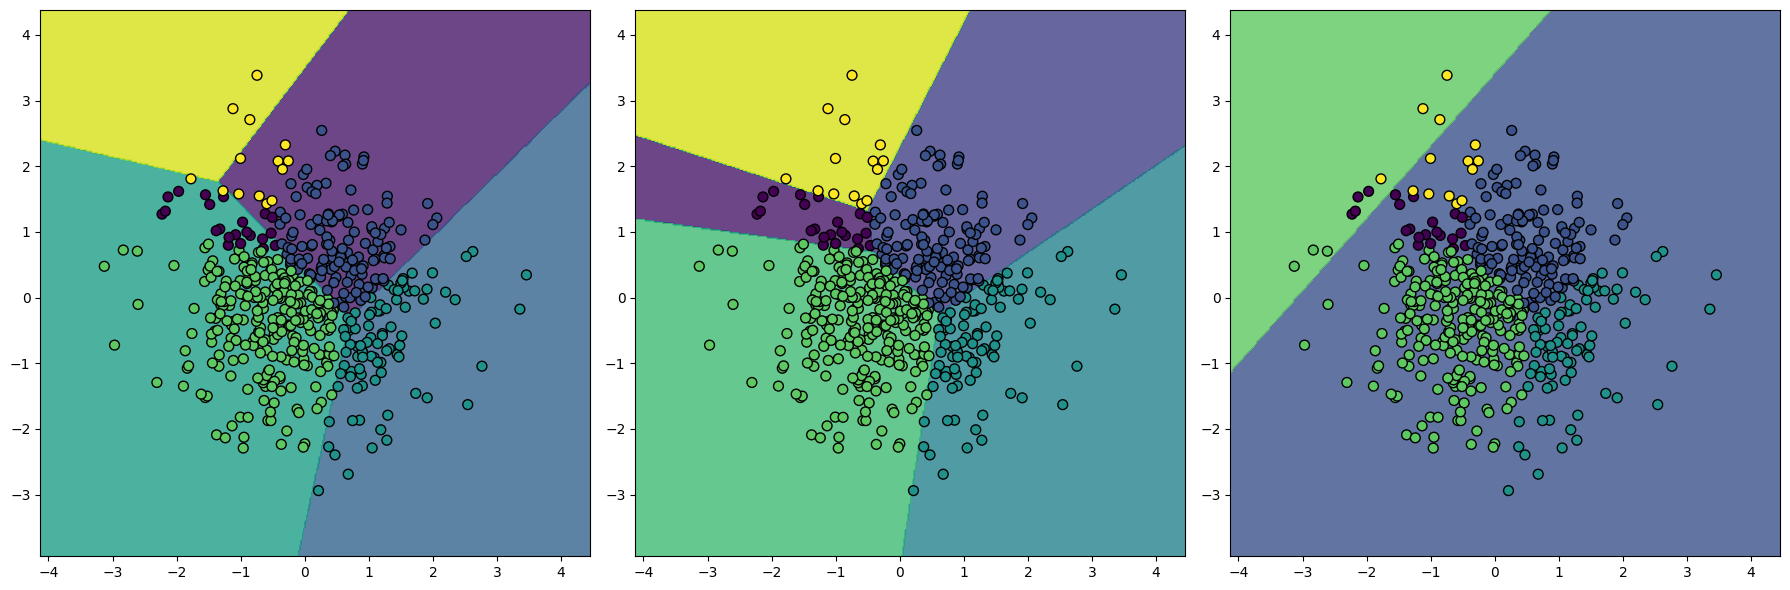

In [ ]:
np.random.seed(42)

ovr_model = LogisticRegression(multi_class='ovr', C=100, random_state=42)
multinomial_model = LogisticRegression(multi_class='multinomial', C=100, random_state=42)
binary_model = LogisticRegression(C=100, random_state=42)

binary_y = (y_train == 1)

ovr_model.fit(X_train, y_train)
multinomial_model.fit(X_train, y_train)
binary_model.fit(X_train, binary_y)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_classifier(X_train, y_train, ovr_model, ax=axs[0])
plot_classifier(X_train, y_train, multinomial_model, ax=axs[1])
plot_classifier(X_train, y_train, binary_model, ax=axs[2])

plt.tight_layout()
plt.show()

# The 'multinomial' model is performing better than the 'ovr' one
# I am not entirely sure that to understand from the binaty one


# Rask 9

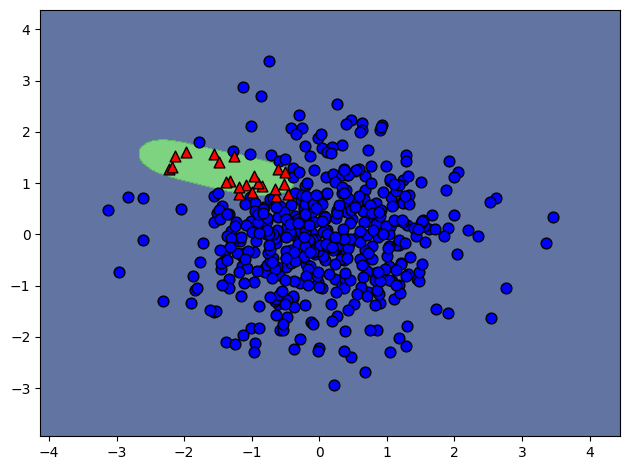

In [ ]:
svm_binary = SVC(C=100, random_state=42)
svm_binary.fit(X_train, binary_y)

plot_classifier(X_train, binary_y, clf=svm_binary)

plt.tight_layout()
plt.show()

# Task 10

Number of original examples: 178
Number of support vectors: 81


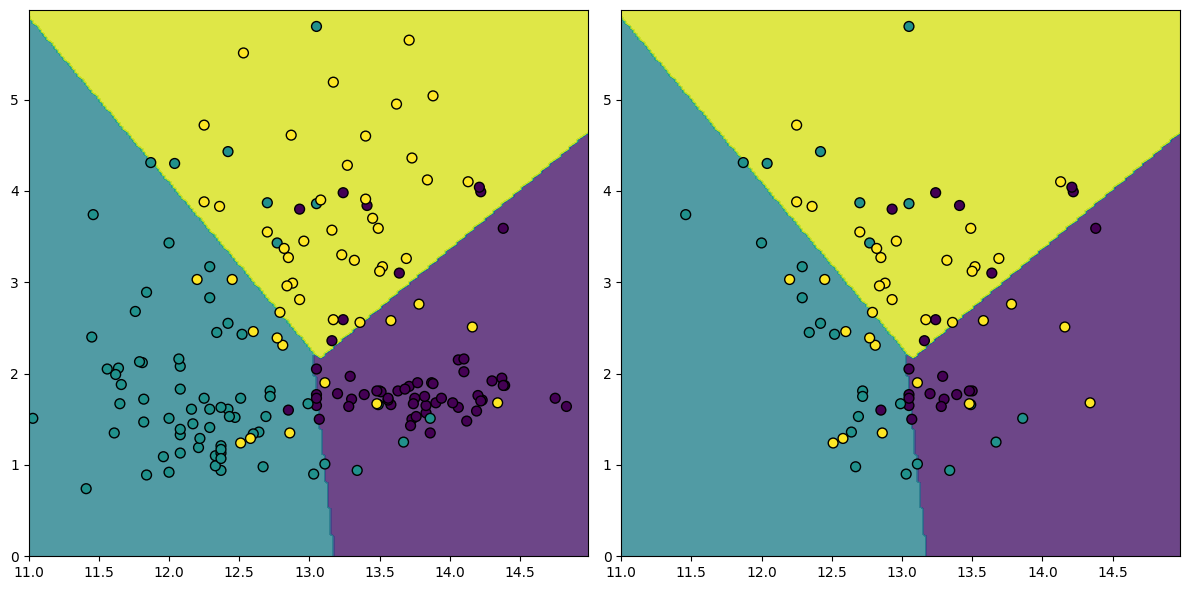

In [ ]:
X = wine_data.data[:, :2]
y = wine_data.target


svc_all = SVC(kernel='linear', random_state=42)
svc_all.fit(X, y)

X_support = X[svc_all.support_]
y_support = y[svc_all.support_]

svc_support = SVC(kernel='linear', random_state=42)
svc_support.fit(X_support, y_support)


plt.figure(figsize=(12, 6))
plot_classifier(X, y, clf=svc_all, ax=plt.subplot(1, 2, 1), lims=(11, 15, 0, 6))
plot_classifier(X_support, y_support, clf=svc_support, ax=plt.subplot(1, 2, 2), lims=(11, 15, 0, 6))


print(f"Number of original examples: {X.shape[0]}")
print(f"Number of support vectors: {X_support.shape[0]}")

plt.tight_layout()
plt.show()



# Task 11

In [ ]:
X = digits_data.data
y = (digits_data.target == 2)


svm = SVC(kernel='rbf', random_state=42)


grid_search = GridSearchCV(estimator=svm,
                           param_grid={'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1]},
                           cv=10)
grid_search.fit(X, y)


best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_


print(f"Best CV parameters: {best_params}")
print(f"Best CV accuracy: {best_accuracy}")
# Първоначано (Преди да прочета задача 12), правех test_train_split 80-20 и получавах винаги 1.0 accuracy, тествах с различни seed-ове и оставяше така.
# Чудя се дали това се е дължало на overfiting или наистина е достигнало такива резултати.

Best CV parameters: {'gamma': 0.001}
Best CV accuracy: 0.9972222222222221


# Task 12

In [ ]:
X = digits_data.data
y = (digits_data.target == 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
param_grid = {
  'C': [0.1, 1, 10],
  'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}
svm = SVC(kernel='rbf', random_state=42)


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_
best_model = grid_search.best_estimator_




test_accuracy = accuracy_score(y_test, best_model.predict(X_test))


print(f"Best CV params: {best_params}")
print(f"Best CV accuracy: {best_cv_accuracy}")
print(f"Test accuracy of best grid search hypers: {test_accuracy}")

# Gamma is smaller

Best CV params: {'C': 10, 'gamma': 0.0001}
Best CV accuracy: 1.0
Test accuracy of best grid search hypers: 0.9977753058954394


# Task 13

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {
  'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
  'loss': ['hinge', 'log_loss']
}


sgd = SGDClassifier(random_state=0) #, max_iter=1000

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_
best_model = grid_search.best_estimator_


test_accuracy = accuracy_score(y_test, best_model.predict(X_test))


print(f"Best CV params: {best_params}")
print(f"Best CV accuracy: {best_cv_accuracy}")
print(f"Test accuracy of best grid search hypers: {test_accuracy}")


Best CV params: {'alpha': 0.1, 'loss': 'hinge'}
Best CV accuracy: 1.0
Test accuracy of best grid search hypers: 0.9925925925925926


# Task 14

In [ ]:
X = breast_cancer_data.data
y = breast_cancer_data.target

# Used this to find the proper indexs
#https://www.kaggle.com/code/dhainjeamita/breast-cancer-dataset-classification
X = X[:, [0, 7]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y,  random_state=1)

tree = DecisionTreeClassifier(max_depth=6, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred)

print(f"First 5 predictions: {y_pred[:5]}")
print(f"Test set accuracy: {round(test_accuracy, 2)}")

First 5 predictions: [1 0 1 1 0]
Test set accuracy: 0.89


# Task 15

## Plot fucntion

In [ ]:
def plot_labeled_decision_regions(X,y, models):
    '''
    Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

## Code

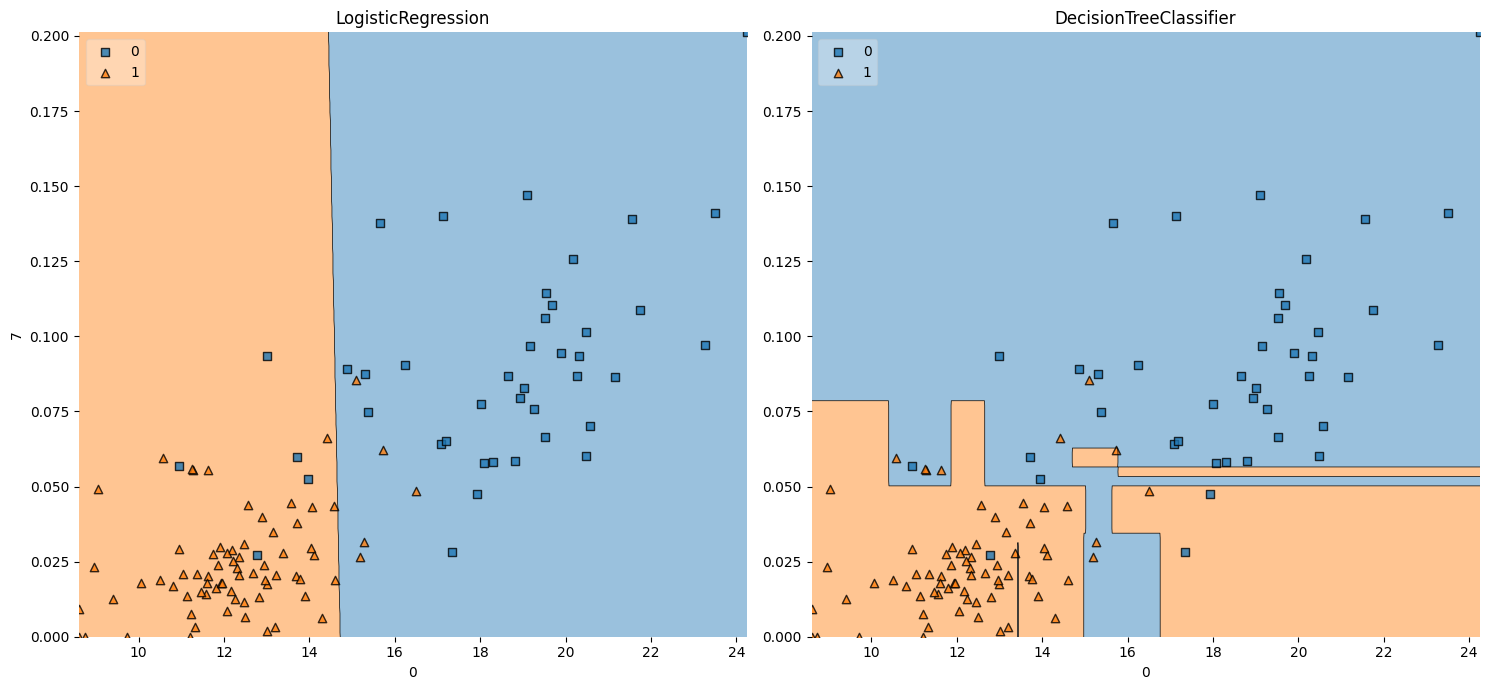

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)


X_test_df = pd.DataFrame(X_test, columns=[0,7])
y_test_series = pd.Series(y_test)


plot_labeled_decision_regions(X_test_df, y_test_series, [lr, tree])

# Лоистичната регресия дава една линия (граница) която не би помогнала в този не линеен модел
# Дървото се опитва да напасне границите по добре, че да повдигне успеваемоста


# Task 16

In [ ]:
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)



tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)



tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)


print(f"Accuracy achieved by using entropy: {round(accuracy_entropy, 3)}")
print(f"Accuracy achieved by using the gini index: {round(accuracy_gini, 3)}")


Accuracy achieved by using entropy: 0.947
Accuracy achieved by using the gini index: 0.956


# Task 17

In [ ]:
X = auto_data[['displ', 'hp', 'weight', 'accel', 'size']]
y = auto_data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=8, random_state=3, min_samples_leaf=0.13)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)




linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)




print(f"Regression Tree test set RMSE: {round(rmse_tree, 2)}")
print(f"Linear Regression test set RMSE: {round(rmse_linear, 2)}")

Regression Tree test set RMSE: 4.27
Linear Regression test set RMSE: 3.93


# Task 18

In [ ]:
auto_data_one_hot = pd.get_dummies(auto_data, columns=['origin'], drop_first=True)

X = auto_data_one_hot.drop(columns=['mpg'])
y = auto_data_one_hot['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)



cv_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
cv_rmse = -cv_scores.mean()


print("Dataset X:\n")
print(X.head(), "\n")
print(X.tail(), "\n")
print(X.shape, "\n")
print(f"10-fold CV RMSE: {round(cv_rmse, 2)}")
print(f"Train RMSE: {round(train_rmse, 2)}")



# High bias, the scoring with CV and without is similar and low



Dataset X:

   displ   hp  weight  accel  size  origin_Europe  origin_US
0  250.0   88    3139   14.5  15.0          False       True
1  304.0  193    4732   18.5  20.0          False       True
2   91.0   60    1800   16.4  10.0          False      False
3  250.0   98    3525   19.0  15.0          False       True
4   97.0   78    2188   15.8  10.0           True      False 

     displ   hp  weight  accel  size  origin_Europe  origin_US
387  250.0   88    3021   16.5  15.0          False       True
388  151.0   90    2950   17.3  10.0          False       True
389   98.0   68    2135   16.6  10.0          False      False
390  250.0  110    3520   16.4  15.0          False       True
391  140.0   88    2720   15.4  10.0          False       True 

(392, 7) 

10-fold CV RMSE: 5.06
Train RMSE: 5.15


# Task 19

In [ ]:
liver_data_cp = liver_data.copy()



liver_data_cp["gender"] = (liver_data_cp["gender"] == "Male")
liver_data_cp["has_liver_disease"] = (liver_data_cp["has_liver_disease"] == 1)


liver_data_cp = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(liver_data_cp), columns=columns)


X = liver_data_cp.drop(columns=["has_liver_disease"])
y = liver_data_cp["has_liver_disease"]

X_scaled = StandardScaler().fit_transform(X)

print("\nData:")
print(liver_data_cp, "\n")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=1)


models = {
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000),
    "K Nearest Neighbours": KNeighborsClassifier(n_neighbors=27),
    "Classification Tree": DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results[name] = f1
    print(f"{name}: {round(f1, 3)}")


voting = VotingClassifier(estimators=list(models.items()))
voting.fit(X_train, y_train)
y_voting_pred = voting.predict(X_test)
voting_f1 = f1_score(y_test, y_voting_pred)

print(f"\nVoting Classifier: {round(voting_f1, 3)}")






Data:
      age  gender    tb   db  alkphos  sgpt   sgot   tp  alb  a/g_ratio  \
0    65.0     0.0   0.7  0.1    187.0  16.0   18.0  6.8  3.3       0.90   
1    62.0     1.0  10.9  5.5    699.0  64.0  100.0  7.5  3.2       0.74   
2    62.0     1.0   7.3  4.1    490.0  60.0   68.0  7.0  3.3       0.89   
3    58.0     1.0   1.0  0.4    182.0  14.0   20.0  6.8  3.4       1.00   
4    72.0     1.0   3.9  2.0    195.0  27.0   59.0  7.3  2.4       0.40   
..    ...     ...   ...  ...      ...   ...    ...  ...  ...        ...   
578  60.0     1.0   0.5  0.1    500.0  20.0   34.0  5.9  1.6       0.37   
579  40.0     1.0   0.6  0.1     98.0  35.0   31.0  6.0  3.2       1.10   
580  52.0     1.0   0.8  0.2    245.0  48.0   49.0  6.4  3.2       1.00   
581  31.0     1.0   1.3  0.5    184.0  29.0   32.0  6.8  3.4       1.00   
582  38.0     1.0   1.0  0.3    216.0  21.0   24.0  7.3  4.4       1.50   

     has_liver_disease  
0                  1.0  
1                  1.0  
2                

# Task 20

In [ ]:
liver_data_cp = liver_data.copy()


liver_data_cp = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(liver_data_cp), columns=columns)

# liver_data_cp["gender"] = (liver_data_cp["gender"] == "Male").astype(int)
# liver_data_cp["has_liver_disease"] = (liver_data_cp["has_liver_disease"] == 1).astype(int)


# X = liver_data_cp.drop(columns=["has_liver_disease"])
# y = liver_data_cp["has_liver_disease"]

X, y = preprocess(indian_liver_patient_file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree)


bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=1),
    n_estimators=50,
    random_state=1
)

bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging)


print(f"Test set F1-score of single decision tree: {round(f1_tree, 2)}")
print(f"Test set F1-score of aggregator: {round(f1_bagging, 2)}")



Test set F1-score of single decision tree: 0.72
Test set F1-score of aggregator: 0.78


## Procecing function

In [27]:
def preprocess(data_path: str, fill_strategy: str = "median") -> Tuple[pd.DataFrame, pd.Series]:
  """
  Preprocess the Indian liver patient dataset.

  Args:
      data_path (str): Path to the dataset file.
      fill_strategy (str): Method to fill missing values. Can be 'median' or 'mode'.

  Returns:
    Tuple[pd.DataFrame, pd.Series]
  """
  column_names = [
    "age", "gender", "tb", "db", "alkphos", "sgpt", "sgot", "tp", "alb", "a/g_ratio", "has_liver_disease"
  ]
  data = pd.read_csv(data_path, header=None, names=column_names)

  data["gender"] = (data["gender"] == "Male").astype(int)
  data["has_liver_disease"] = (data["has_liver_disease"] == 1).astype(int)

  for column in data.columns:
    if fill_strategy == "median":
      data[column] = data[column].fillna(data[column].median())
    elif fill_strategy == "mode":
      data[column] = data[column].fillna(data[column].mode()[0])



  X = data.drop(columns=["has_liver_disease"])
  y = data["has_liver_disease"]

  return X, y

preprocess(indian_liver_patient_file_path)

(     age  gender    tb   db  alkphos  sgpt  sgot   tp  alb  a/g_ratio
 0     65       0   0.7  0.1      187    16    18  6.8  3.3       0.90
 1     62       1  10.9  5.5      699    64   100  7.5  3.2       0.74
 2     62       1   7.3  4.1      490    60    68  7.0  3.3       0.89
 3     58       1   1.0  0.4      182    14    20  6.8  3.4       1.00
 4     72       1   3.9  2.0      195    27    59  7.3  2.4       0.40
 ..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...
 578   60       1   0.5  0.1      500    20    34  5.9  1.6       0.37
 579   40       1   0.6  0.1       98    35    31  6.0  3.2       1.10
 580   52       1   0.8  0.2      245    48    49  6.4  3.2       1.00
 581   31       1   1.3  0.5      184    29    32  6.8  3.4       1.00
 582   38       1   1.0  0.3      216    21    24  7.3  4.4       1.50
 
 [583 rows x 10 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 578    0
 579    1
 580    1
 581    1
 582    0
 Name: has

# Task 21

In [ ]:
#X, y = preprocess(indian_liver_patient_file_path)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


bagging = BaggingClassifier(
  estimator=DecisionTreeClassifier(min_samples_leaf=8, random_state=1),
  n_estimators=50,
  oob_score=True,
  random_state=1
)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print(f"Mean accuracy of aggregator on OOB instances: {round(bagging.oob_score_, 2)}")
print(f"Test set accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Mean accuracy of aggregator on OOB instances: 0.7
Test set accuracy: 0.71


# Task 22

Test set RMSE (Random Forest): 3.71
Test set RMSE (Sum Model): 0.0


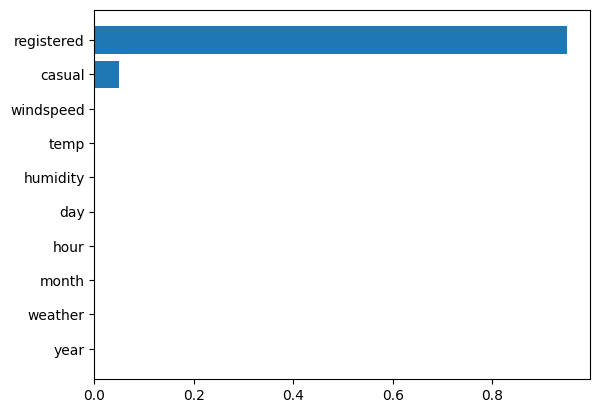

In [23]:
bike_data_cp = bike_data.copy()


df = pd.DataFrame(bike_data_cp)

# Make "datetime" more easy to read
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# I desided to drop these colum as they are linear dependency to others

columns_to_drop = ["datetime", "atemp", "season", "workingday", "holiday"]
df = df.drop(columns=columns_to_drop)


X = df.drop(columns=["count"])
y = df["count"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


rf = RandomForestRegressor(n_estimators=25, random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


rmse_rf = root_mean_squared_error(y_test, y_pred)
print(f"Test set RMSE (Random Forest): {round(rmse_rf, 2)}")


# I realised that the model is can be made with just "casual" and "registred" rentals and just the sum of them
# in fact the more colums I remove (beside these two), the better rmse I get
y_pred_sum = X_test["casual"] + X_test["registered"]
rmse_sum = root_mean_squared_error(y_test, y_pred_sum)
print(f"Test set RMSE (Sum Model): {round(rmse_sum, 2)}")


importances = rf.feature_importances_
indices = np.argsort(importances)


plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.show()


# Task 23

In [32]:
X, y = preprocess(indian_liver_patient_file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


adaboost = AdaBoostClassifier(
  estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
  n_estimators=180,
  random_state=1)
adaboost.fit(X_train, y_train)

y_pred_proba = adaboost.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test set ROC AUC: {round(roc_auc, 2)}")


Test set ROC AUC: 0.73


# Task 24

In [43]:
bike_data_cp = bike_data.copy()


bike_data_cp['datetime'] = pd.to_datetime(bike_data_cp['datetime'])
bike_data_cp['year'] = bike_data_cp['datetime'].dt.year
bike_data_cp['month'] = bike_data_cp['datetime'].dt.month
bike_data_cp['day'] = bike_data_cp['datetime'].dt.day
bike_data_cp['hour'] = bike_data_cp['datetime'].dt.hour

columns_to_drop = ["datetime", "atemp", "season"]
bike_data_cp = bike_data_cp.drop(columns=columns_to_drop)


X = bike_data_cp.drop(columns=["count"])
y = bike_data_cp["count"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


gbr = GradientBoostingRegressor(n_estimators=200, max_depth=4, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test set RMSE (Gradient Boosting): {round(rmse, 2)}")
#I tested without dropping  "atemp" and "season" and got 3.76


Test set RMSE (Gradient Boosting): 3.69


# Task 25

In [44]:
sgbr = GradientBoostingRegressor(
  n_estimators=200,
  max_depth=4,
  subsample=0.9,
  max_features=0.75,
  random_state=2

)

sgbr.fit(X_train, y_train)
y_pred = sgbr.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test set RMS: {round(rmse, 2)}")
# without dropping  "atemp" and "season" it is 4.76

Test set RMS: 4.13


# Task 26

In [47]:
X, y = preprocess(indian_liver_patient_file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


param_grid = {
  "max_depth": [2, 3, 4],
  "min_samples_leaf": [0.12, 0.14, 0.16, 0.18]
}
dt = DecisionTreeClassifier(random_state=1)


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring="roc_auc", cv=5)
grid_search.fit(X_train, y_train)


y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test set ROC AUC: {round(roc_auc, 3)}")


Test set ROC AUC: 0.697


# Task 27

In [60]:
bike_data_cp = bike_data.copy()


bike_data_cp['datetime'] = pd.to_datetime(bike_data_cp['datetime'])
bike_data_cp['year'] = bike_data_cp['datetime'].dt.year
bike_data_cp['month'] = bike_data_cp['datetime'].dt.month
bike_data_cp['day'] = bike_data_cp['datetime'].dt.day
bike_data_cp['hour'] = bike_data_cp['datetime'].dt.hour

columns_to_drop = ["datetime", "atemp", "season"]
bike_data_cp = bike_data_cp.drop(columns=columns_to_drop)


X = bike_data_cp.drop(columns=["count"])
y = bike_data_cp["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

param_grid = {
  "n_estimators": [100, 350, 500],
  "max_features": ["log2", "sqrt", "auto"], # Fails with "auto"
  "min_samples_leaf": [2, 10, 30]
}
rf = RandomForestRegressor(random_state=2)



grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=3)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test set RMSE: {round(rmse, 3)}")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Test set RMSE: 12.16
